# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

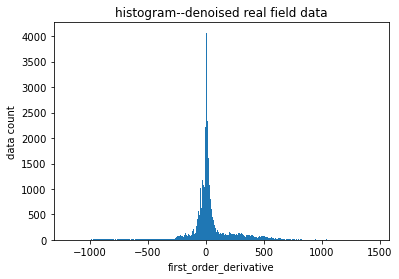

In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [2]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [3]:
# method="deltaTangent_MFFOD_FFOD"
method="deltaTangent_FFOD"

In [4]:


time_halfWindow=None
point_halfWindow=10
polynomial_order=1
tangent_type="single_point"
# tangent_type="average"
deltaTangent_criterion=40
# deltaTangent_criterion=20
# points=[index for index in range(len(pressure_measure))]
%run detect_useDeltaTangent.ipynb

start to predict using tangent, the length of input points: 17888
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 1667 buildups and 765 drawdowns 
===============output==================
'buildup_DT: 1667,drawdown_DT: 765'


<Figure size 1440x720 with 0 Axes>

In [5]:
points=[buildup_DT,drawdown_DT]
# points=[buildup_DRI,drawdown_DRI]
time_step=0.5
%run detect_FirstFOD.ipynb
%run detect_MaxFOD.ipynb

methods\derivative_method.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 1667,len(buildUp_first_FOD): 273'
'len(drawDown_df): 765,len(drawDown_first_FOD): 70'
===============output==================
First_FOD


methods\derivative_method.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 1667,len(buildUp_max_FOD): 273'
'len(drawDown_df): 765,len(drawDown_max_FOD): 70'
===============output==================
Max_FOD


# spilit periods and find multi-rate break points

In [6]:
minor_threshold_shutIn=0.020
# minor_threshold_shutIn=0.028
minor_threshold_shutIn=0.010
minor_threshold_Flowing=0.03
%run store_transients.ipynb

====detected_shutIns 32
====filtered_shutIns 32
====len(flowingPeriods) 33
====finally detect buildUp:118,drawDown:32


# plot flowing & shut-in periods

'buildup:32, drawdown:32'
---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


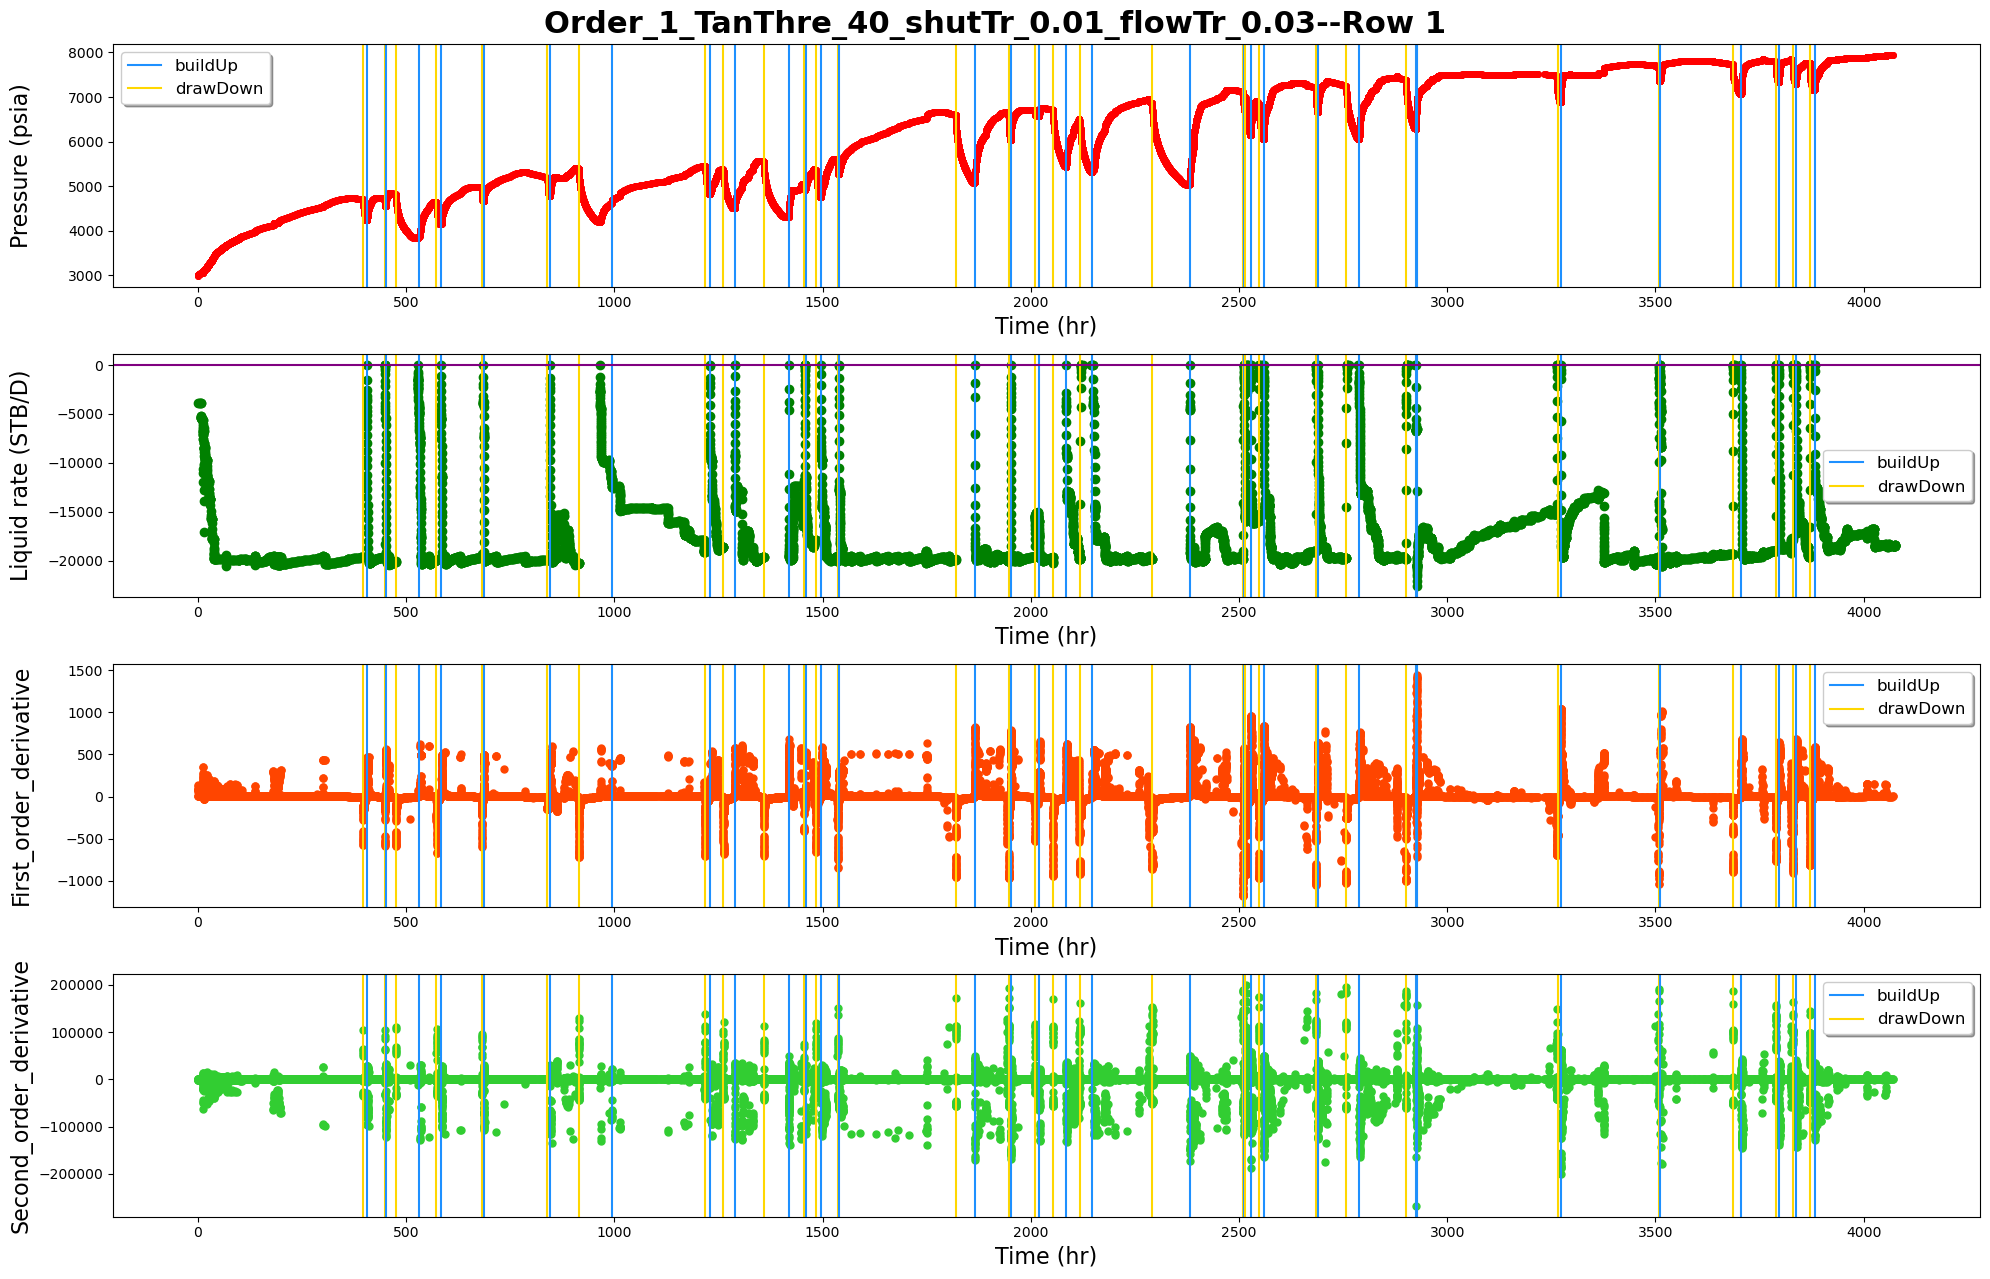

detected 64 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


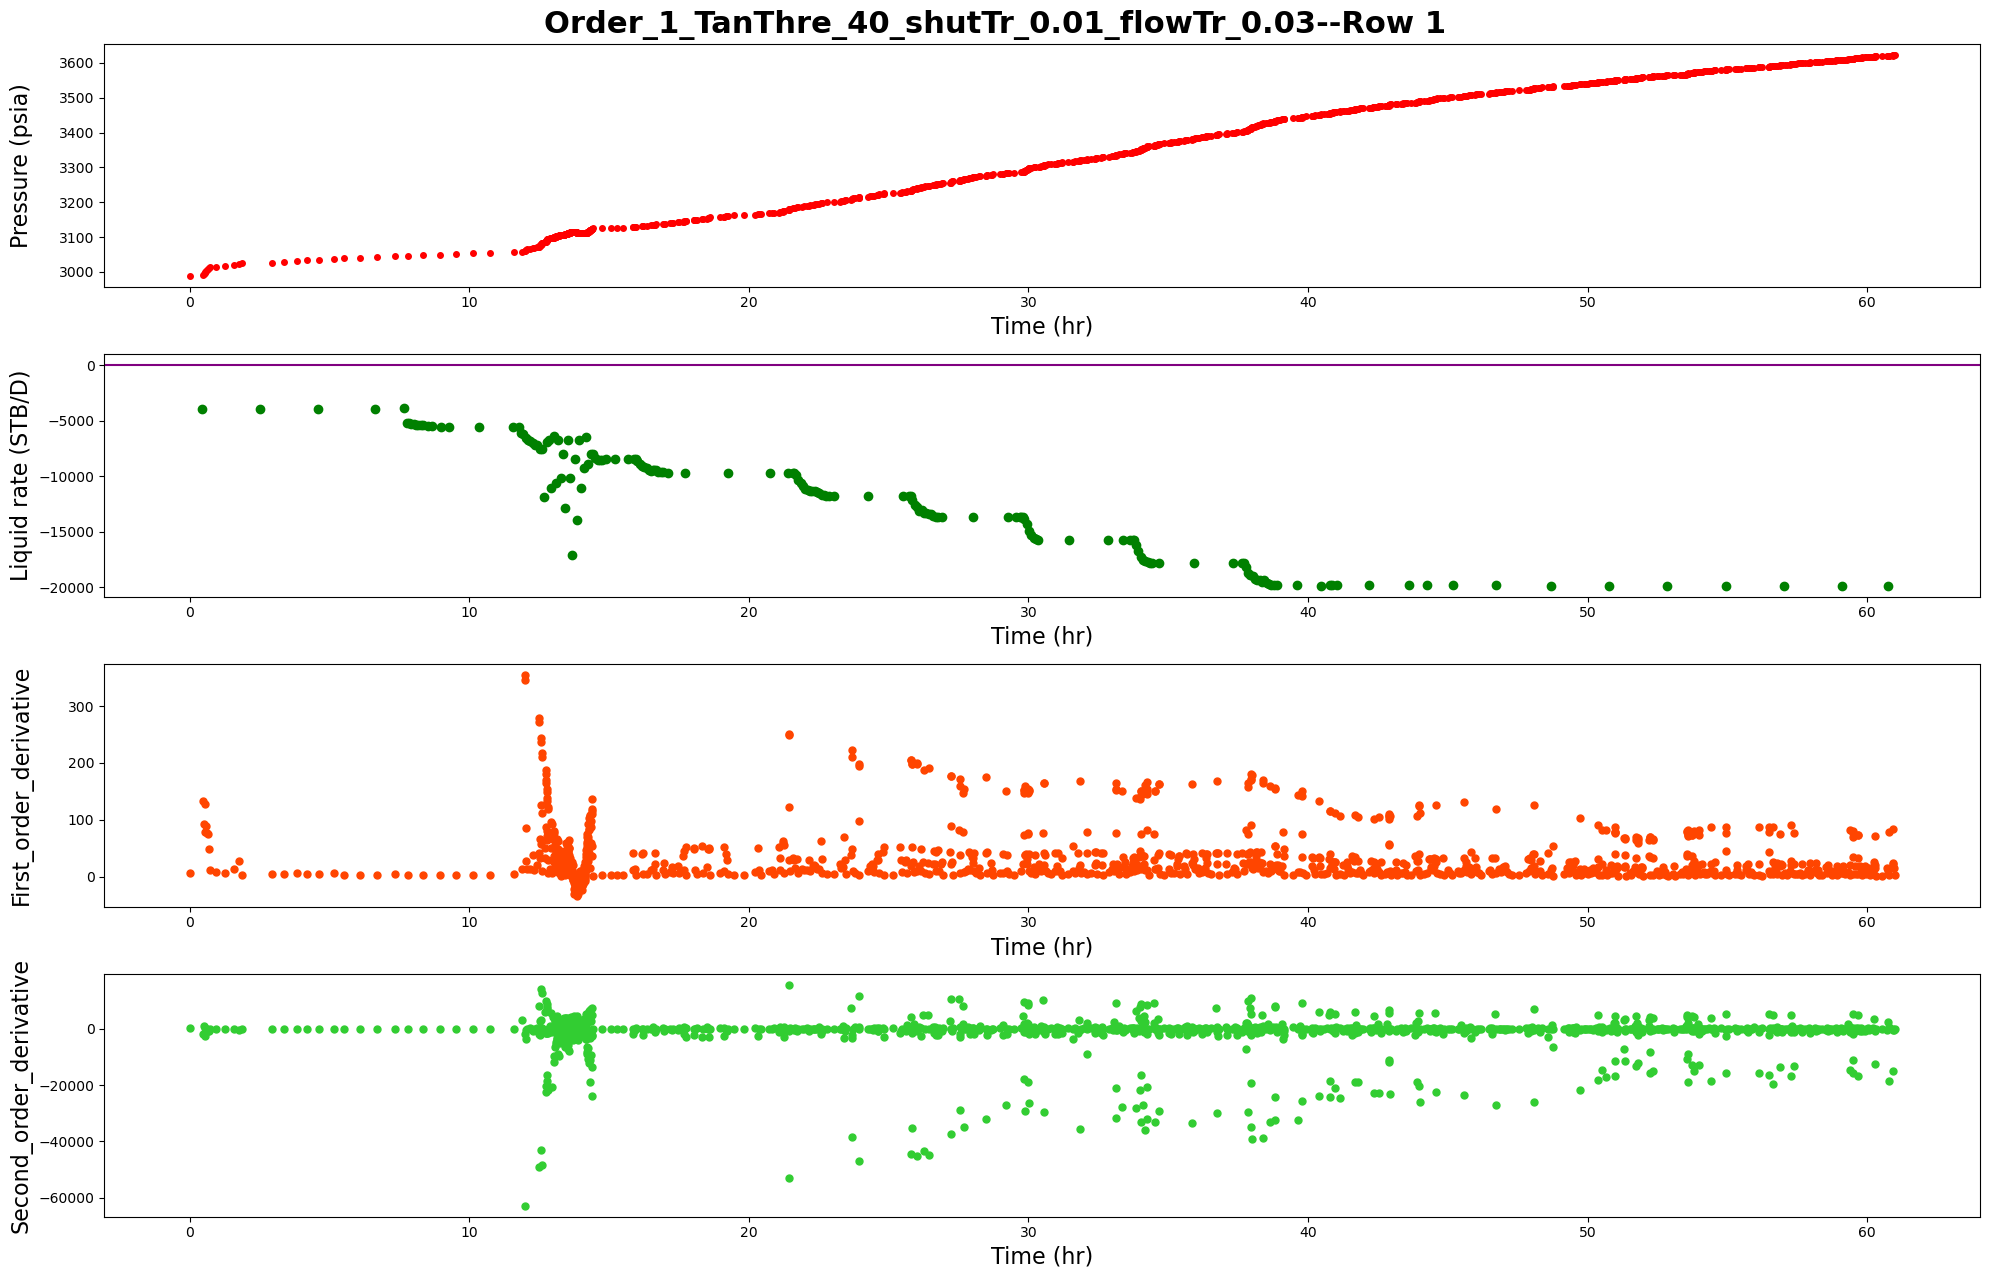

------row 2-----detected points:[2248]


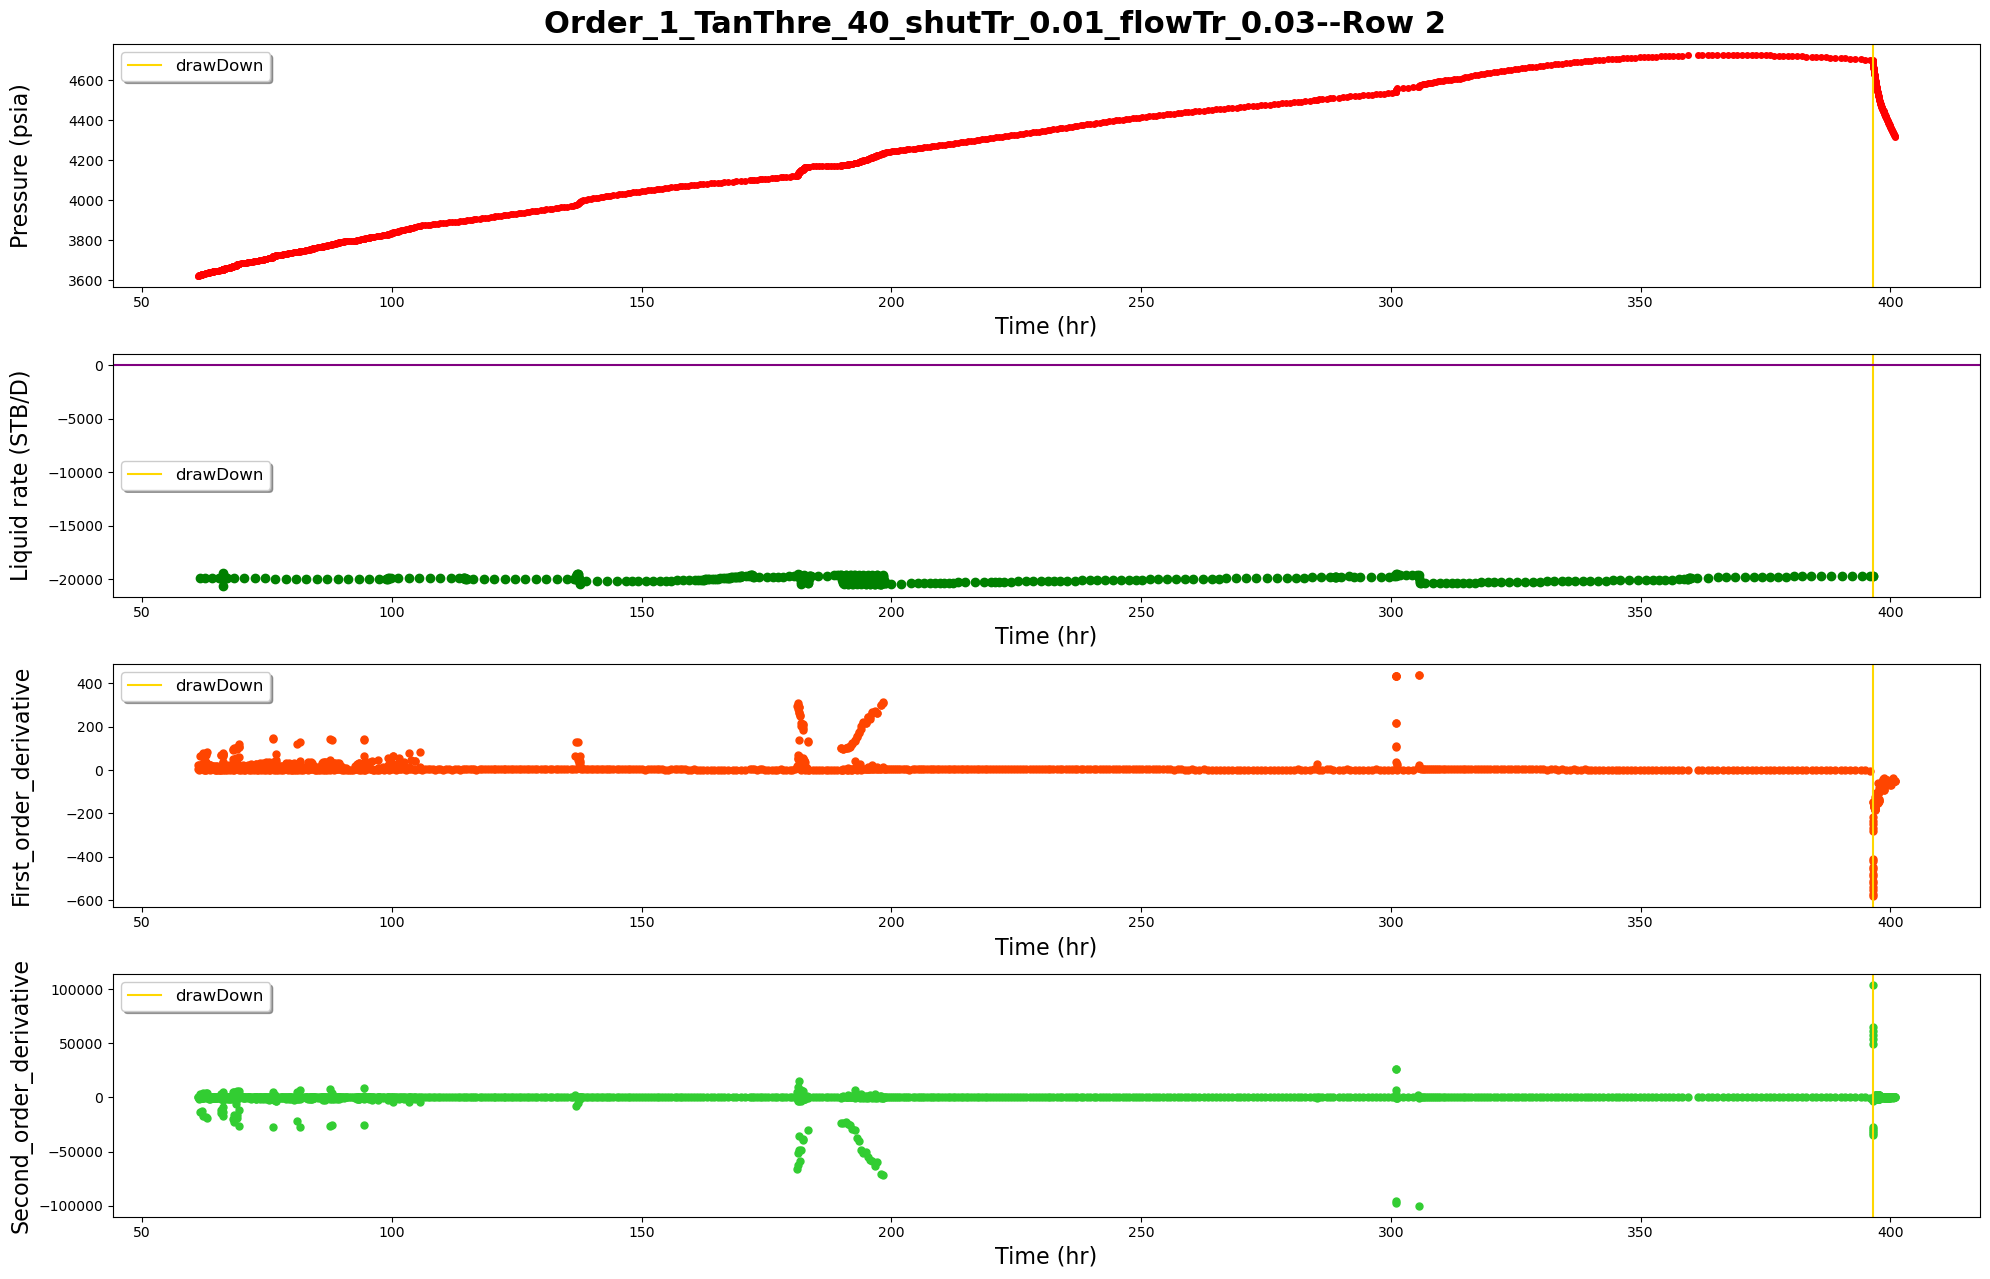

------row 3-----detected points:[2490, 2804, 2892, 3095, 3598]


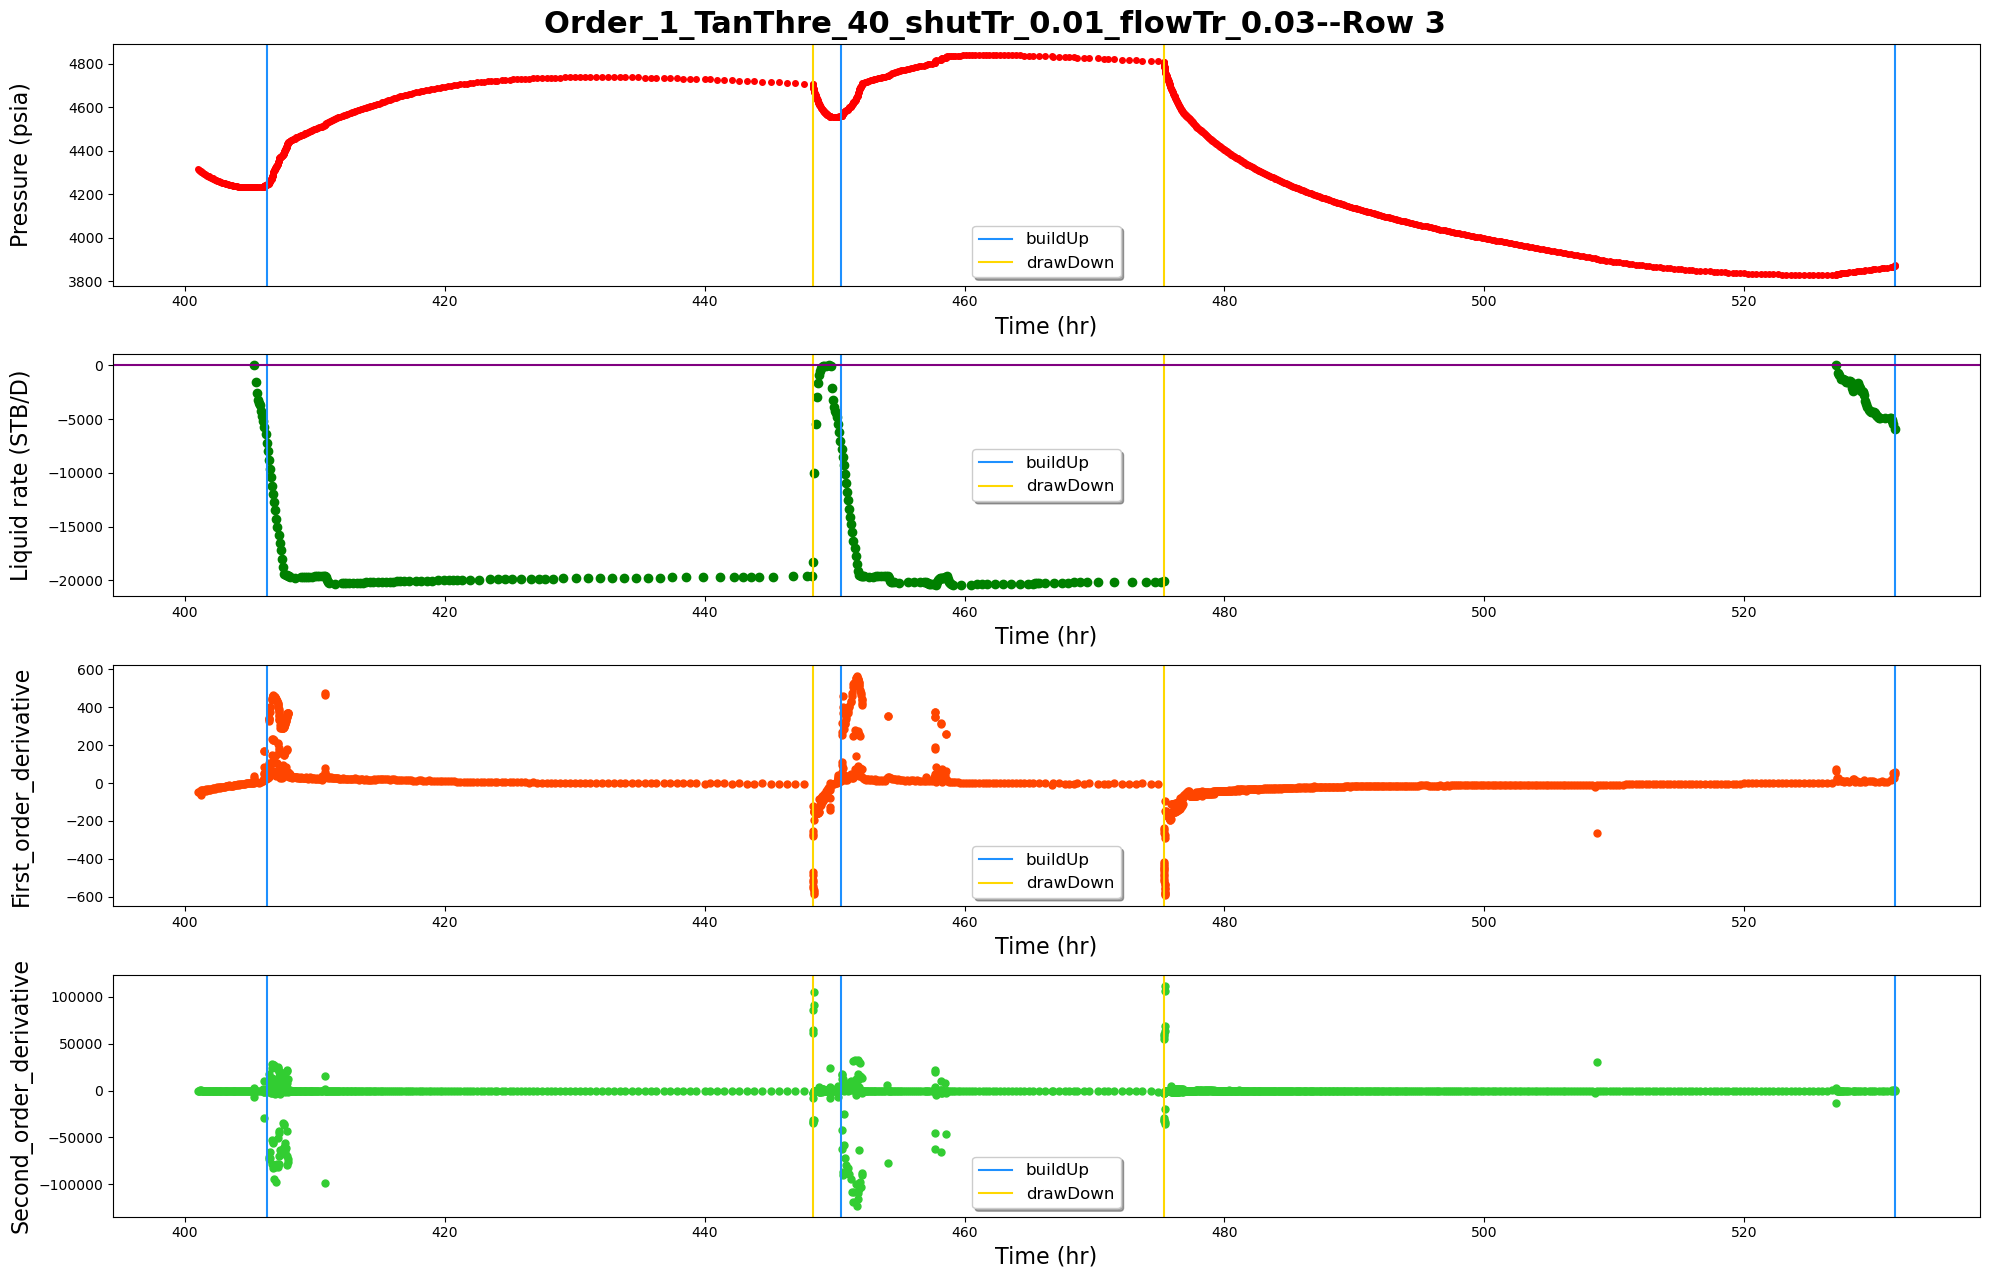

------row 4-----detected points:[3988, 4246, 4750]


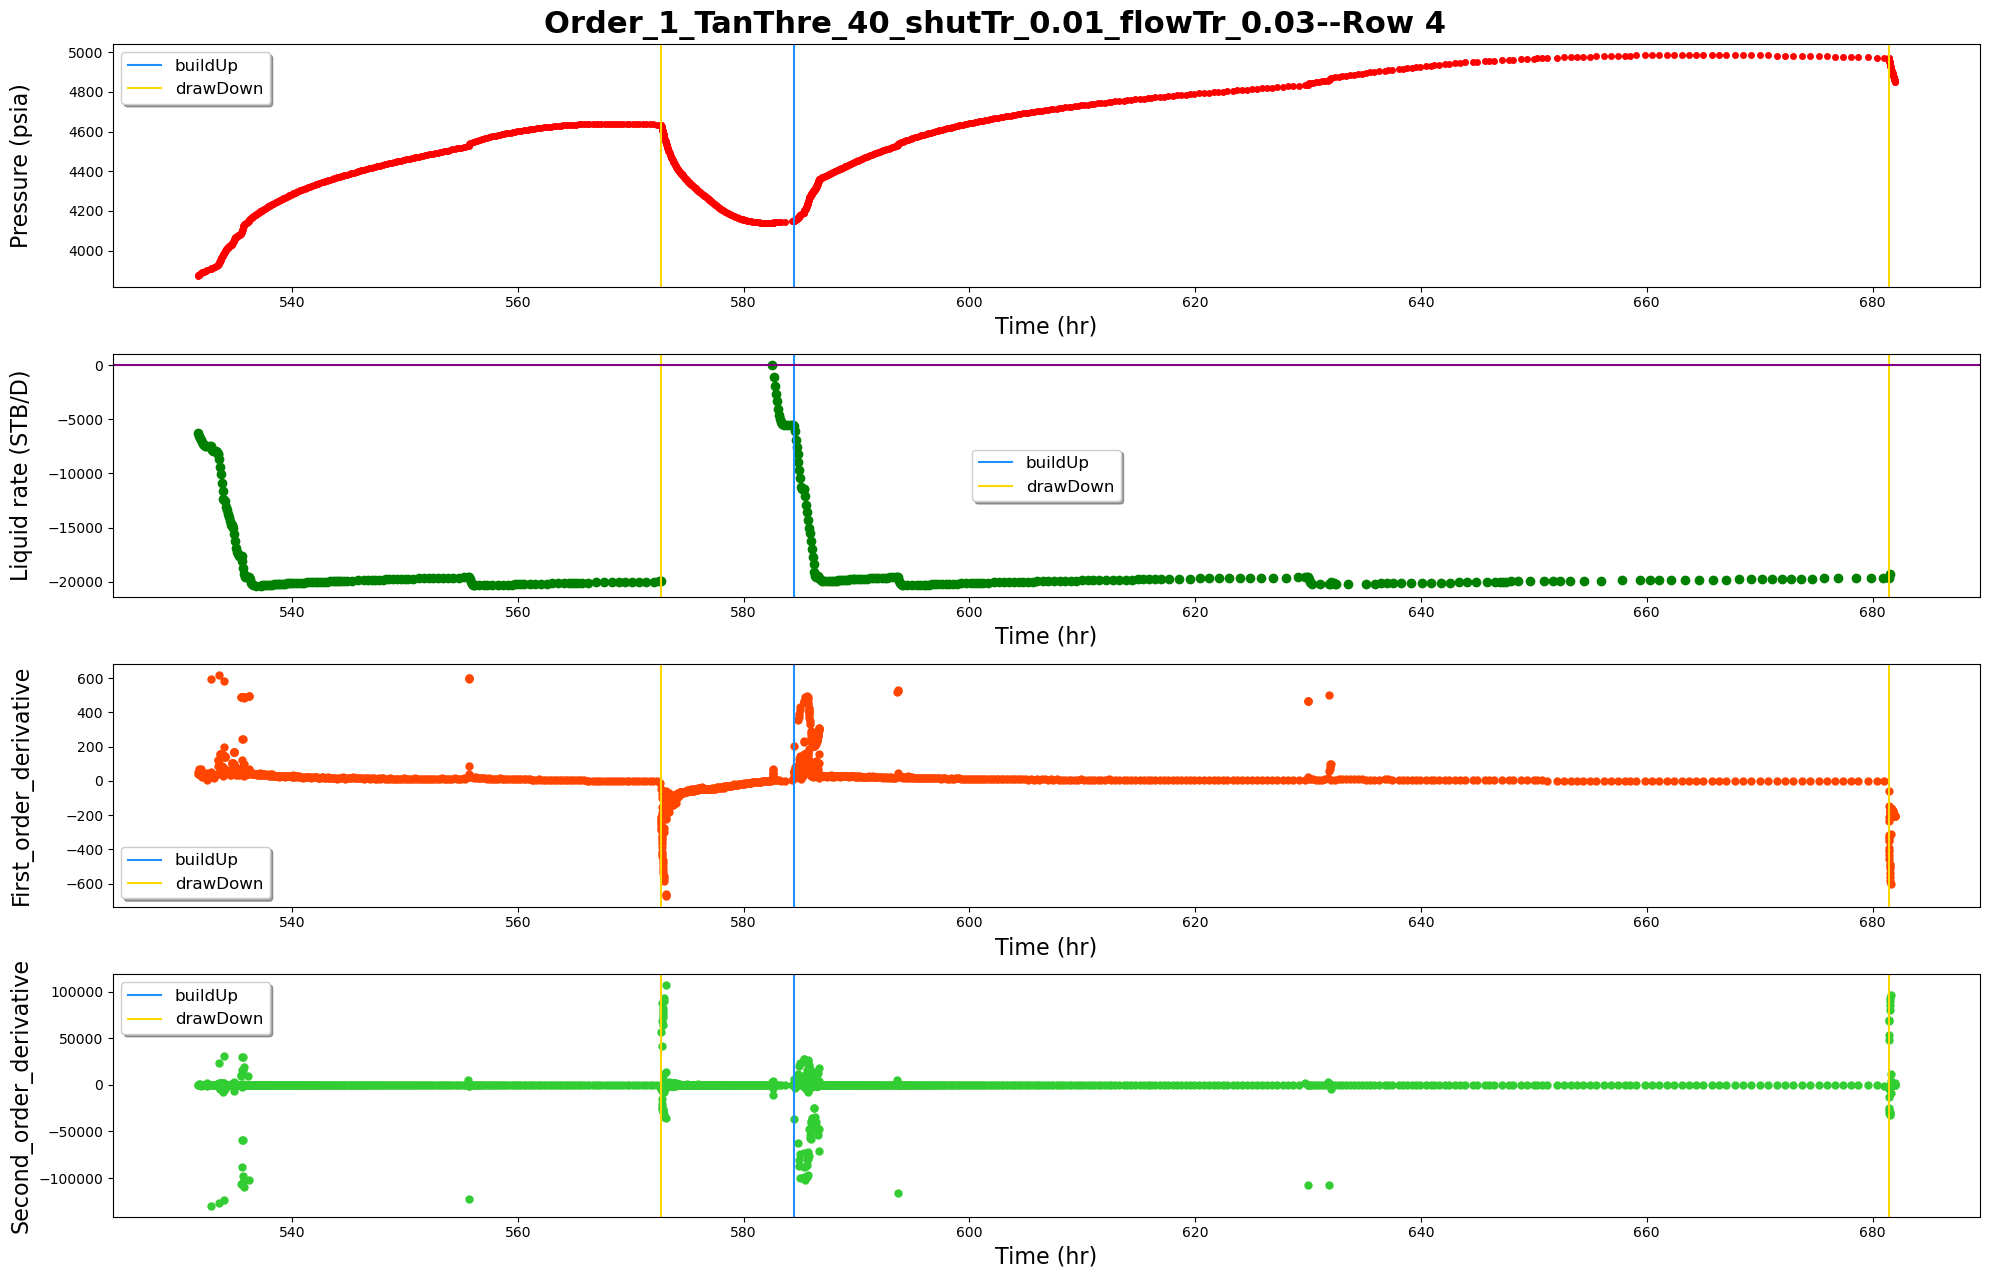

------row 5-----detected points:[4911, 5304, 5445, 5985]


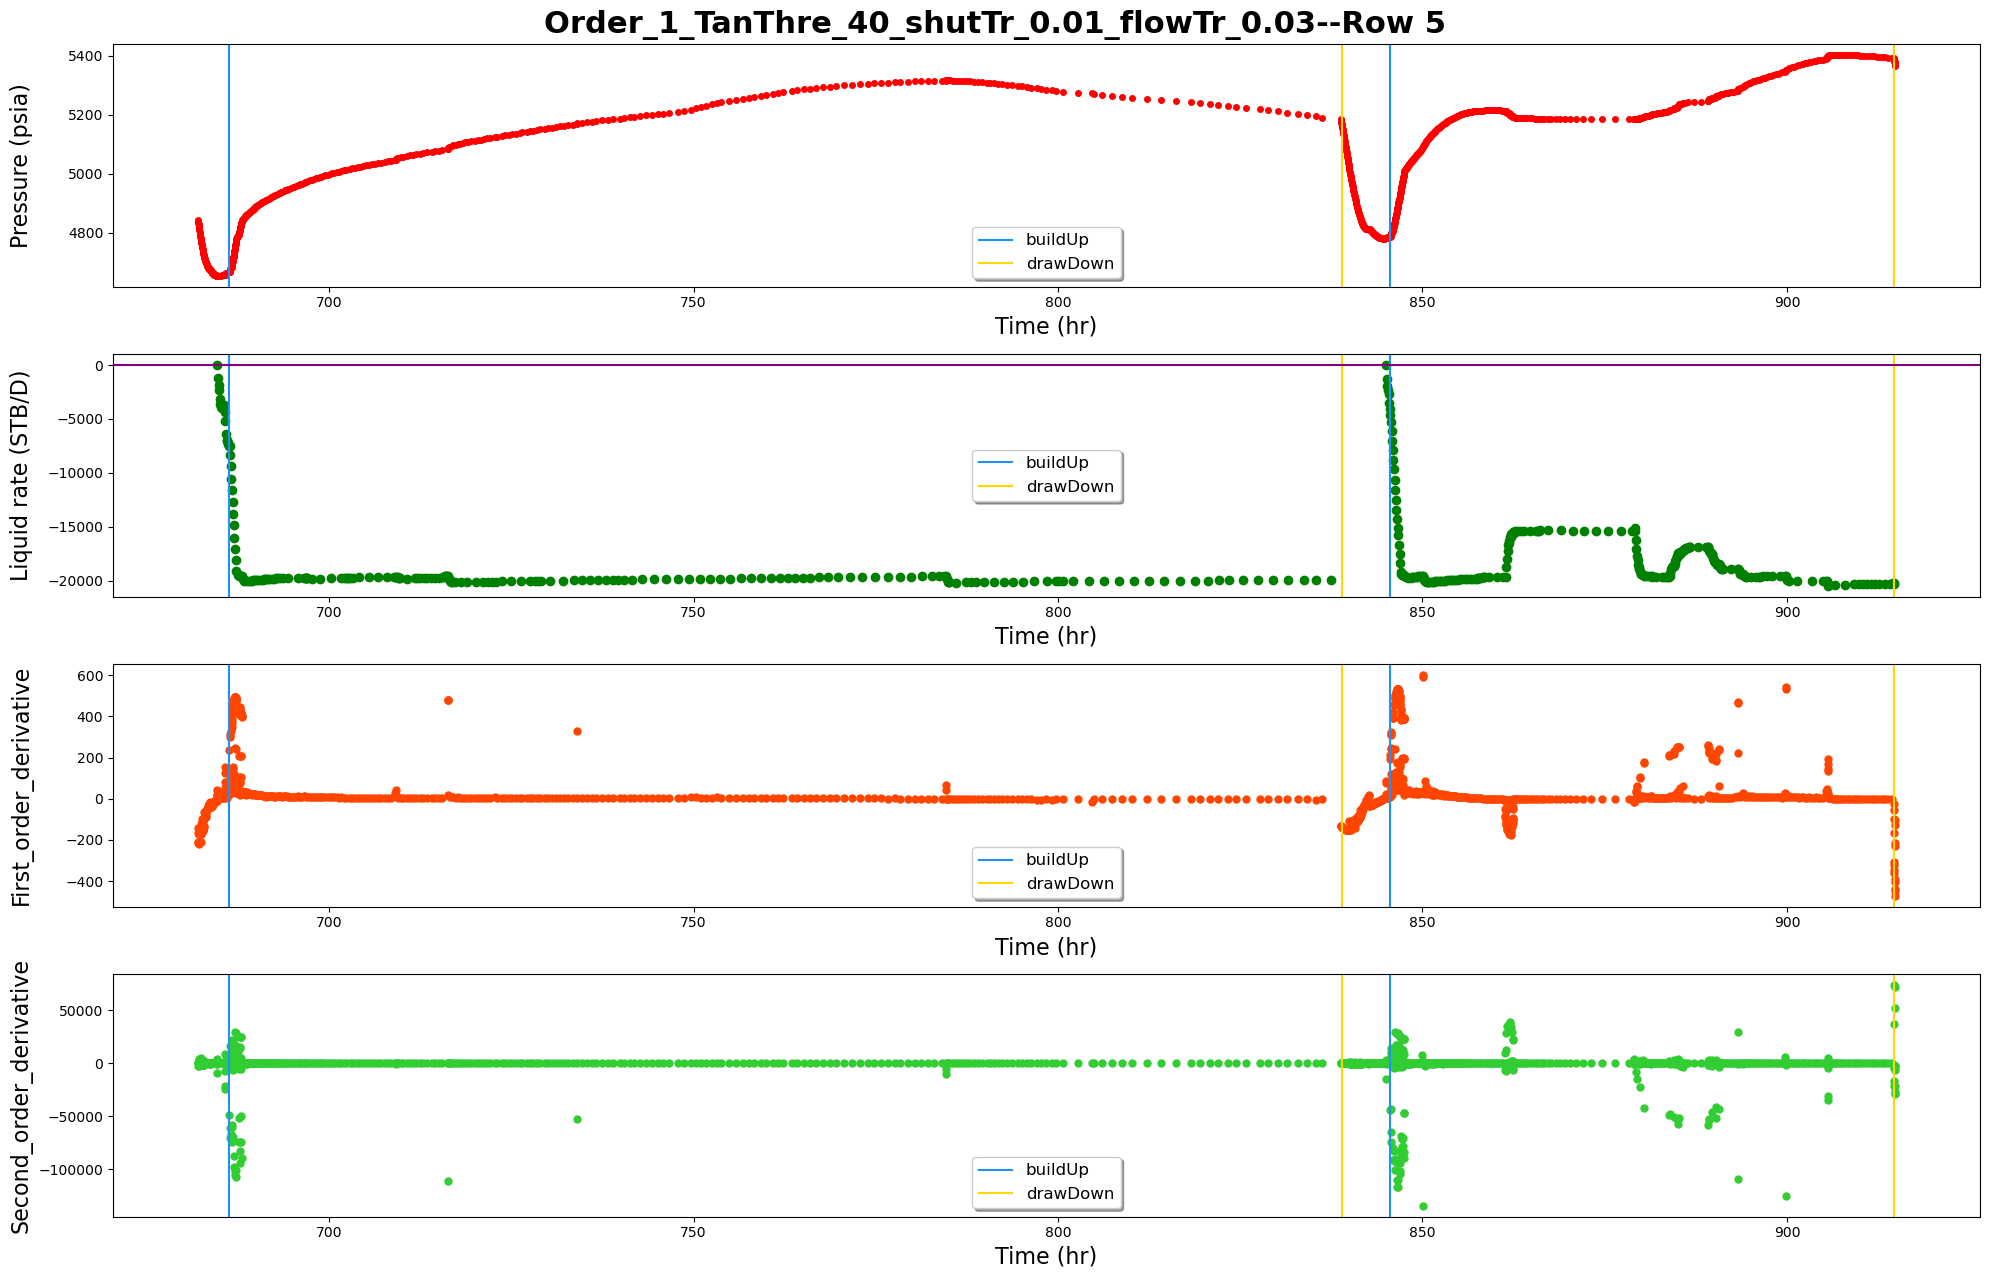

------row 6-----detected points:[6771]


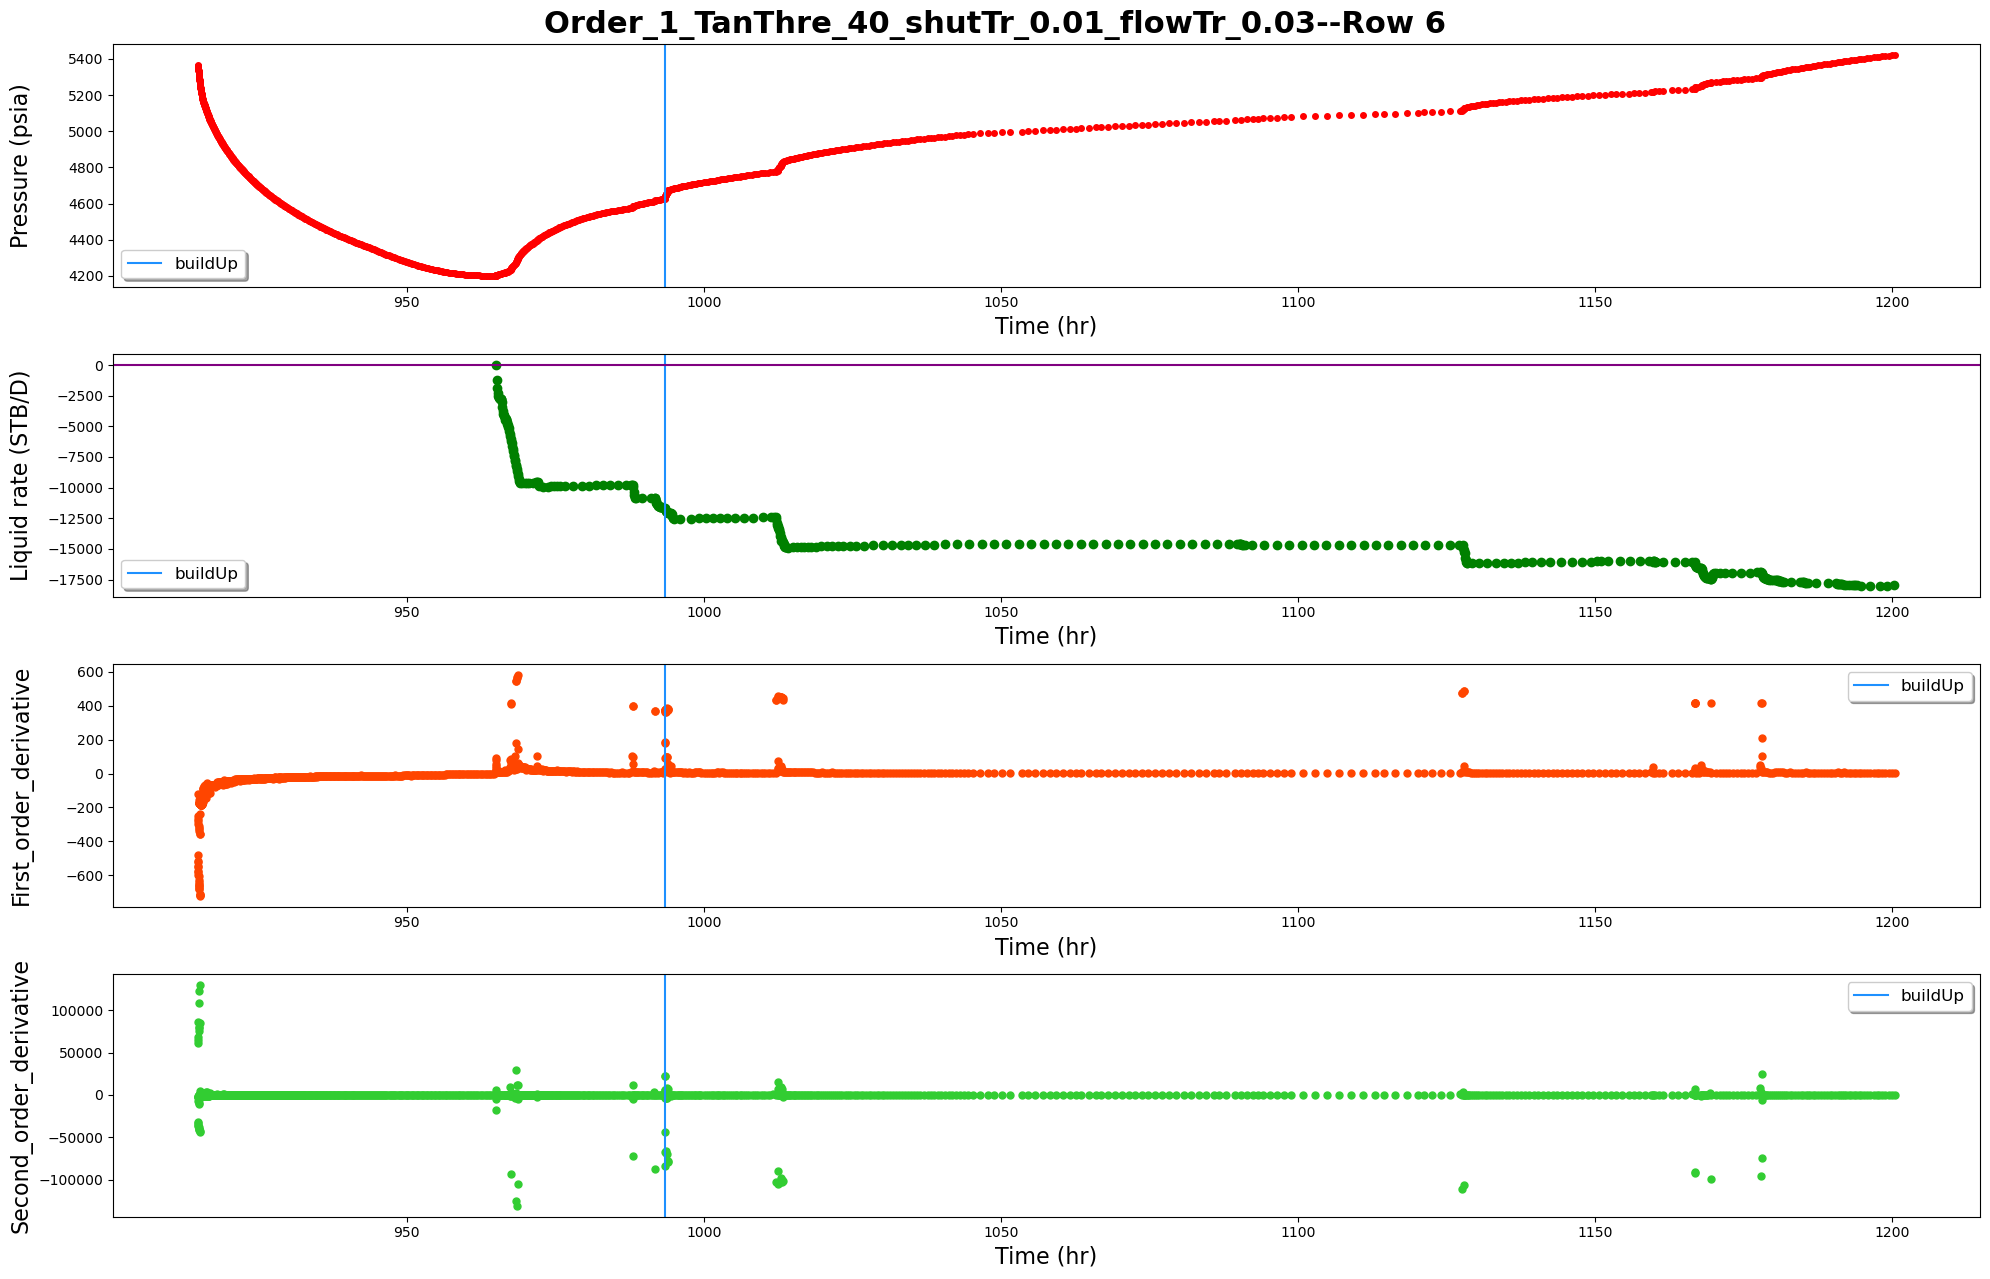

------row 7-----detected points:[7284, 7552, 7945, 8371]


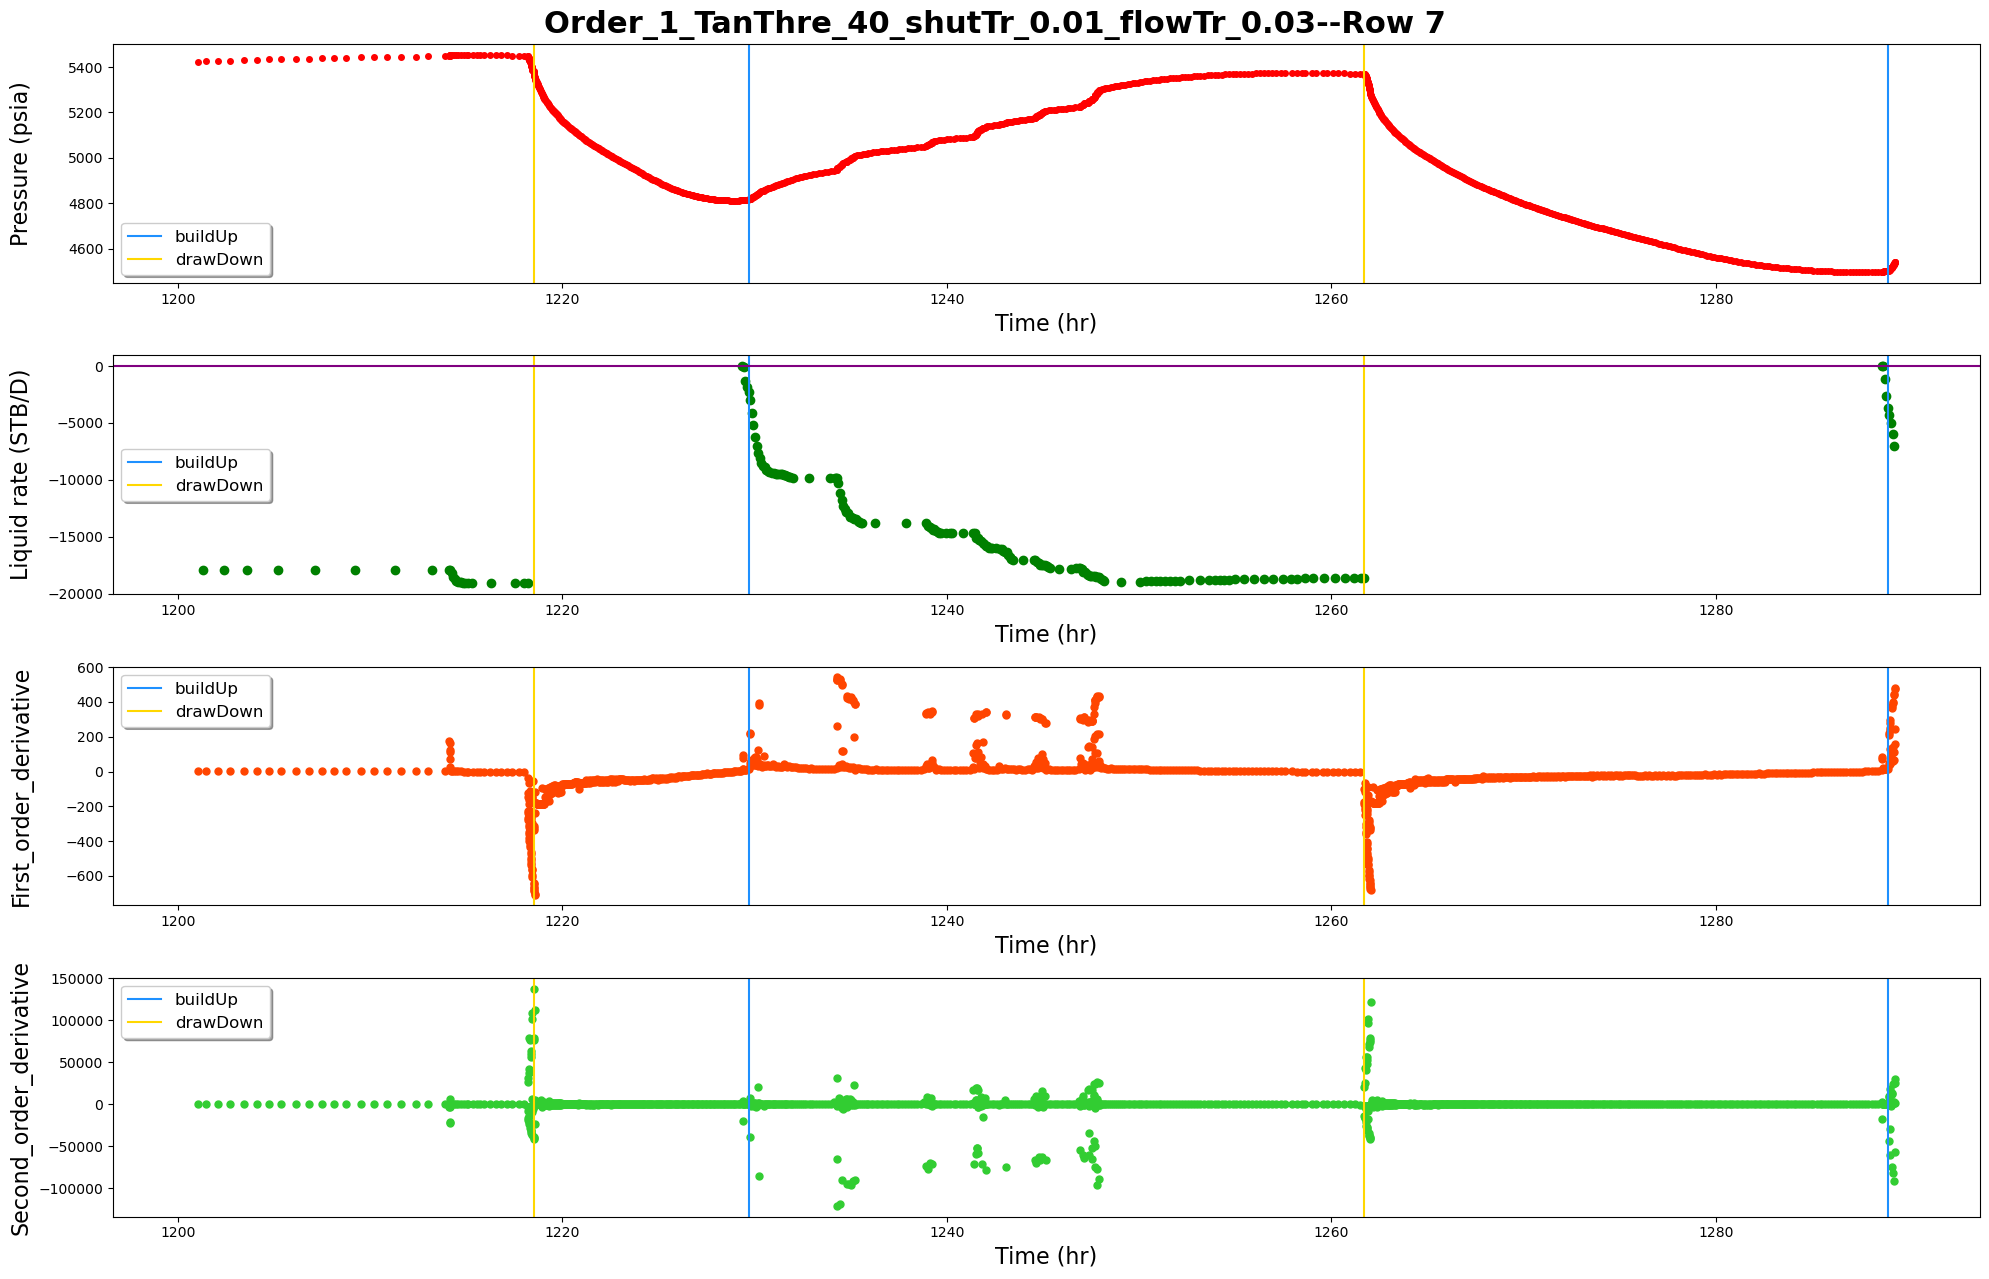

------row 8-----detected points:[9024]


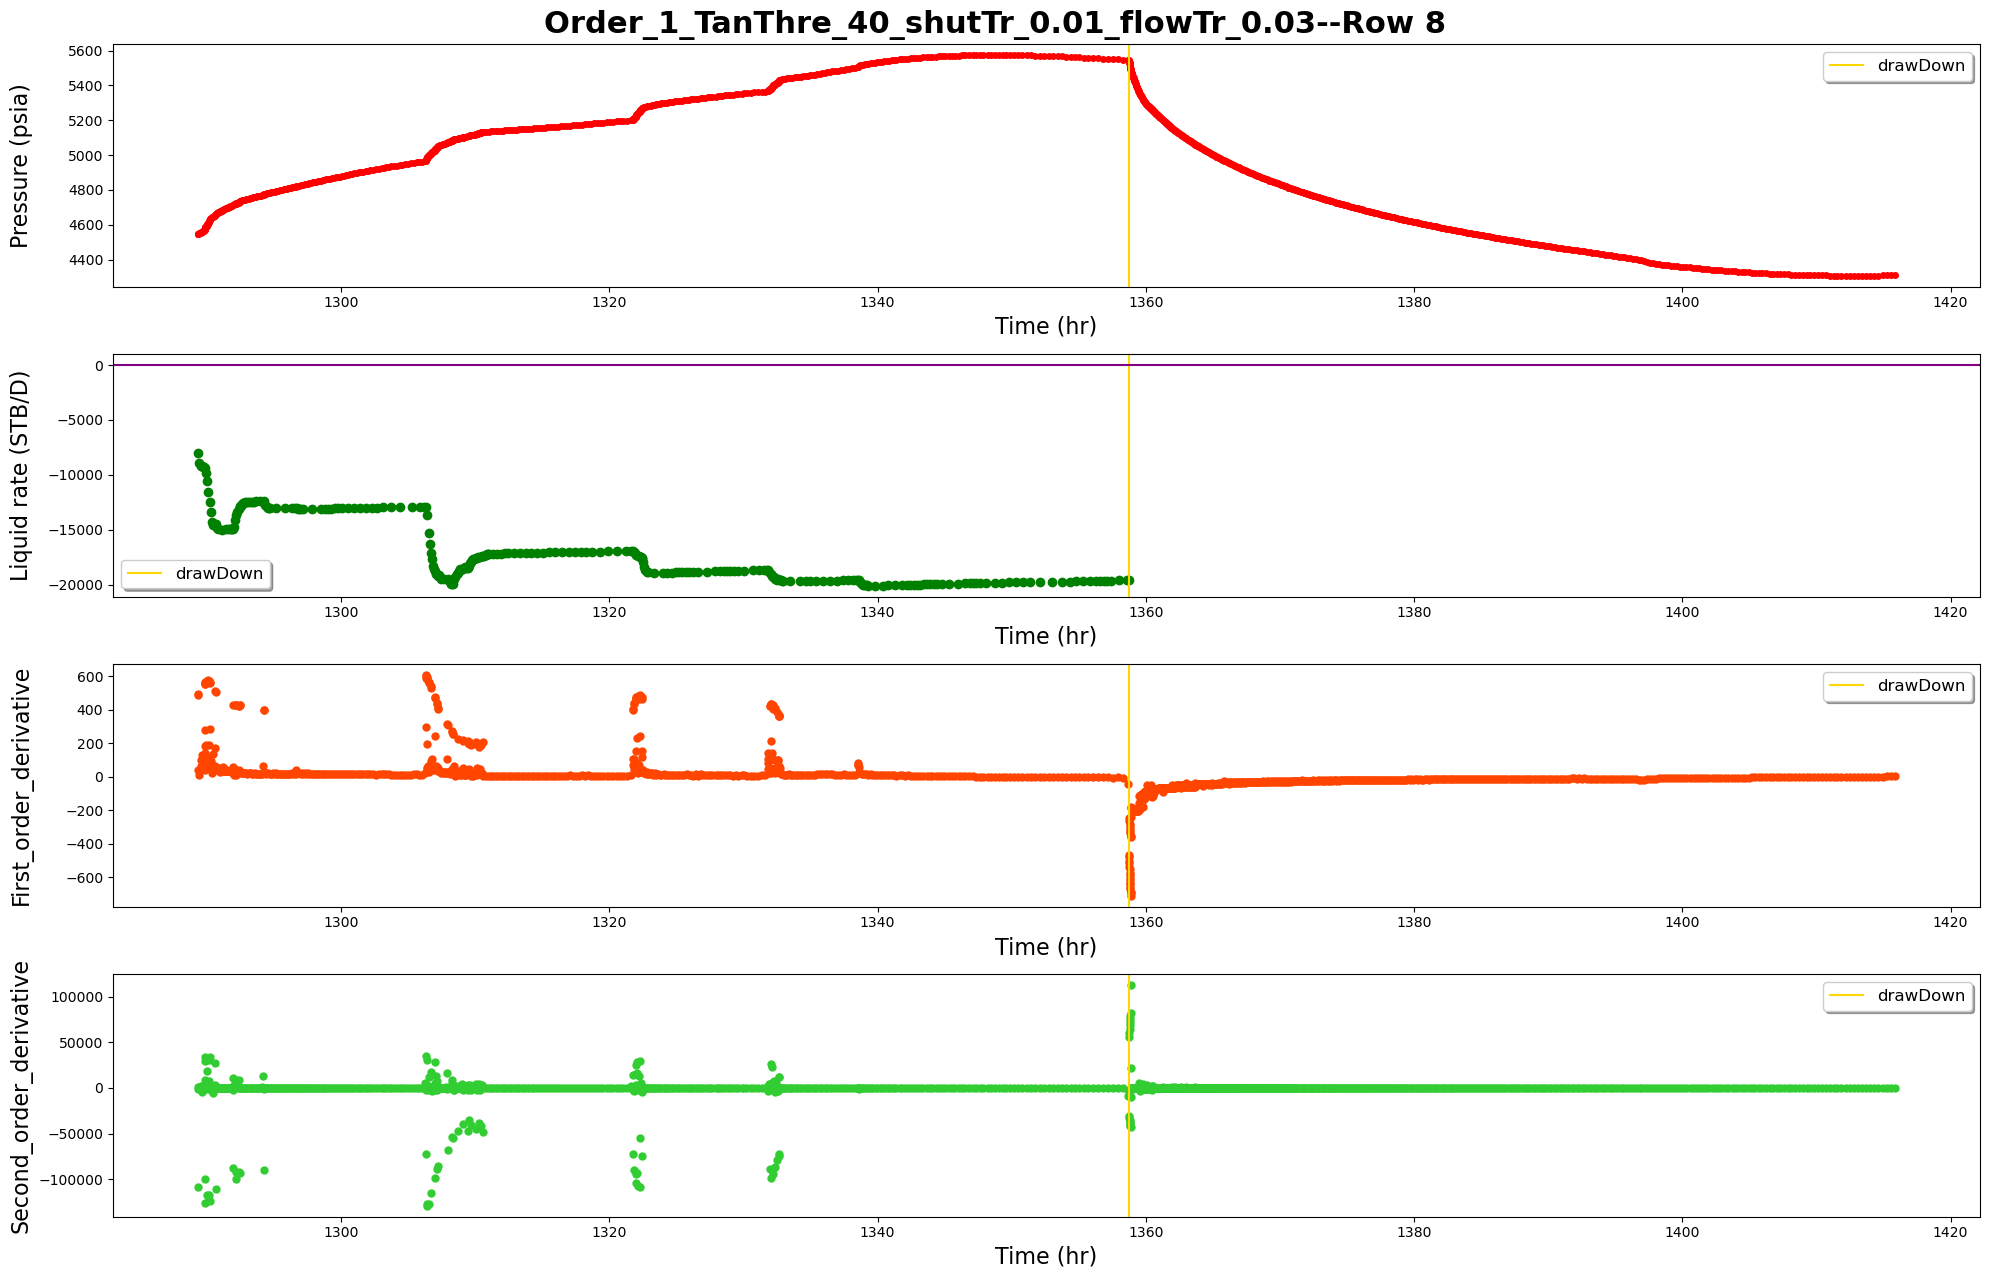

------row 9-----detected points:[9606, 10149, 10259, 10527]


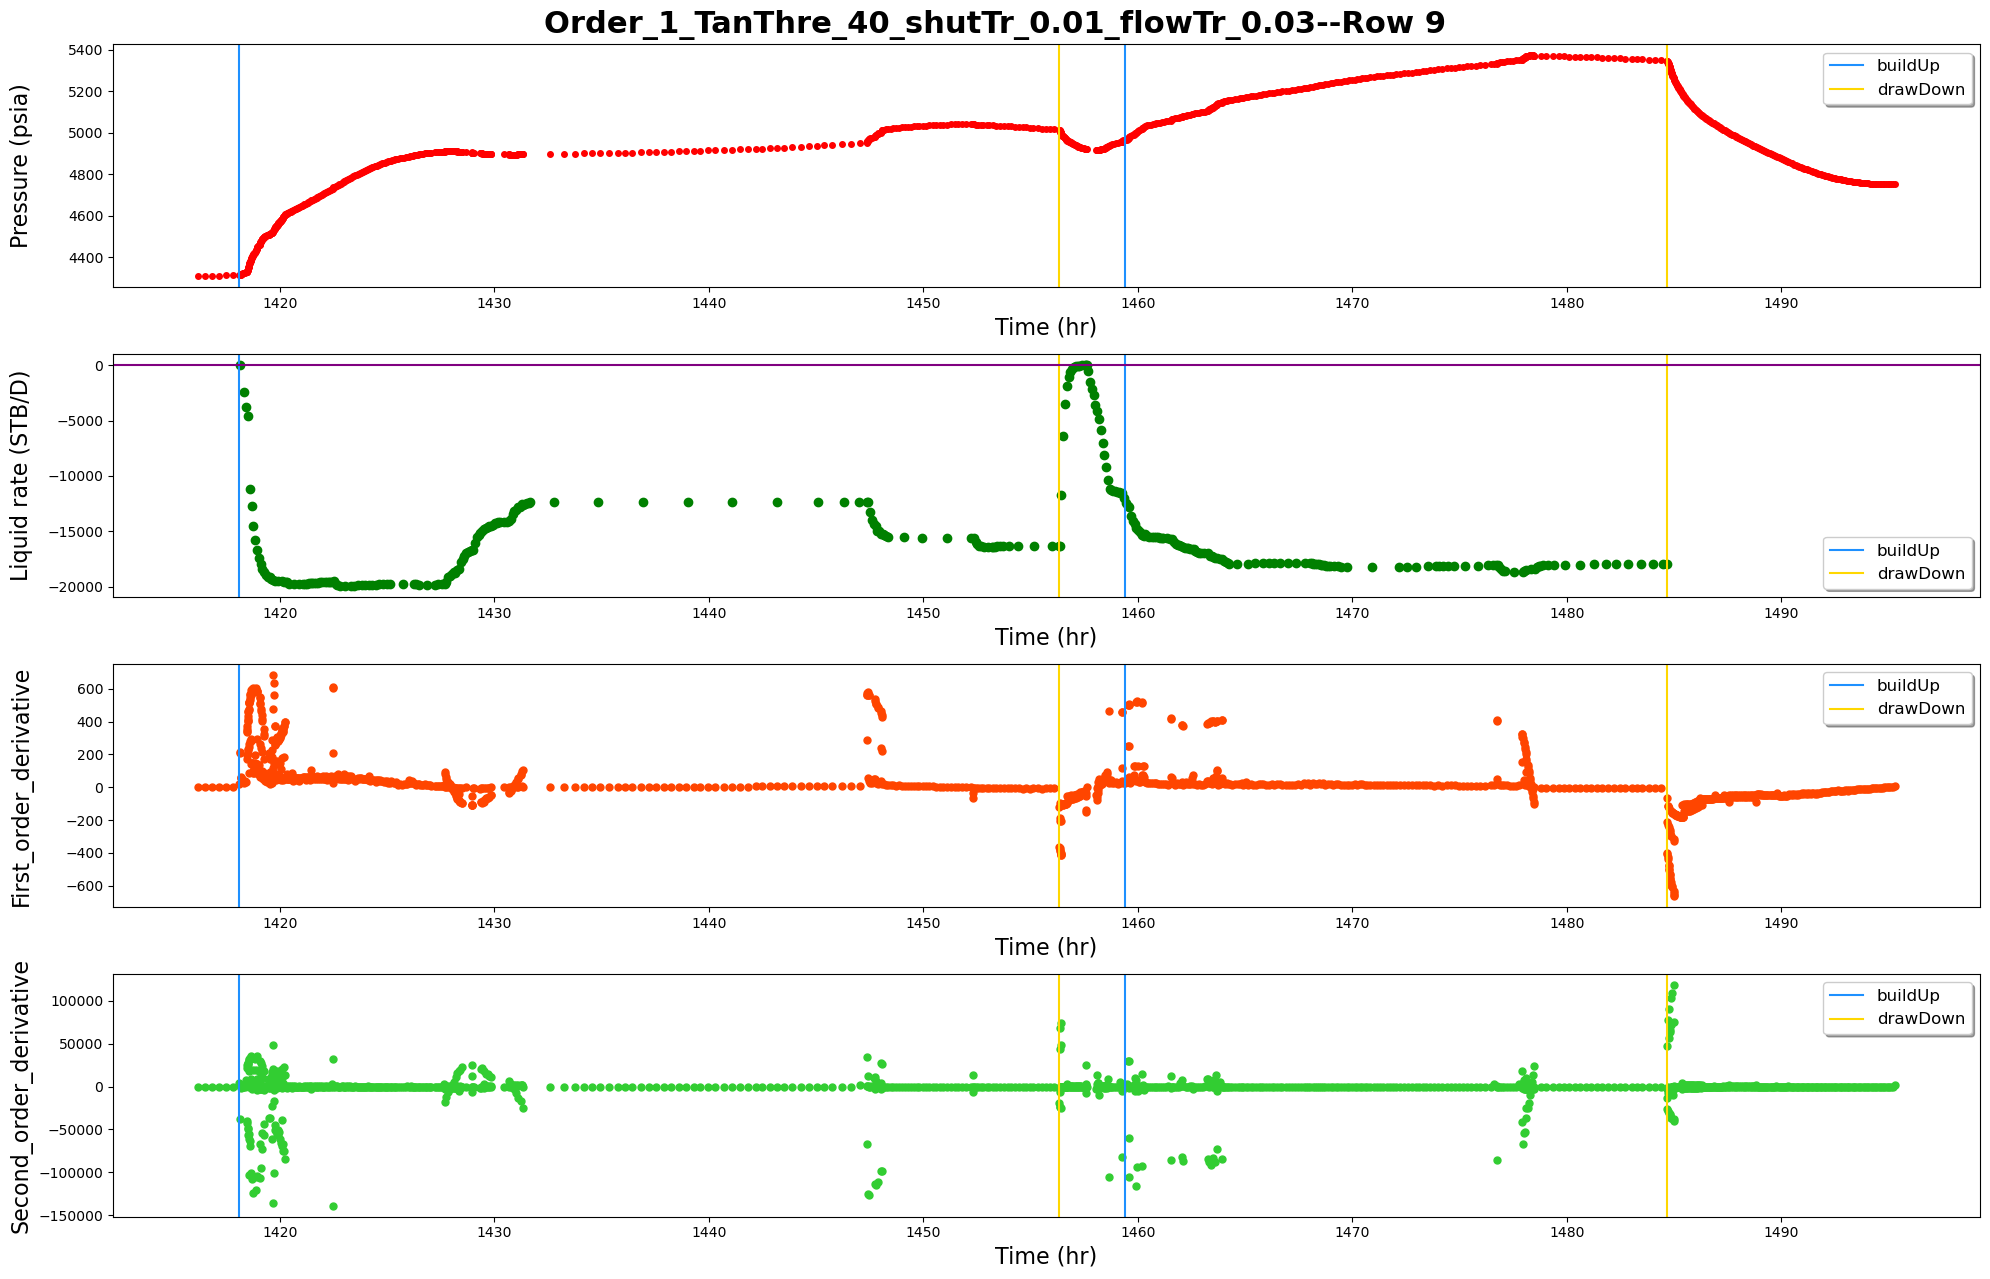

------row 10-----detected points:[10810, 11340, 11490]


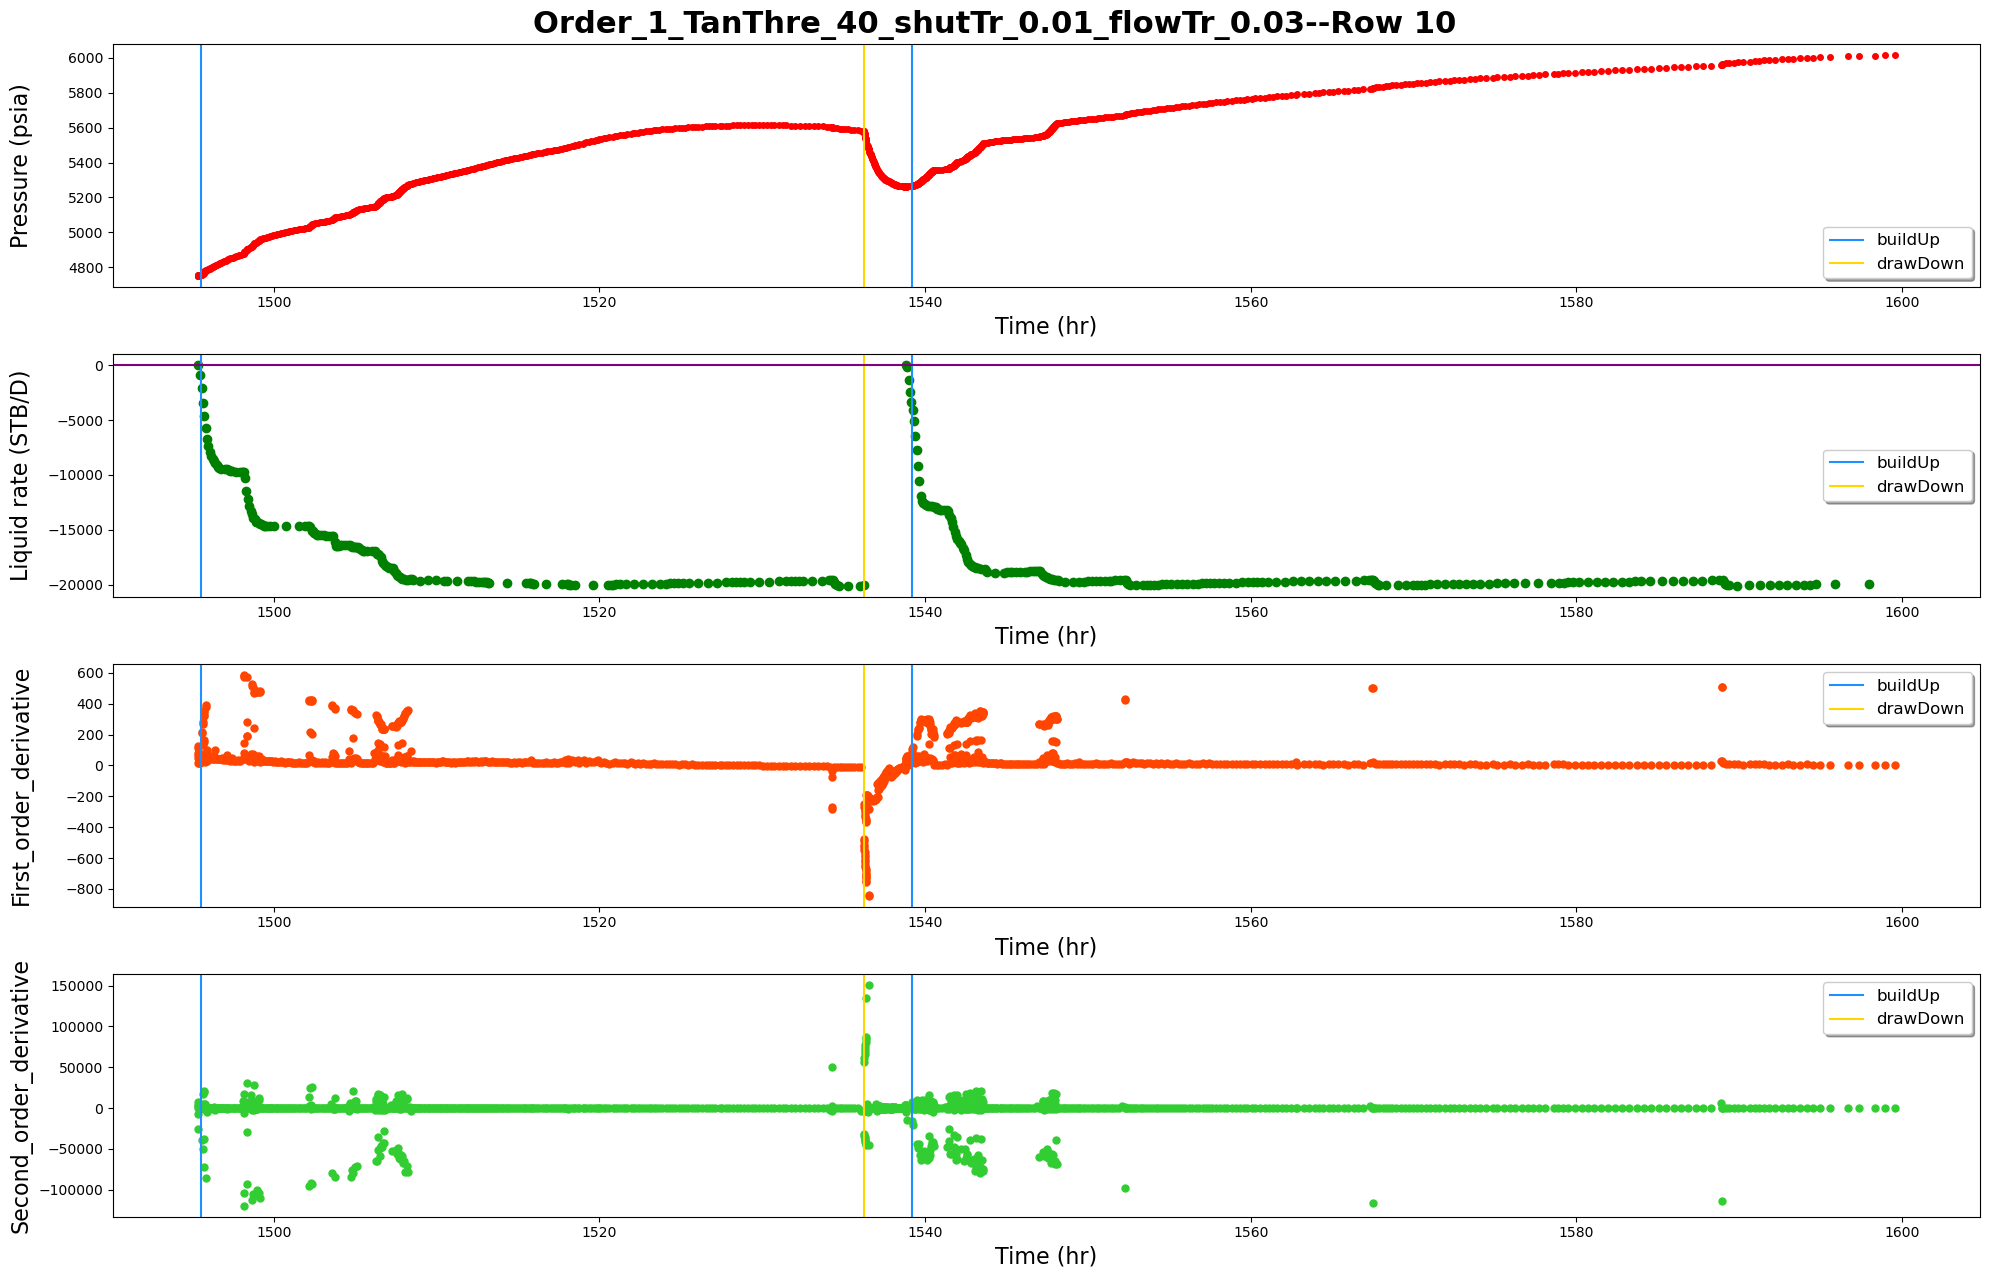

------row 11-----detected points:[12362, 13038]


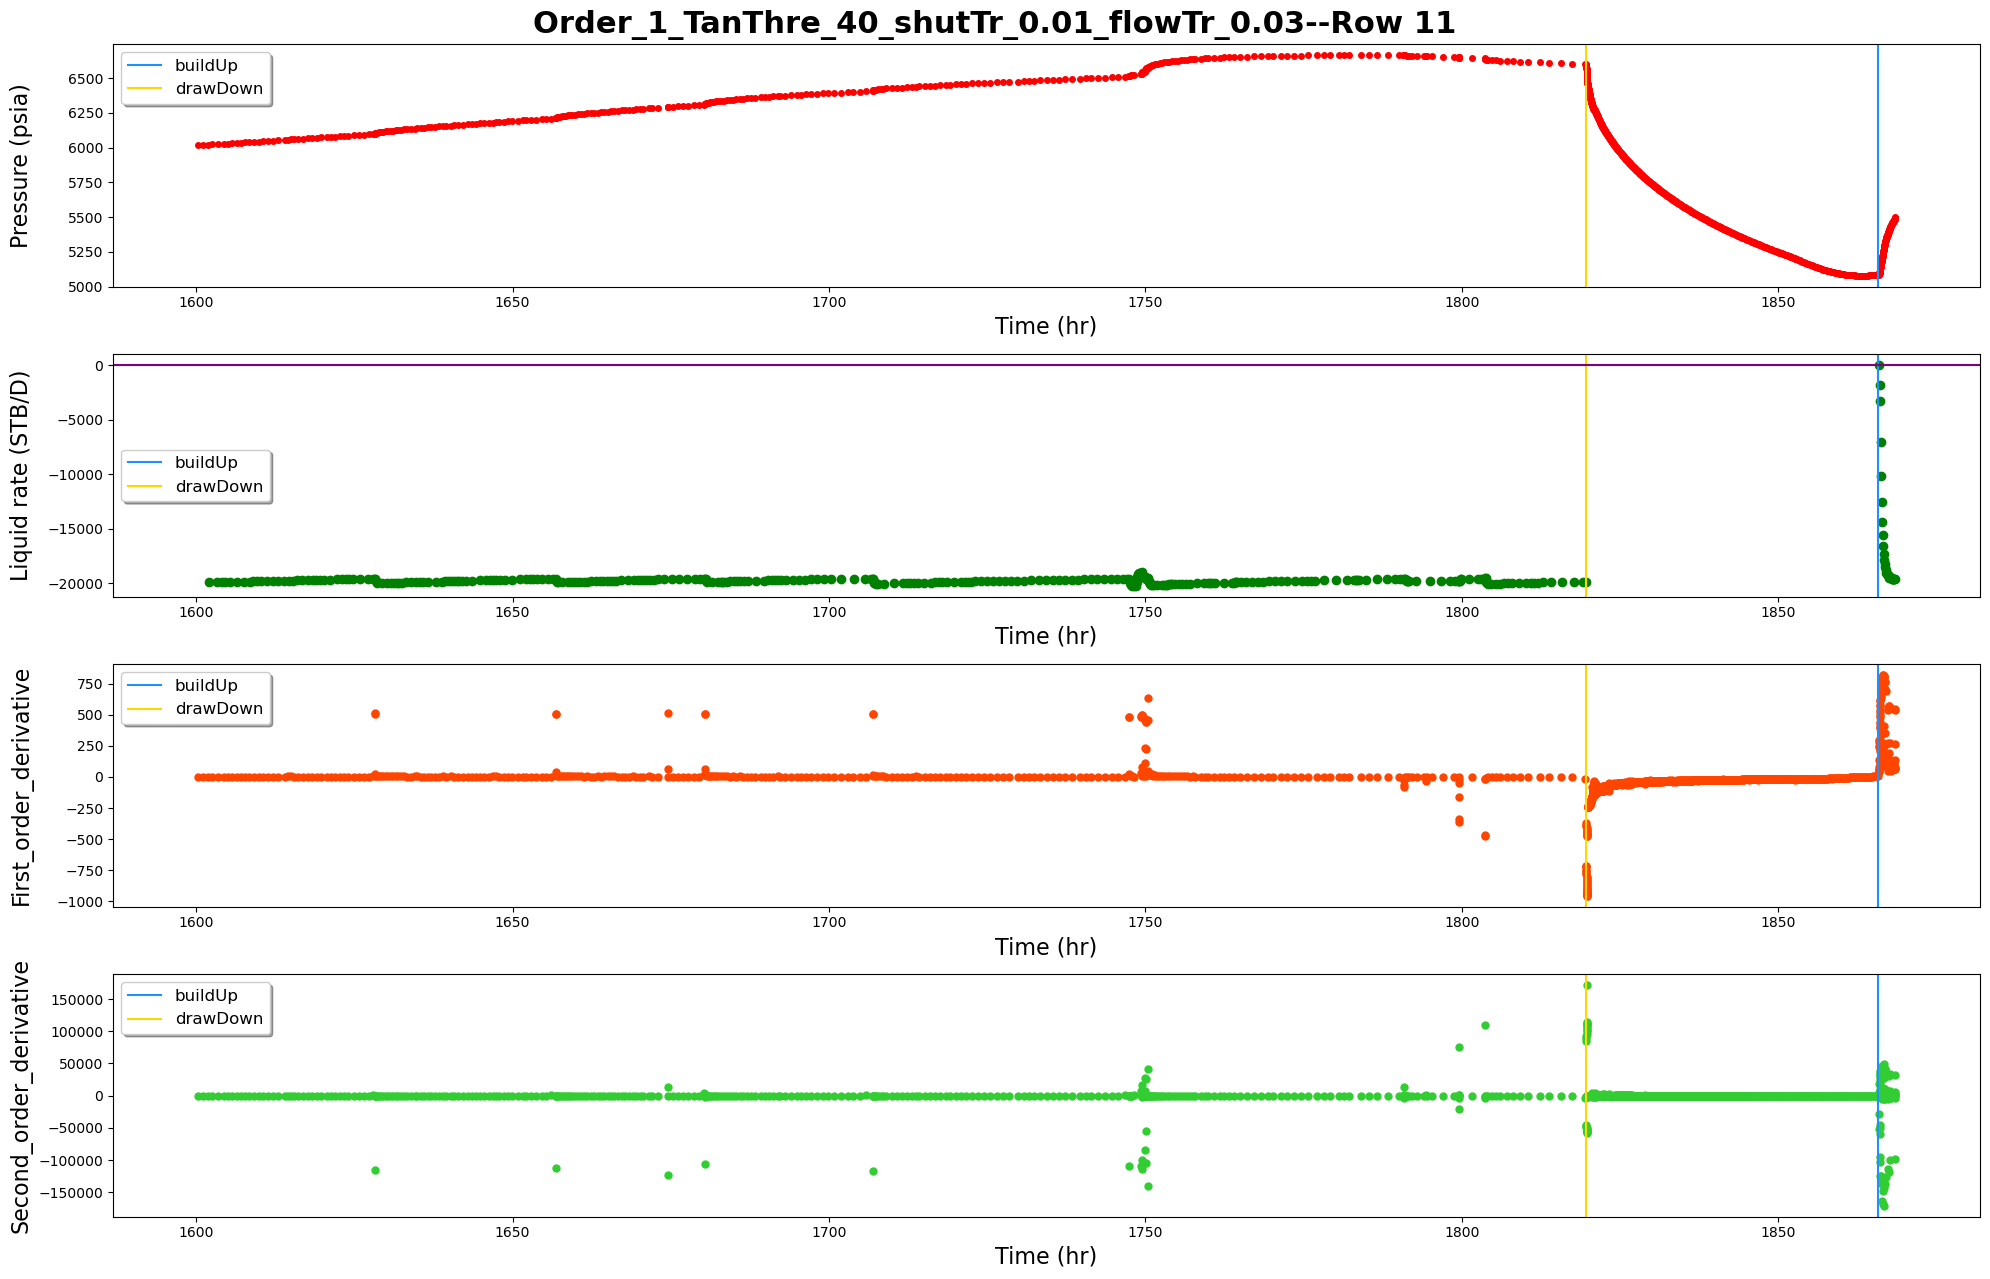

------row 12-----detected points:[13909, 14089]


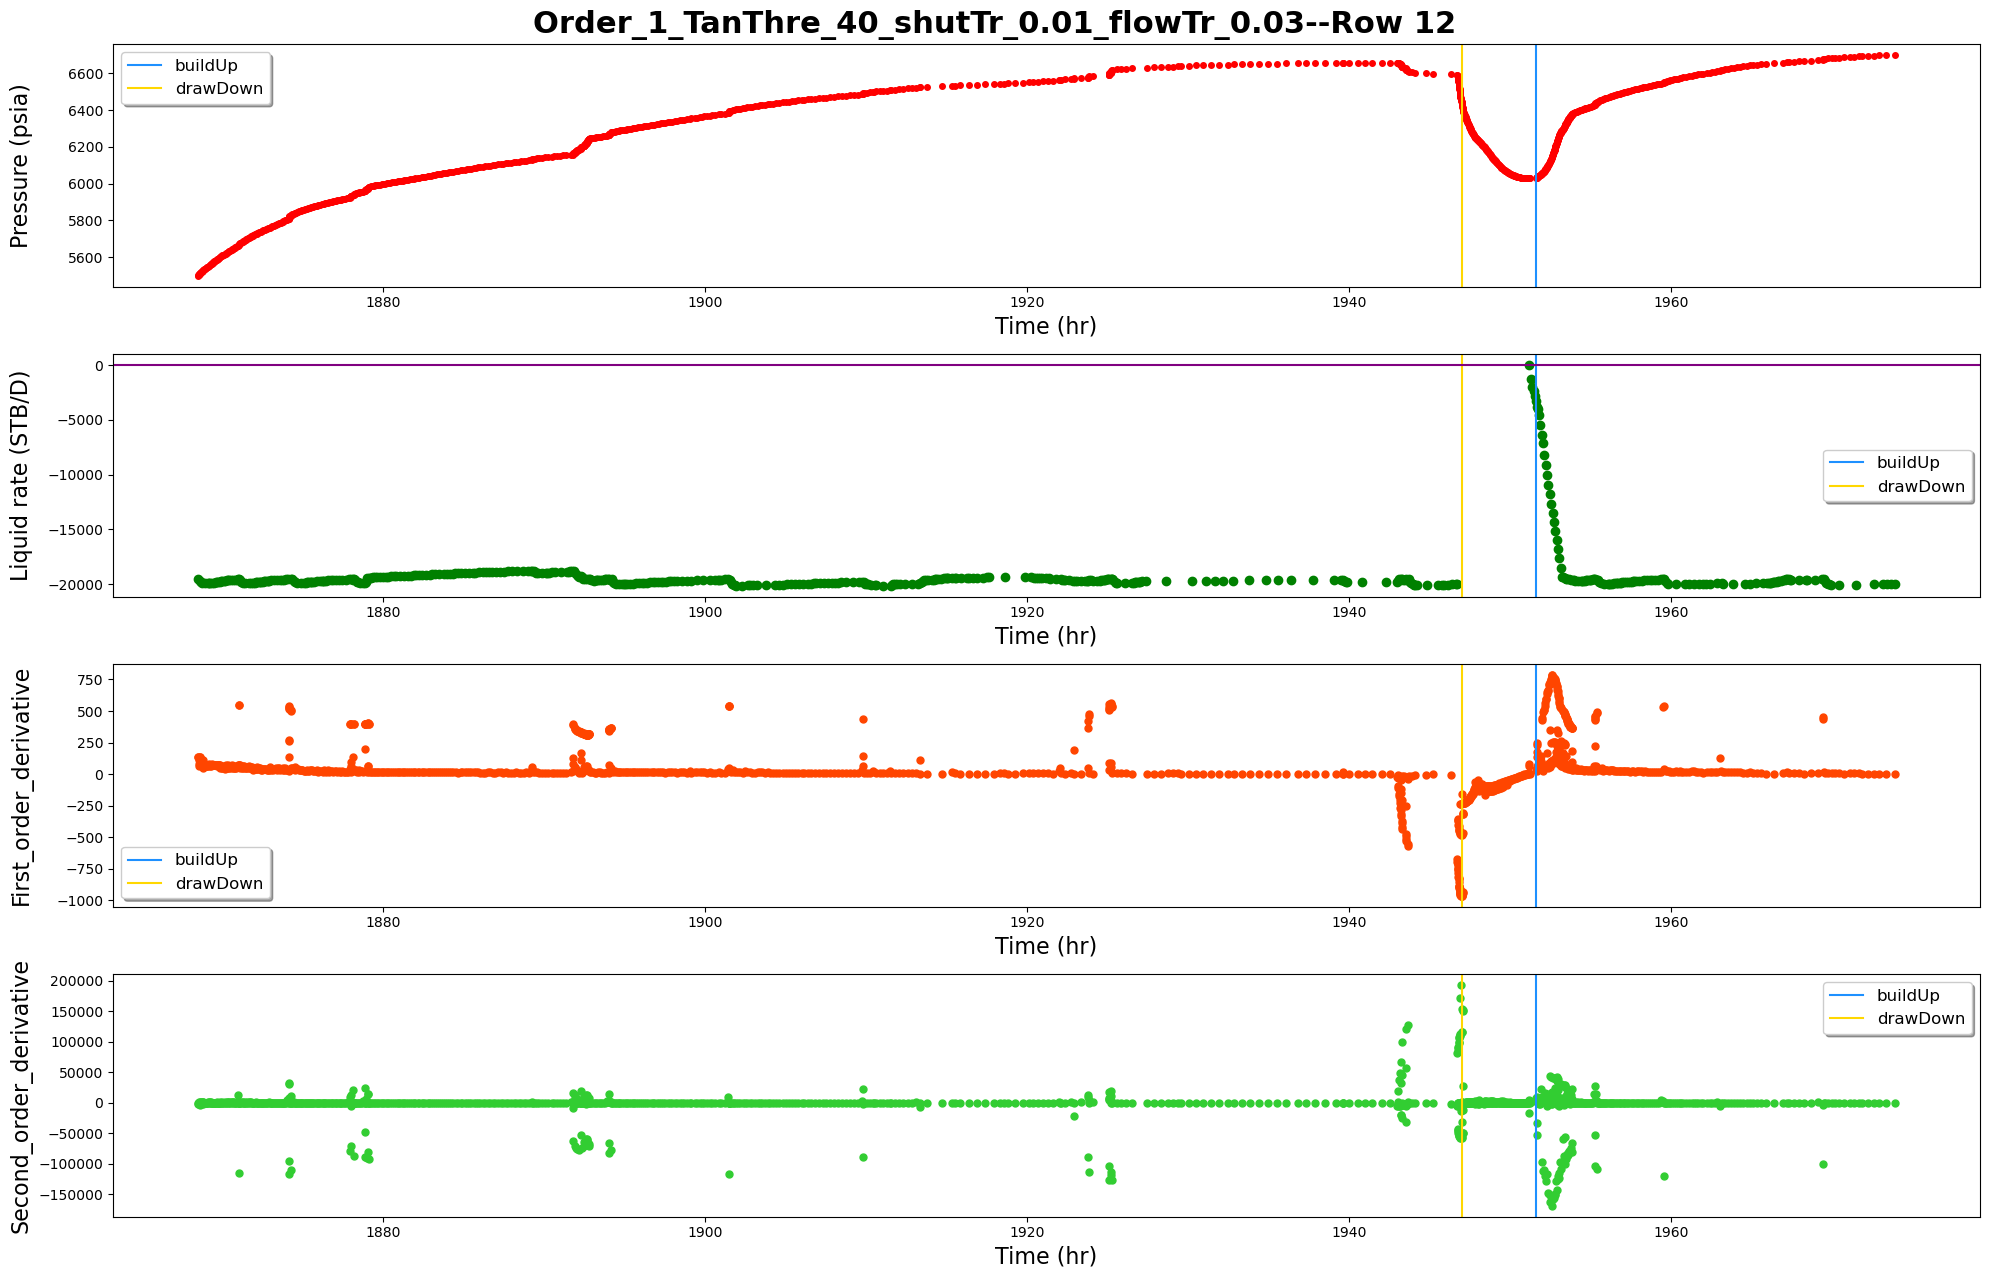

------row 13-----detected points:[14471, 14592, 14774, 15347]


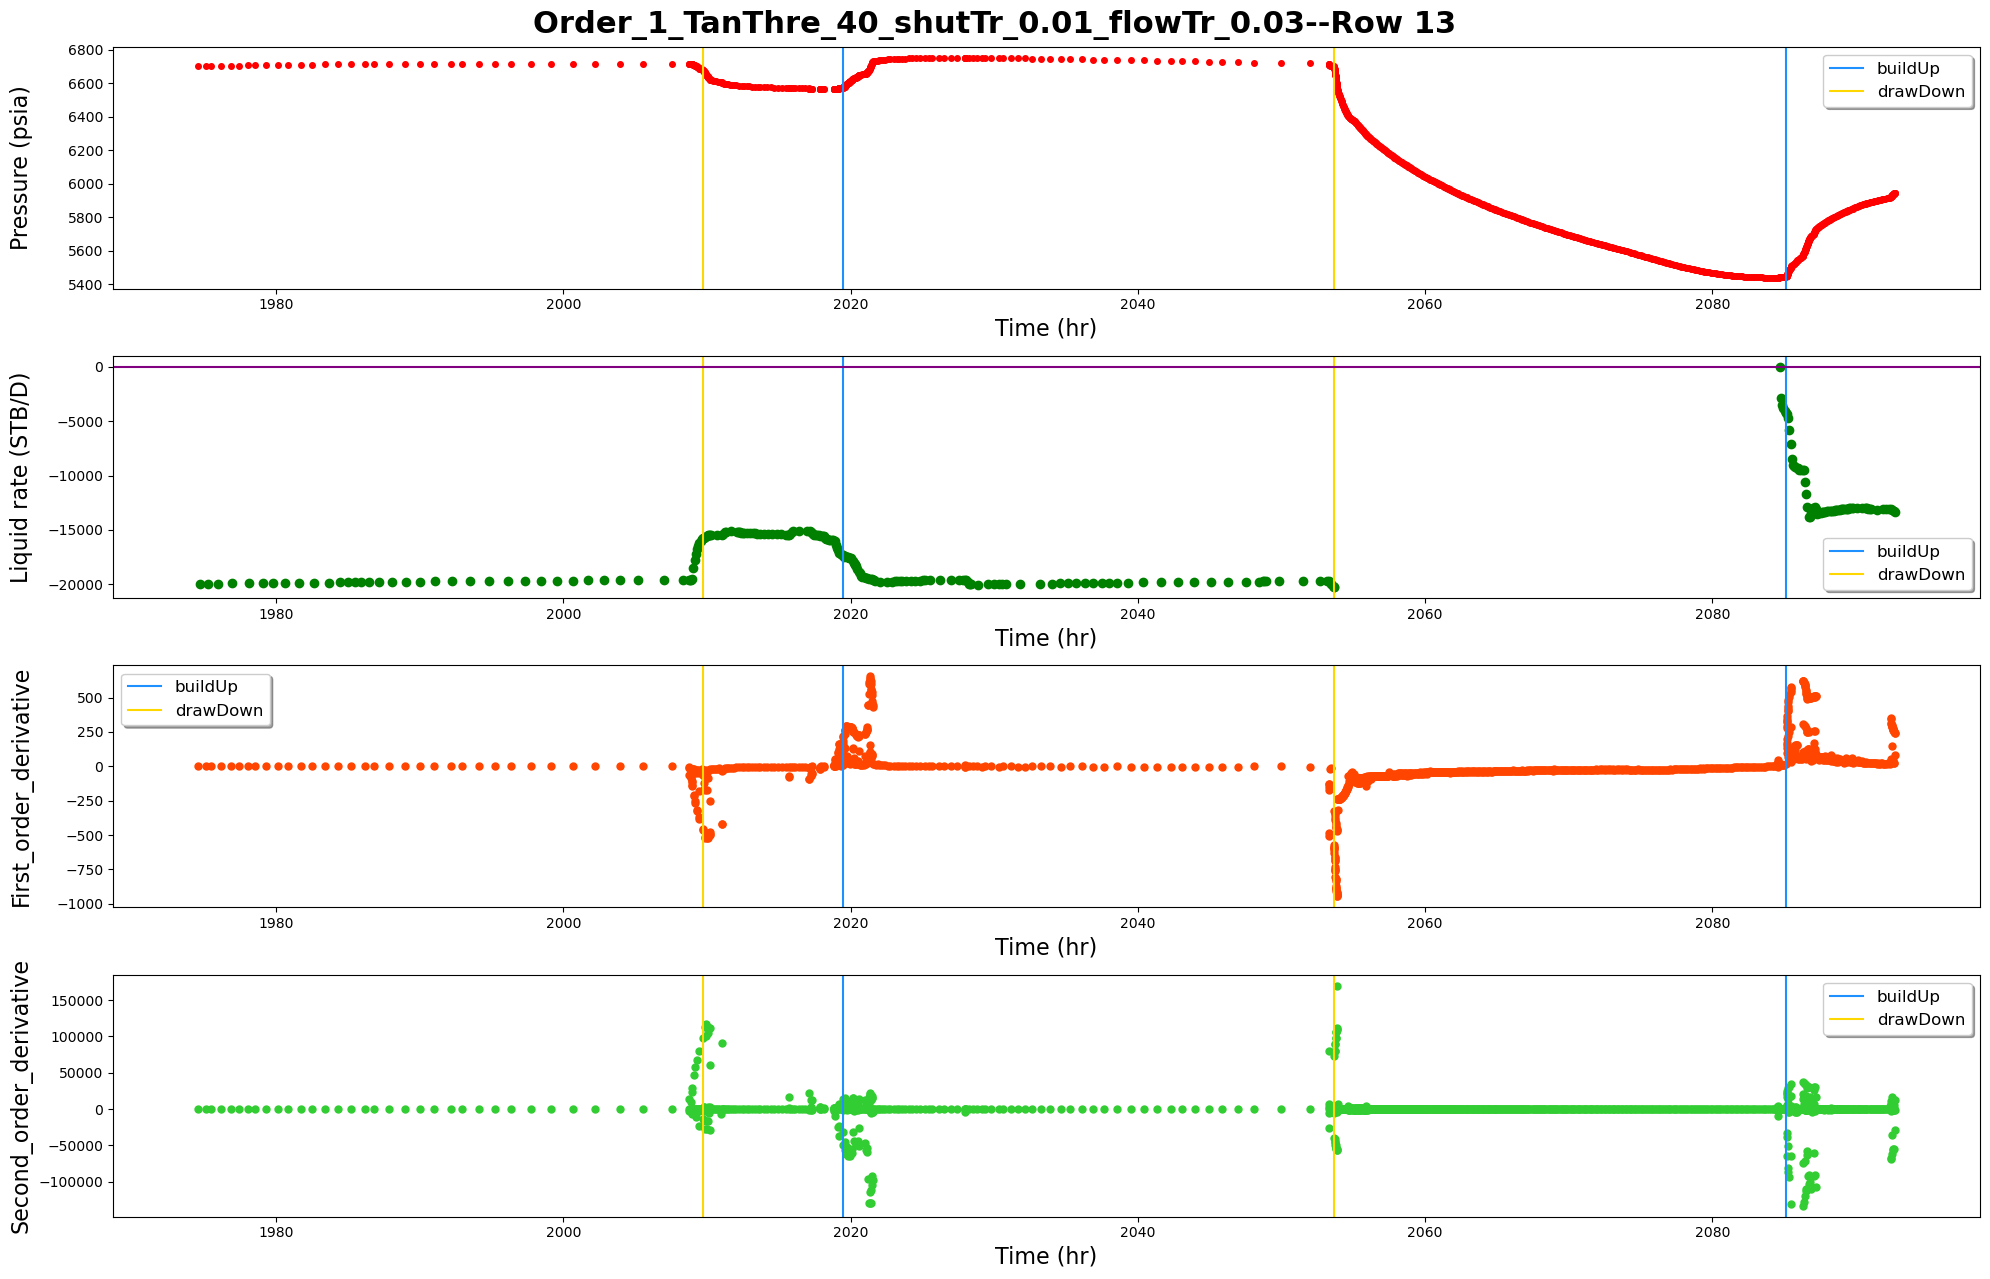

------row 14-----detected points:[16096, 16584]


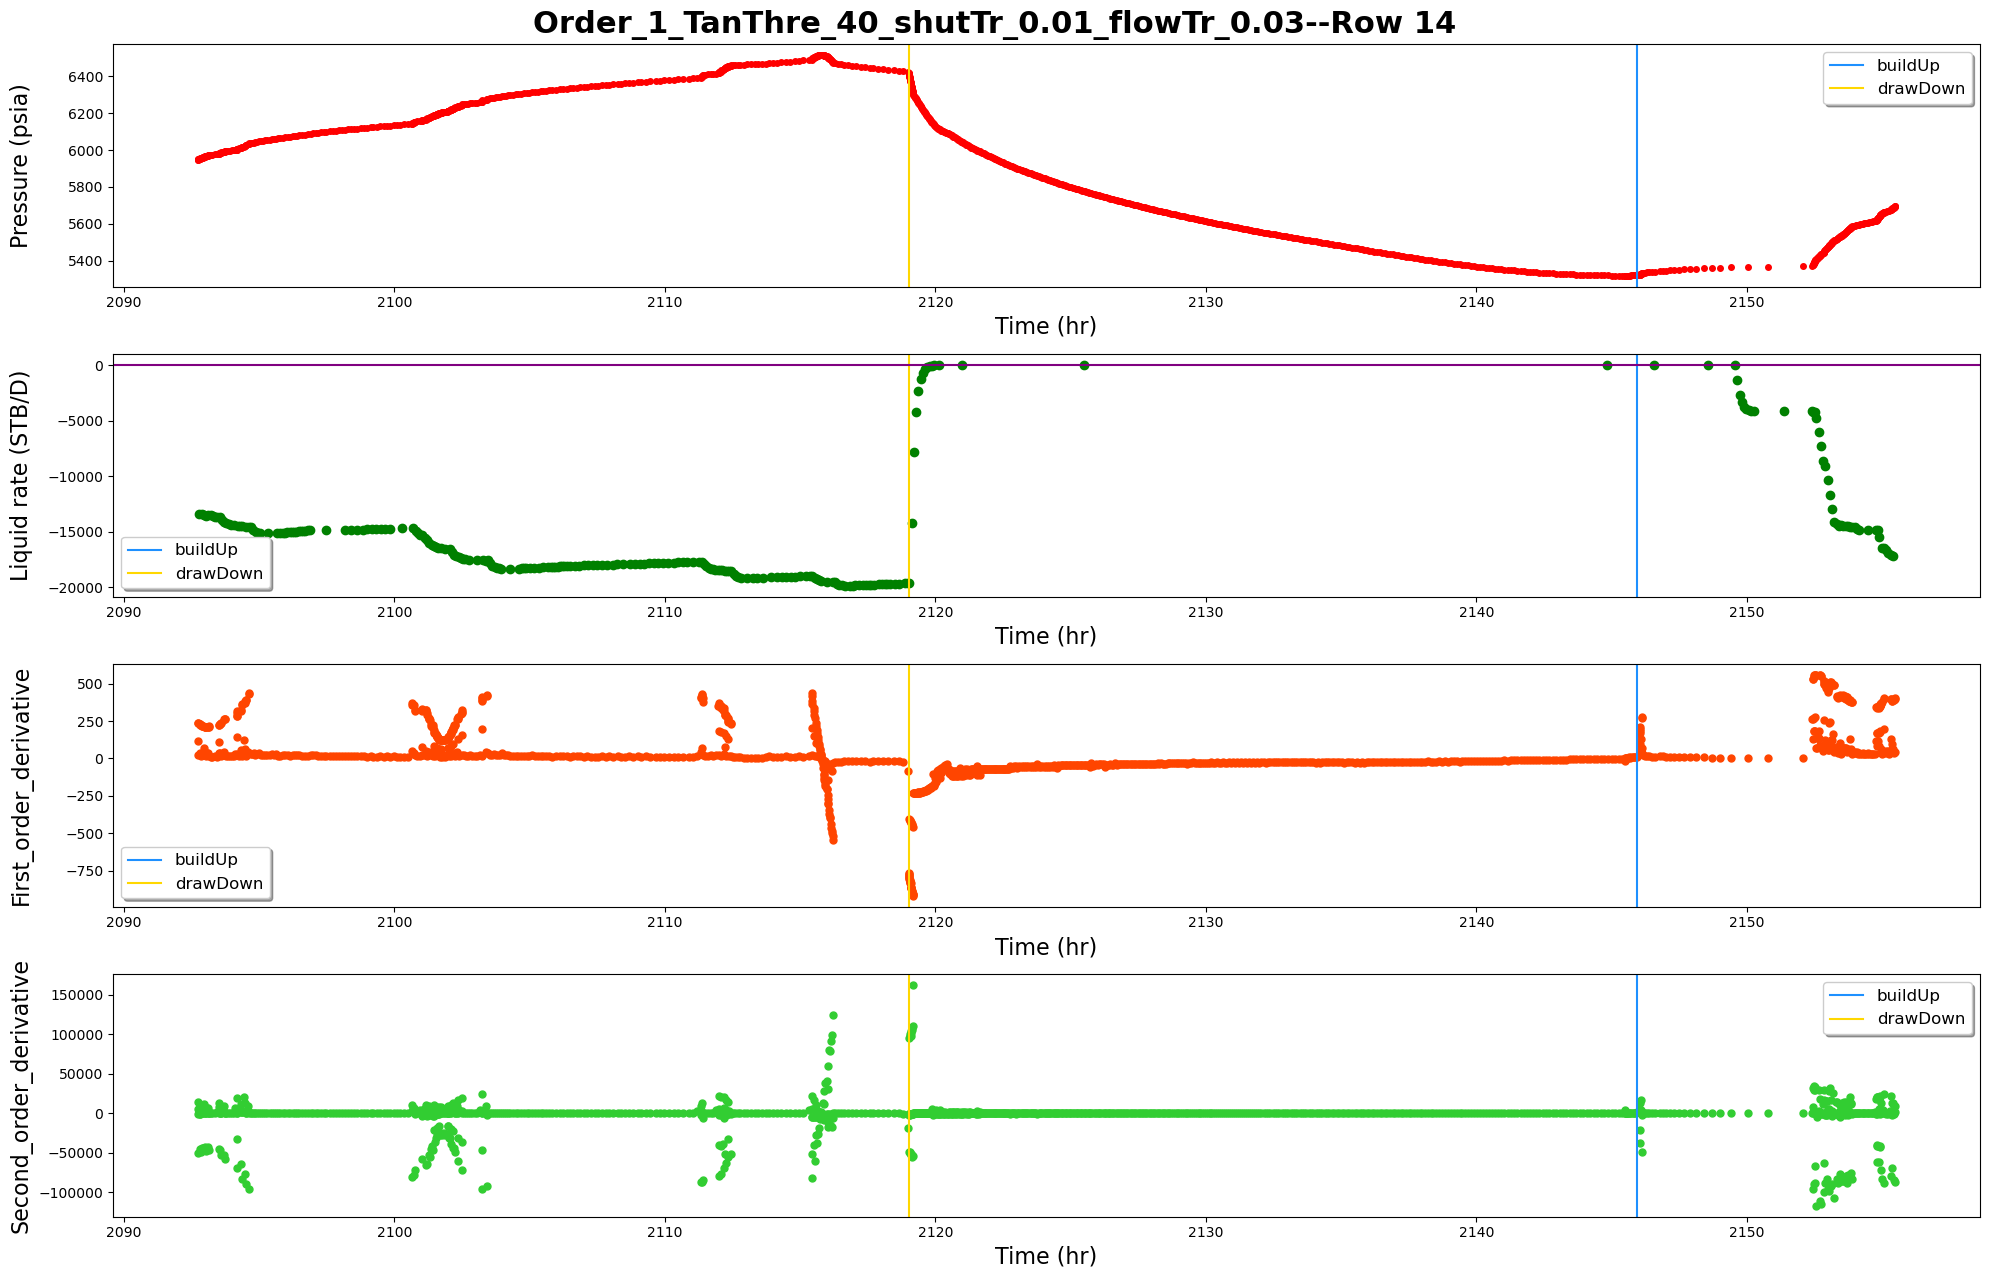

------row 15-----detected points:[17589]


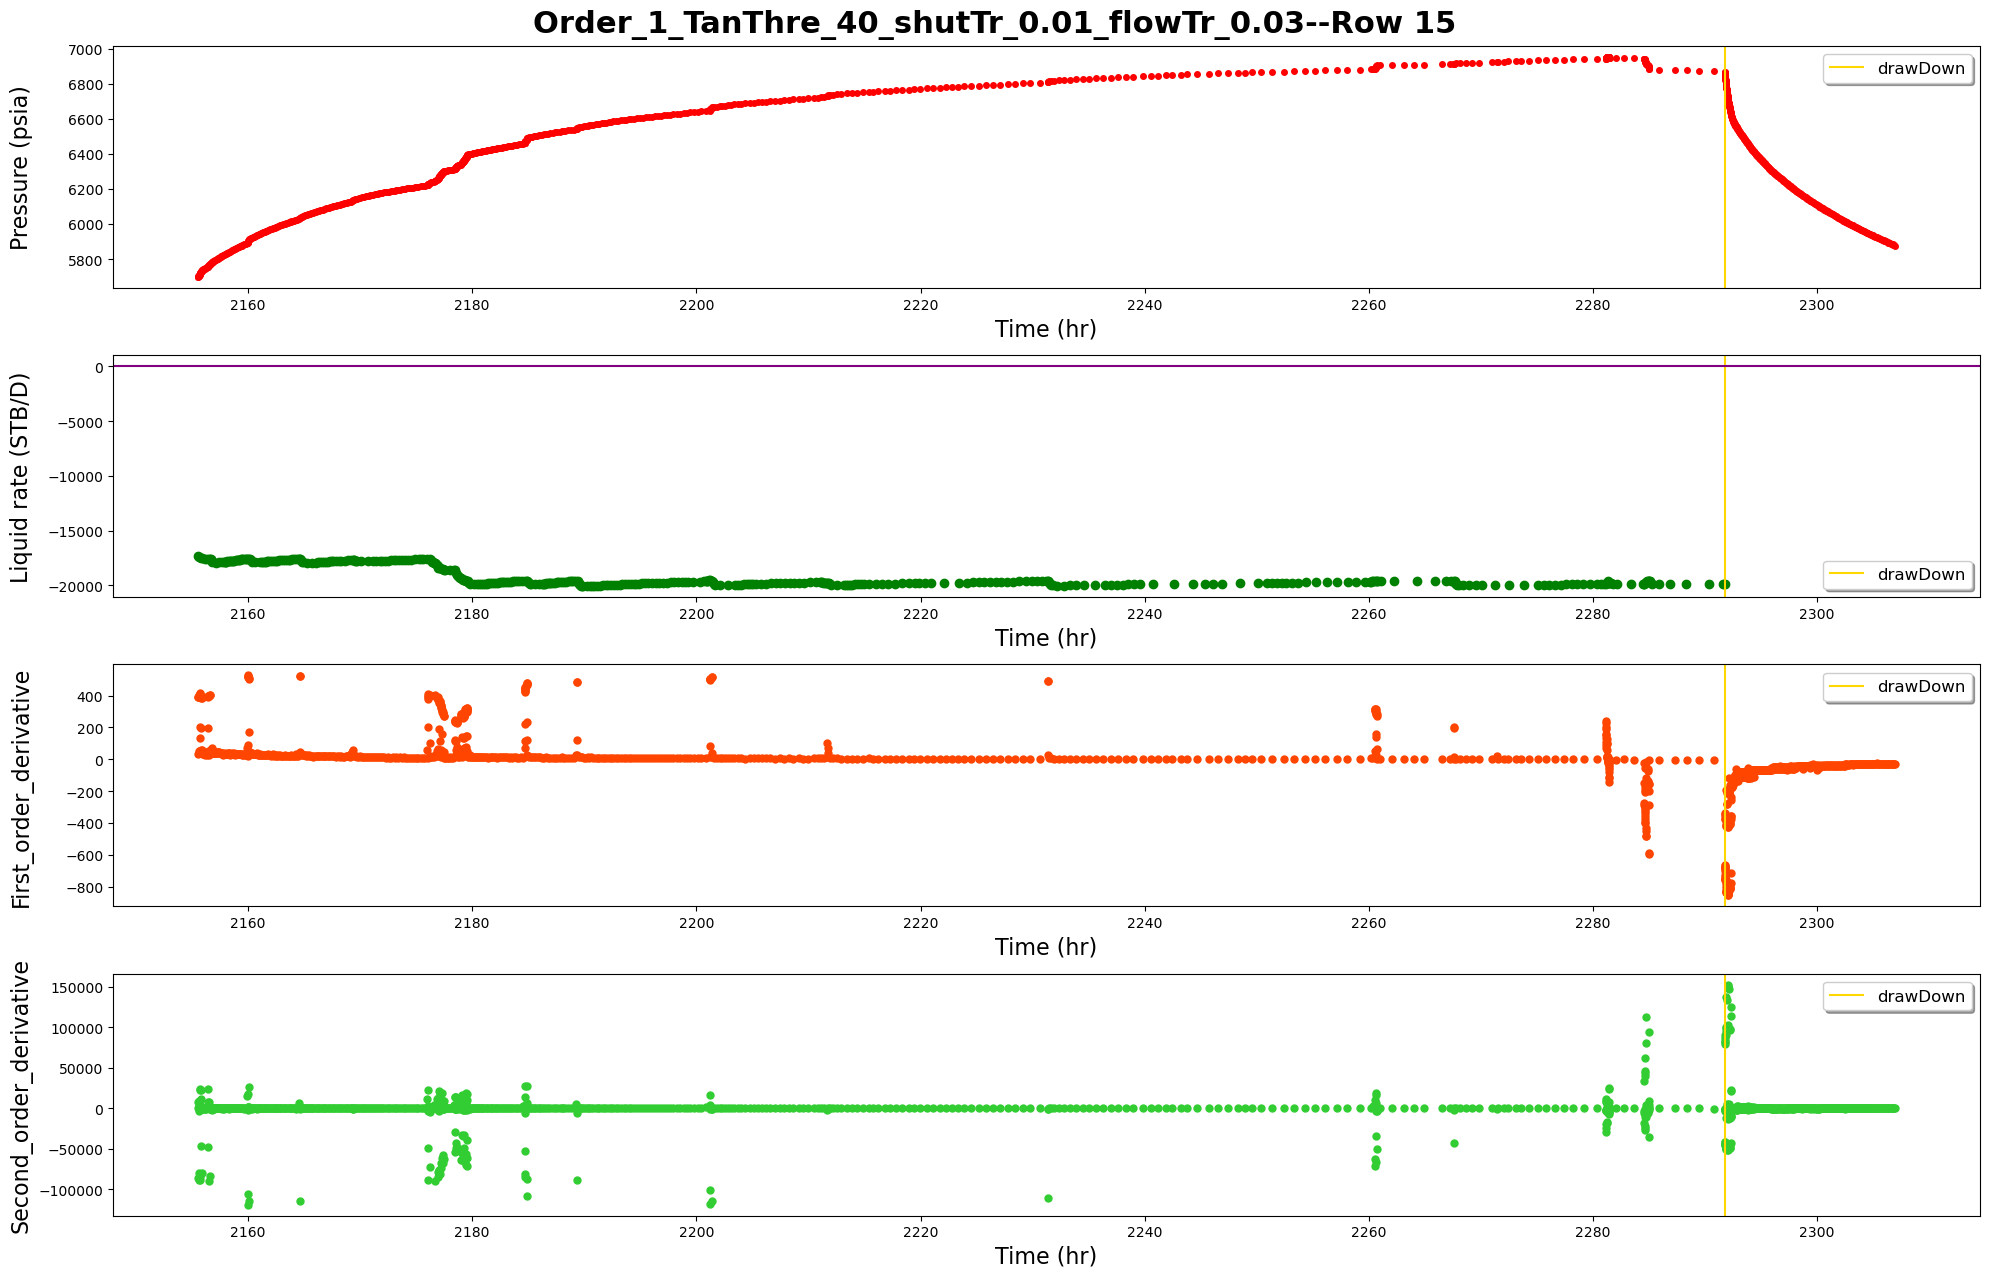

------row 16-----detected points:[18433]


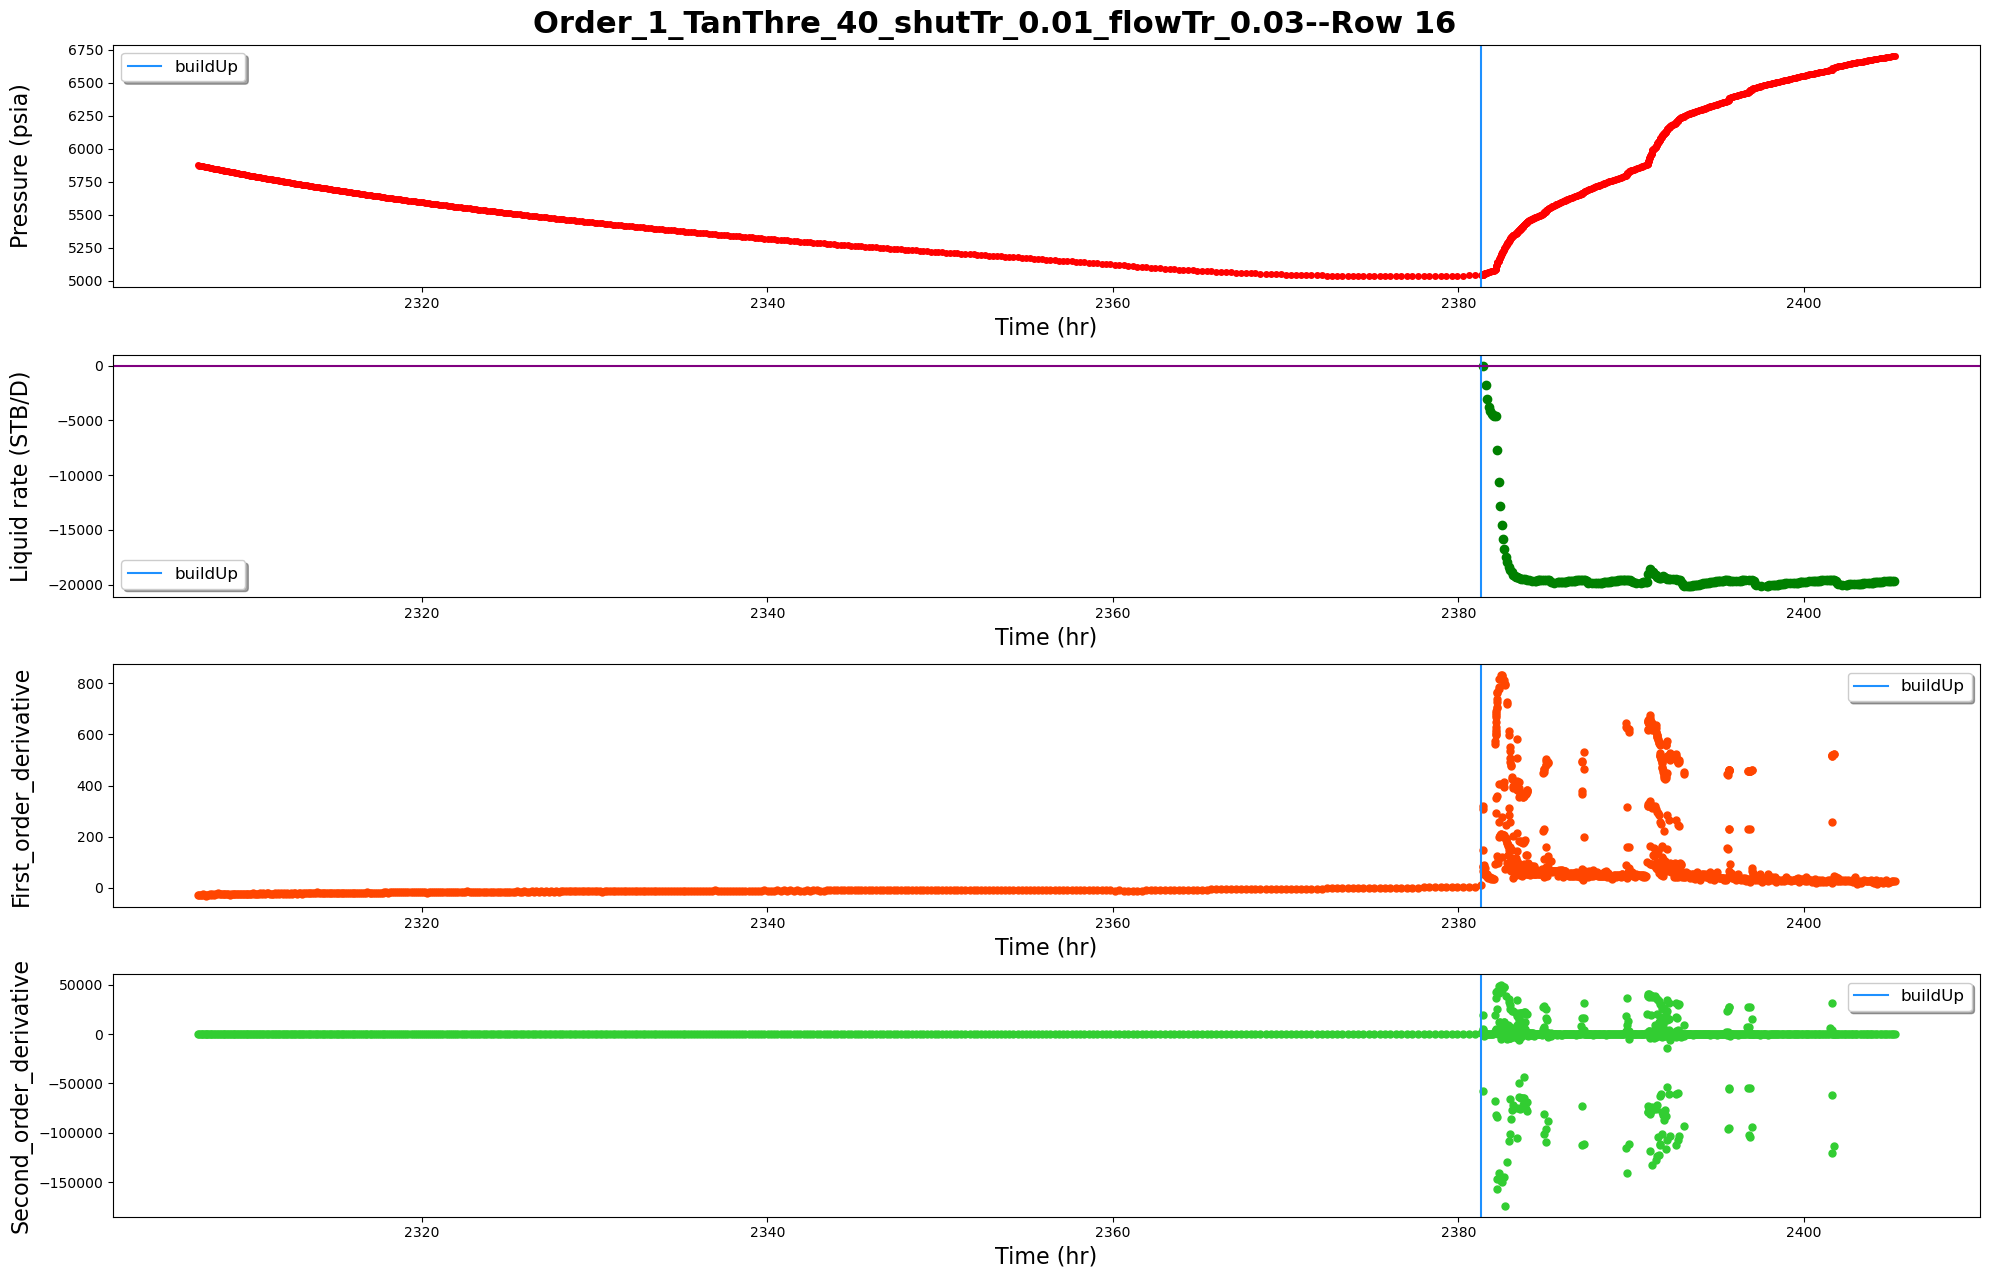

------row 17-----detected points:[19642, 19779, 19984, 20347]


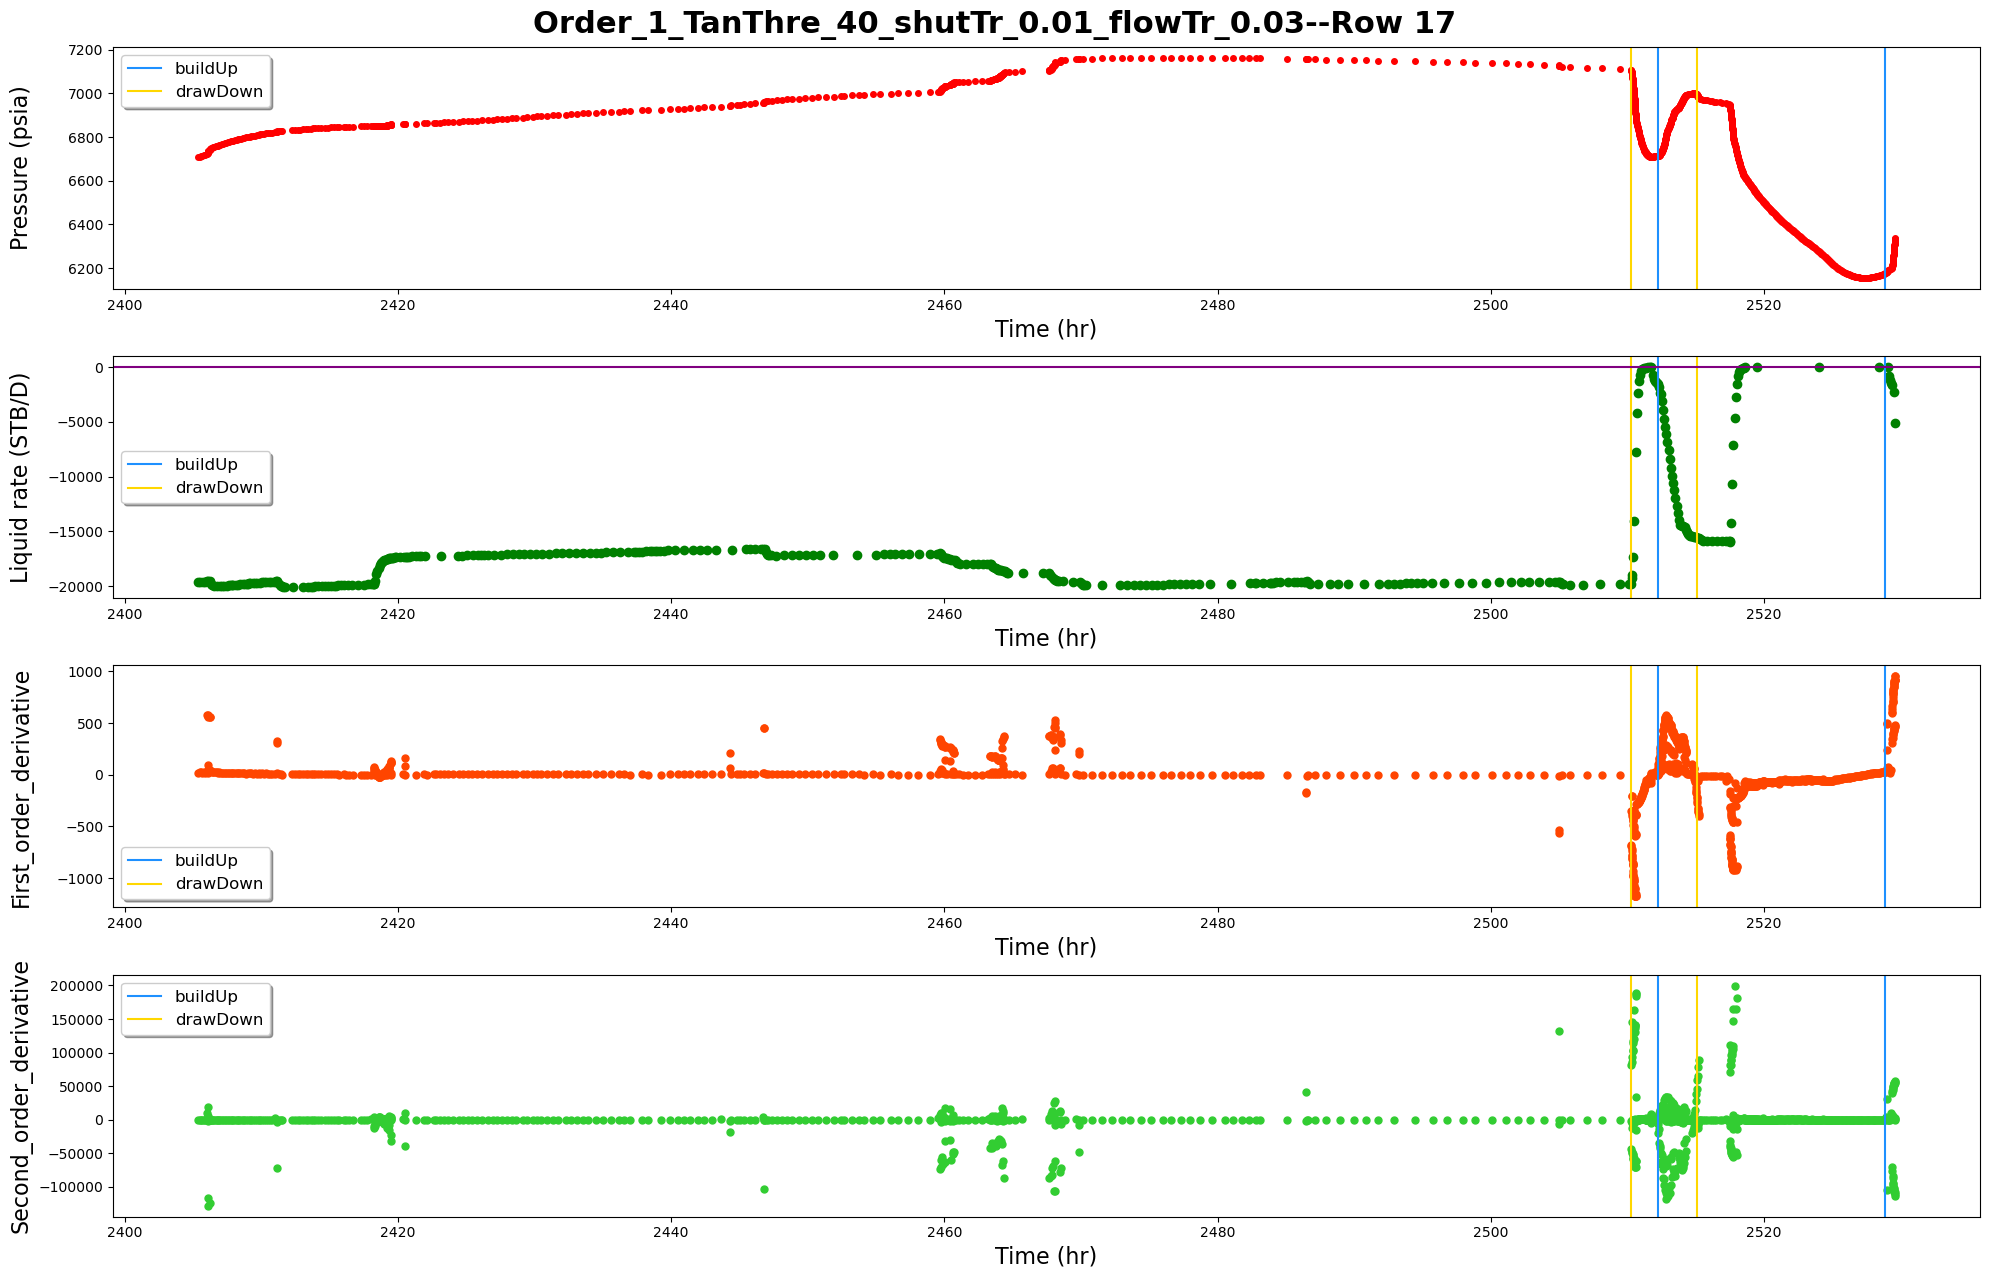

------row 18-----detected points:[20700, 21035]


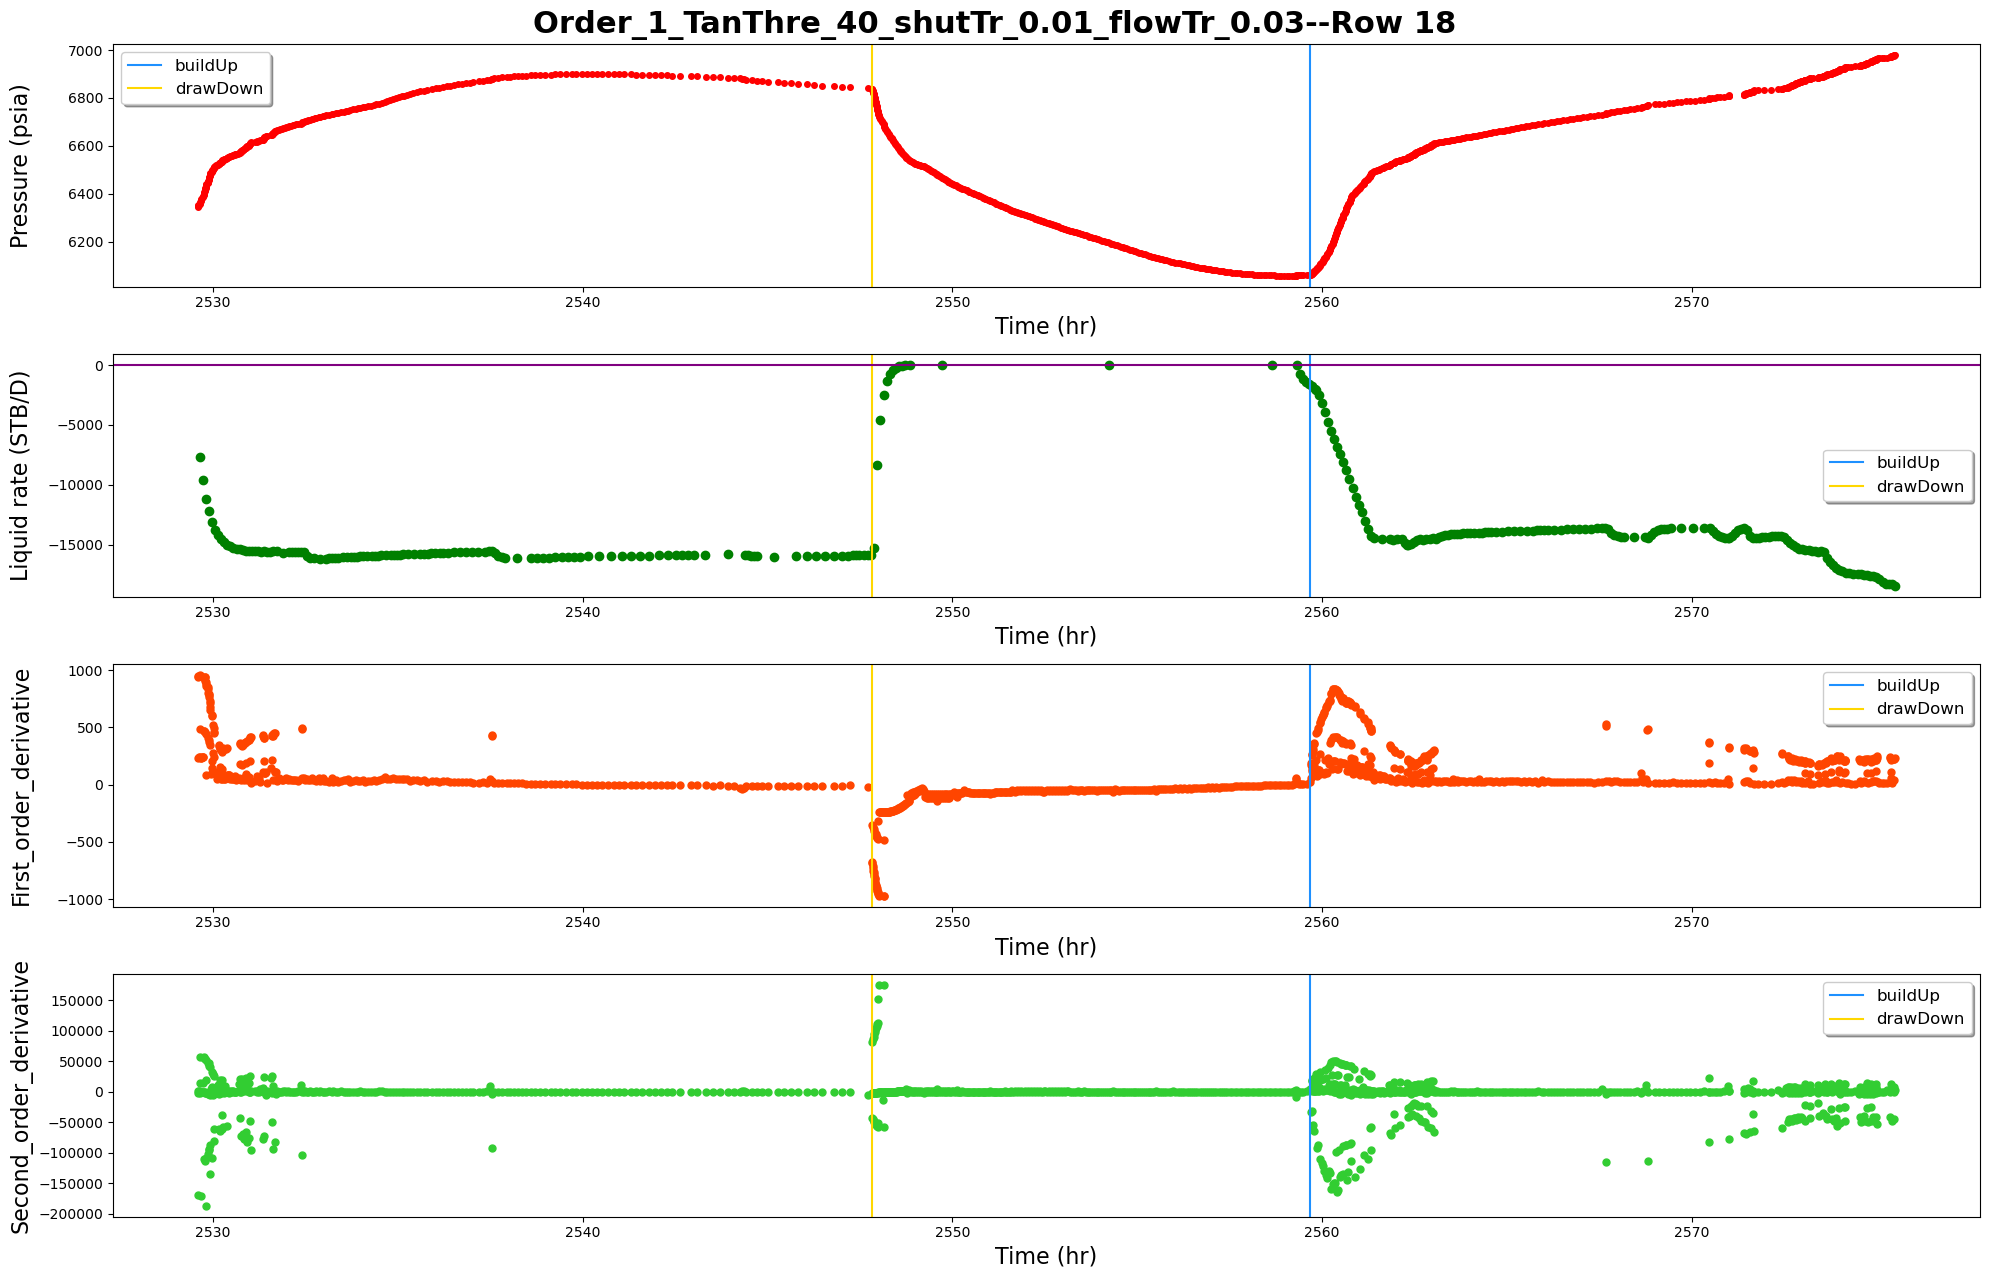

------row 19-----detected points:[21974, 22189, 22709]


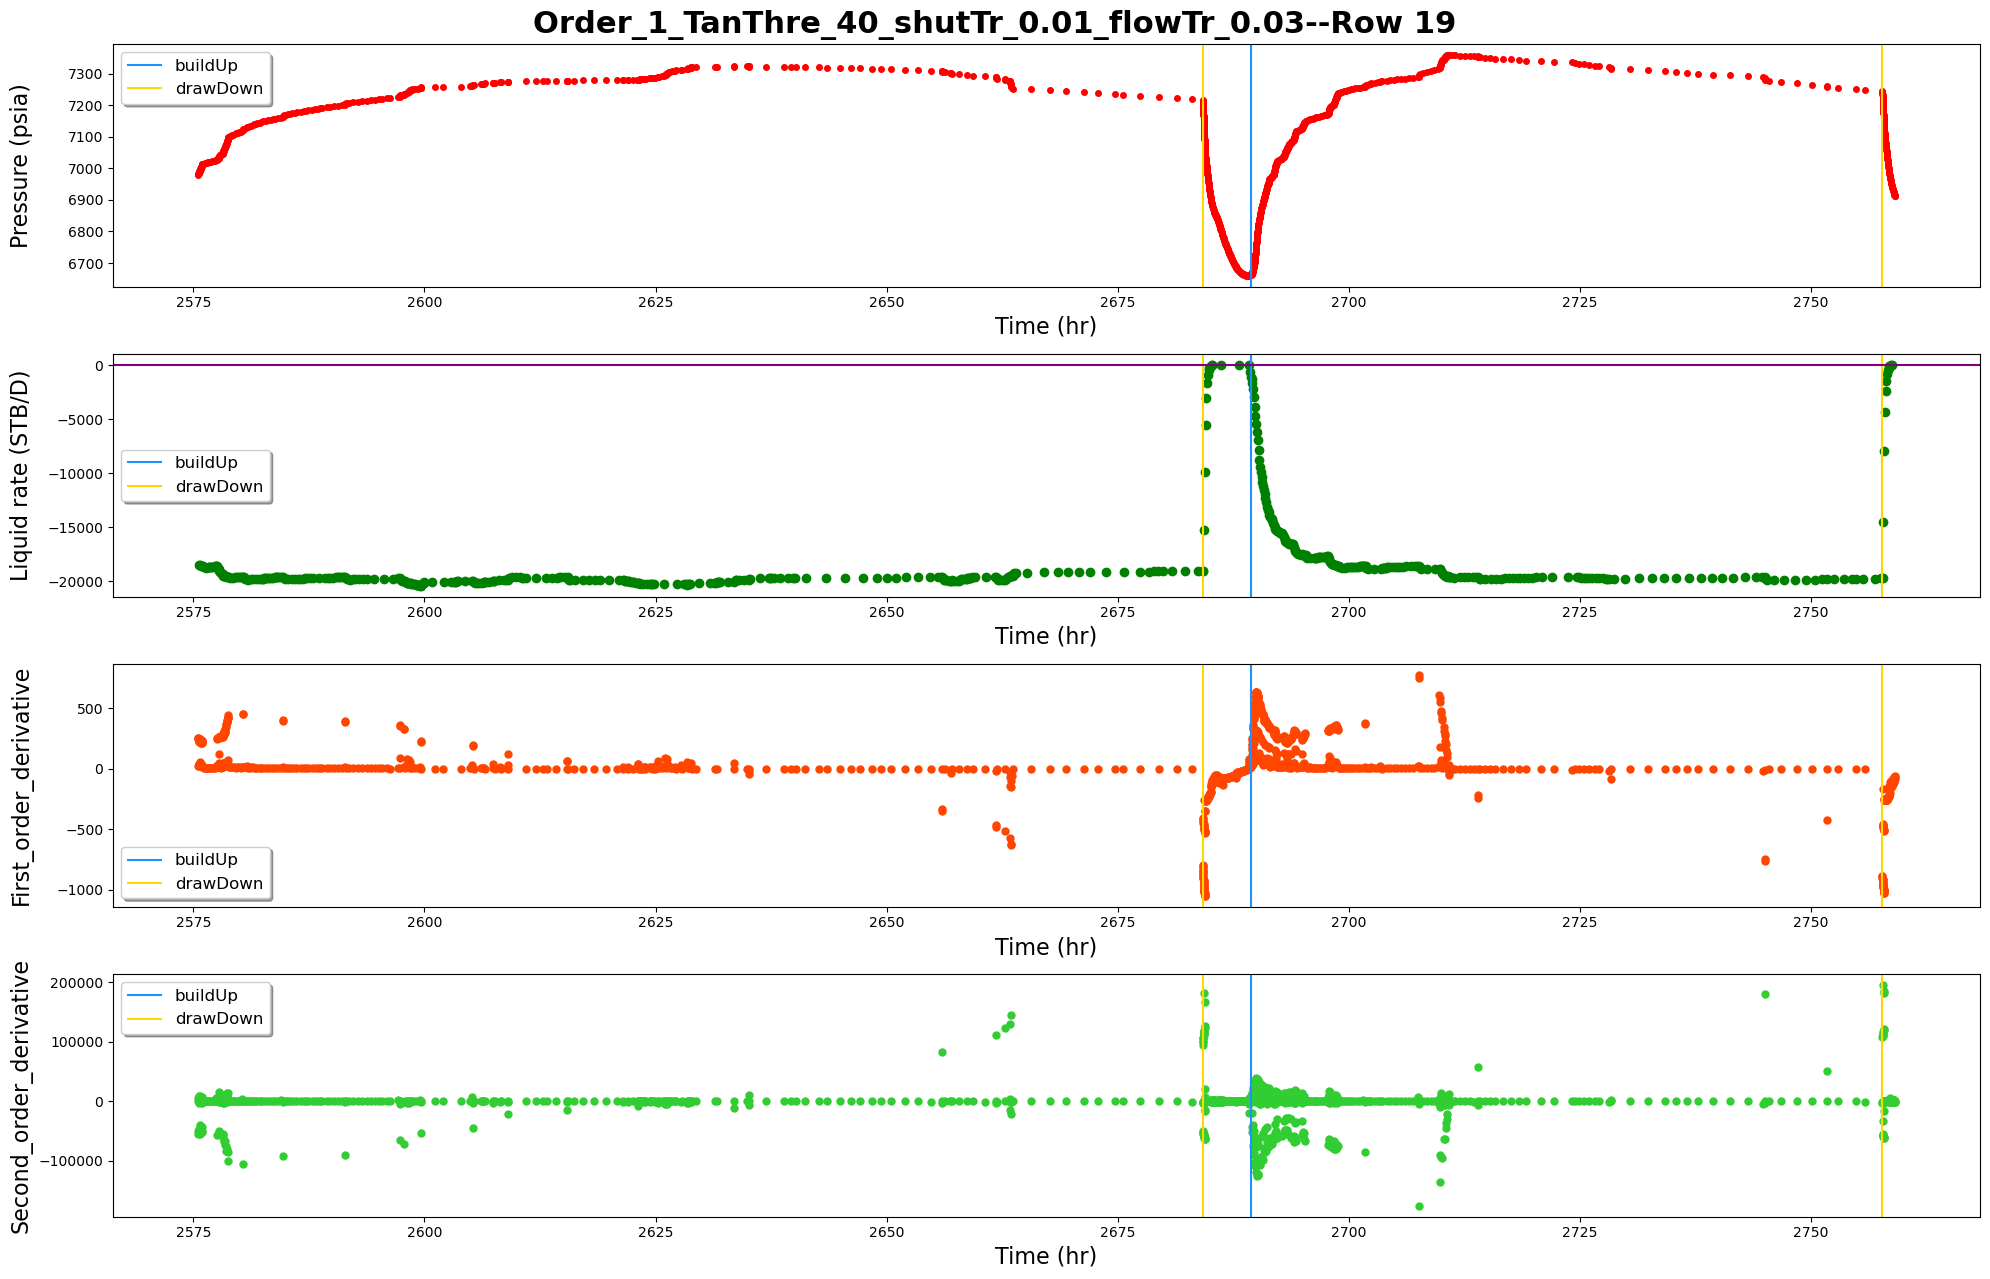

------row 20-----detected points:[23231]


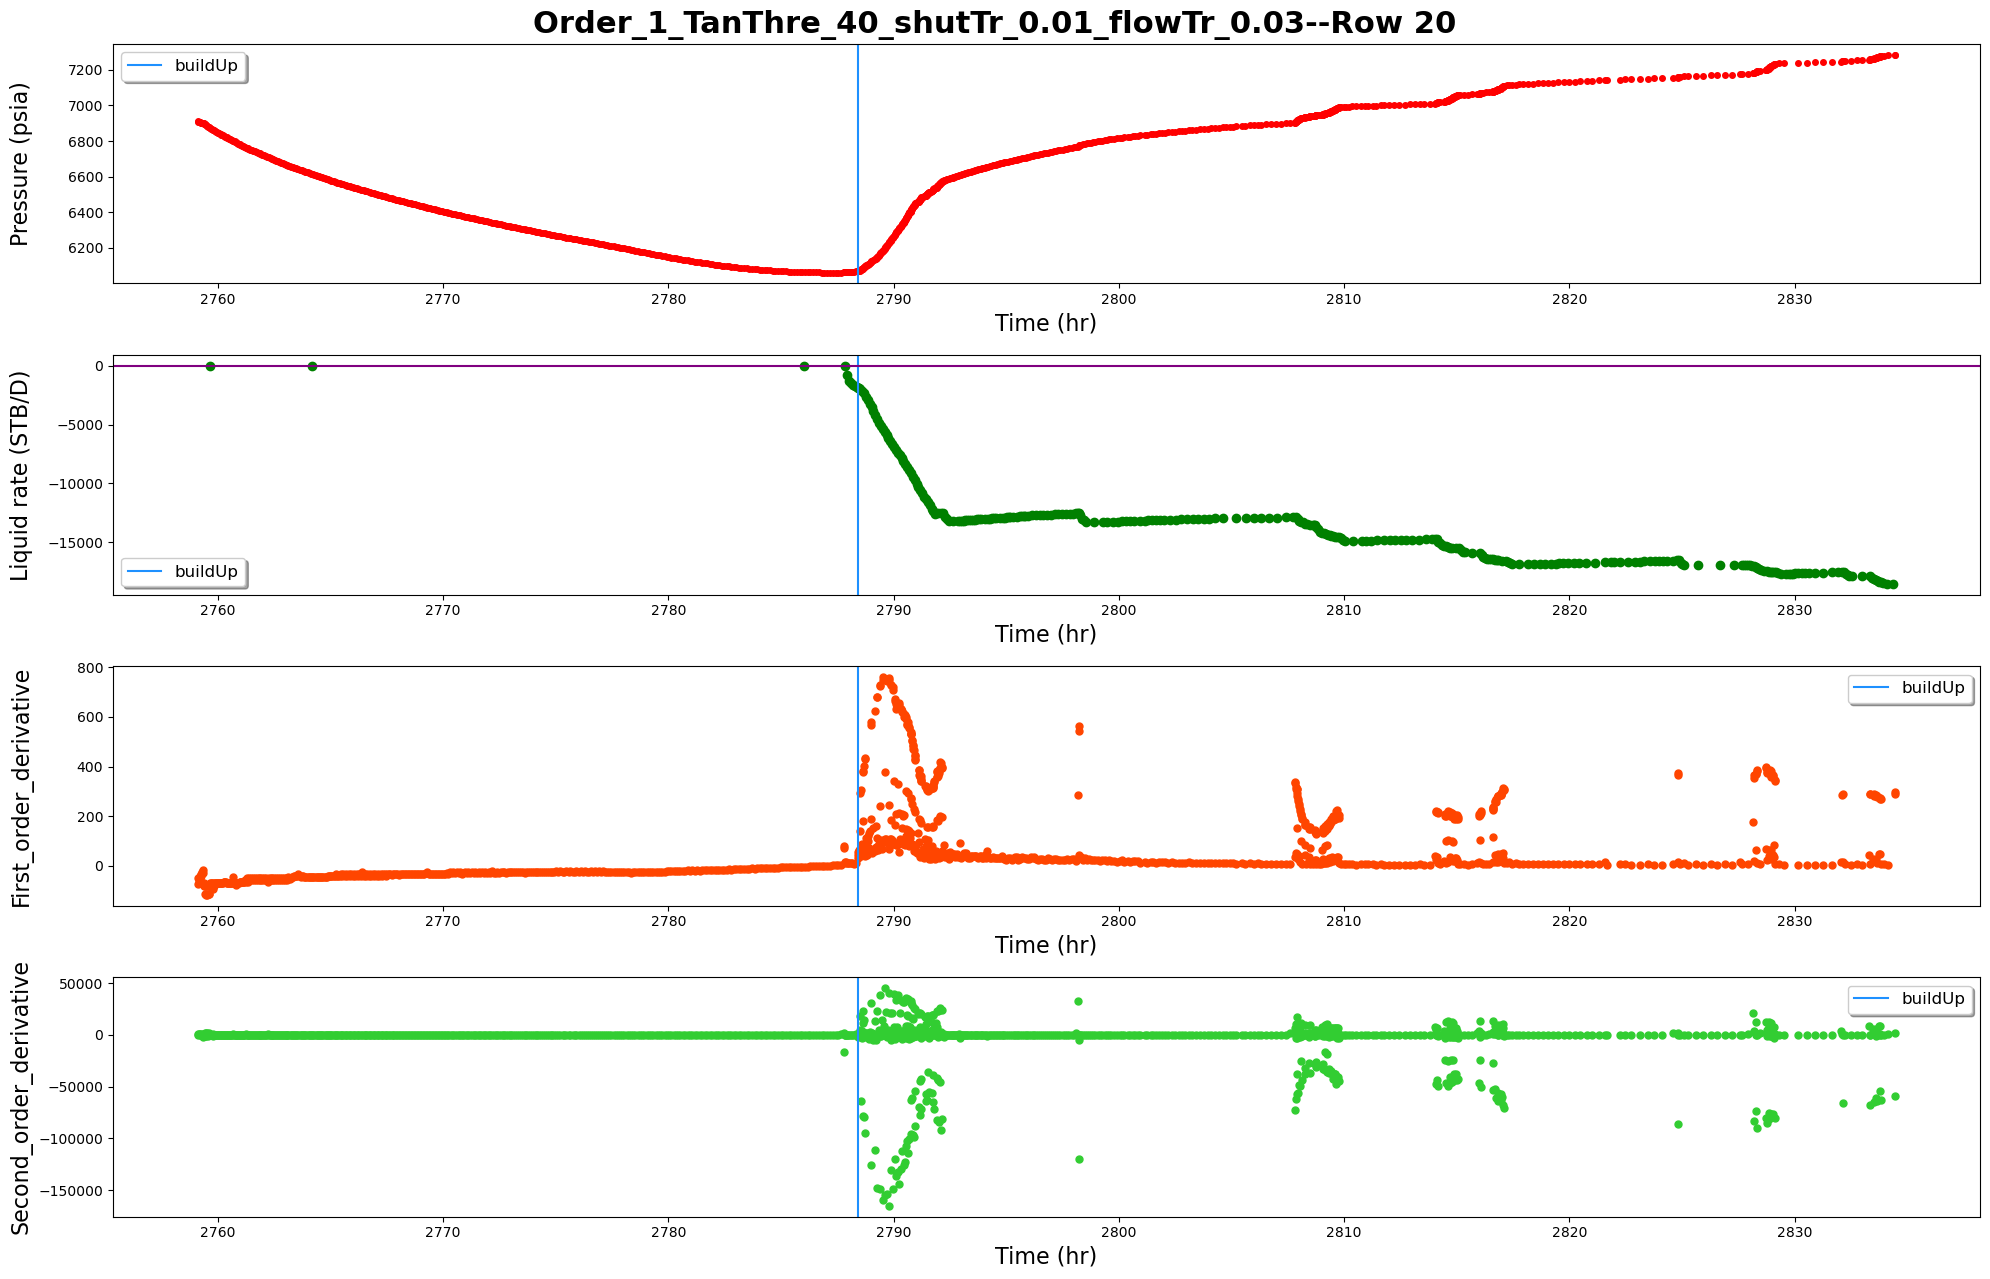

------row 21-----detected points:[24215, 24679, 24833, 24872]


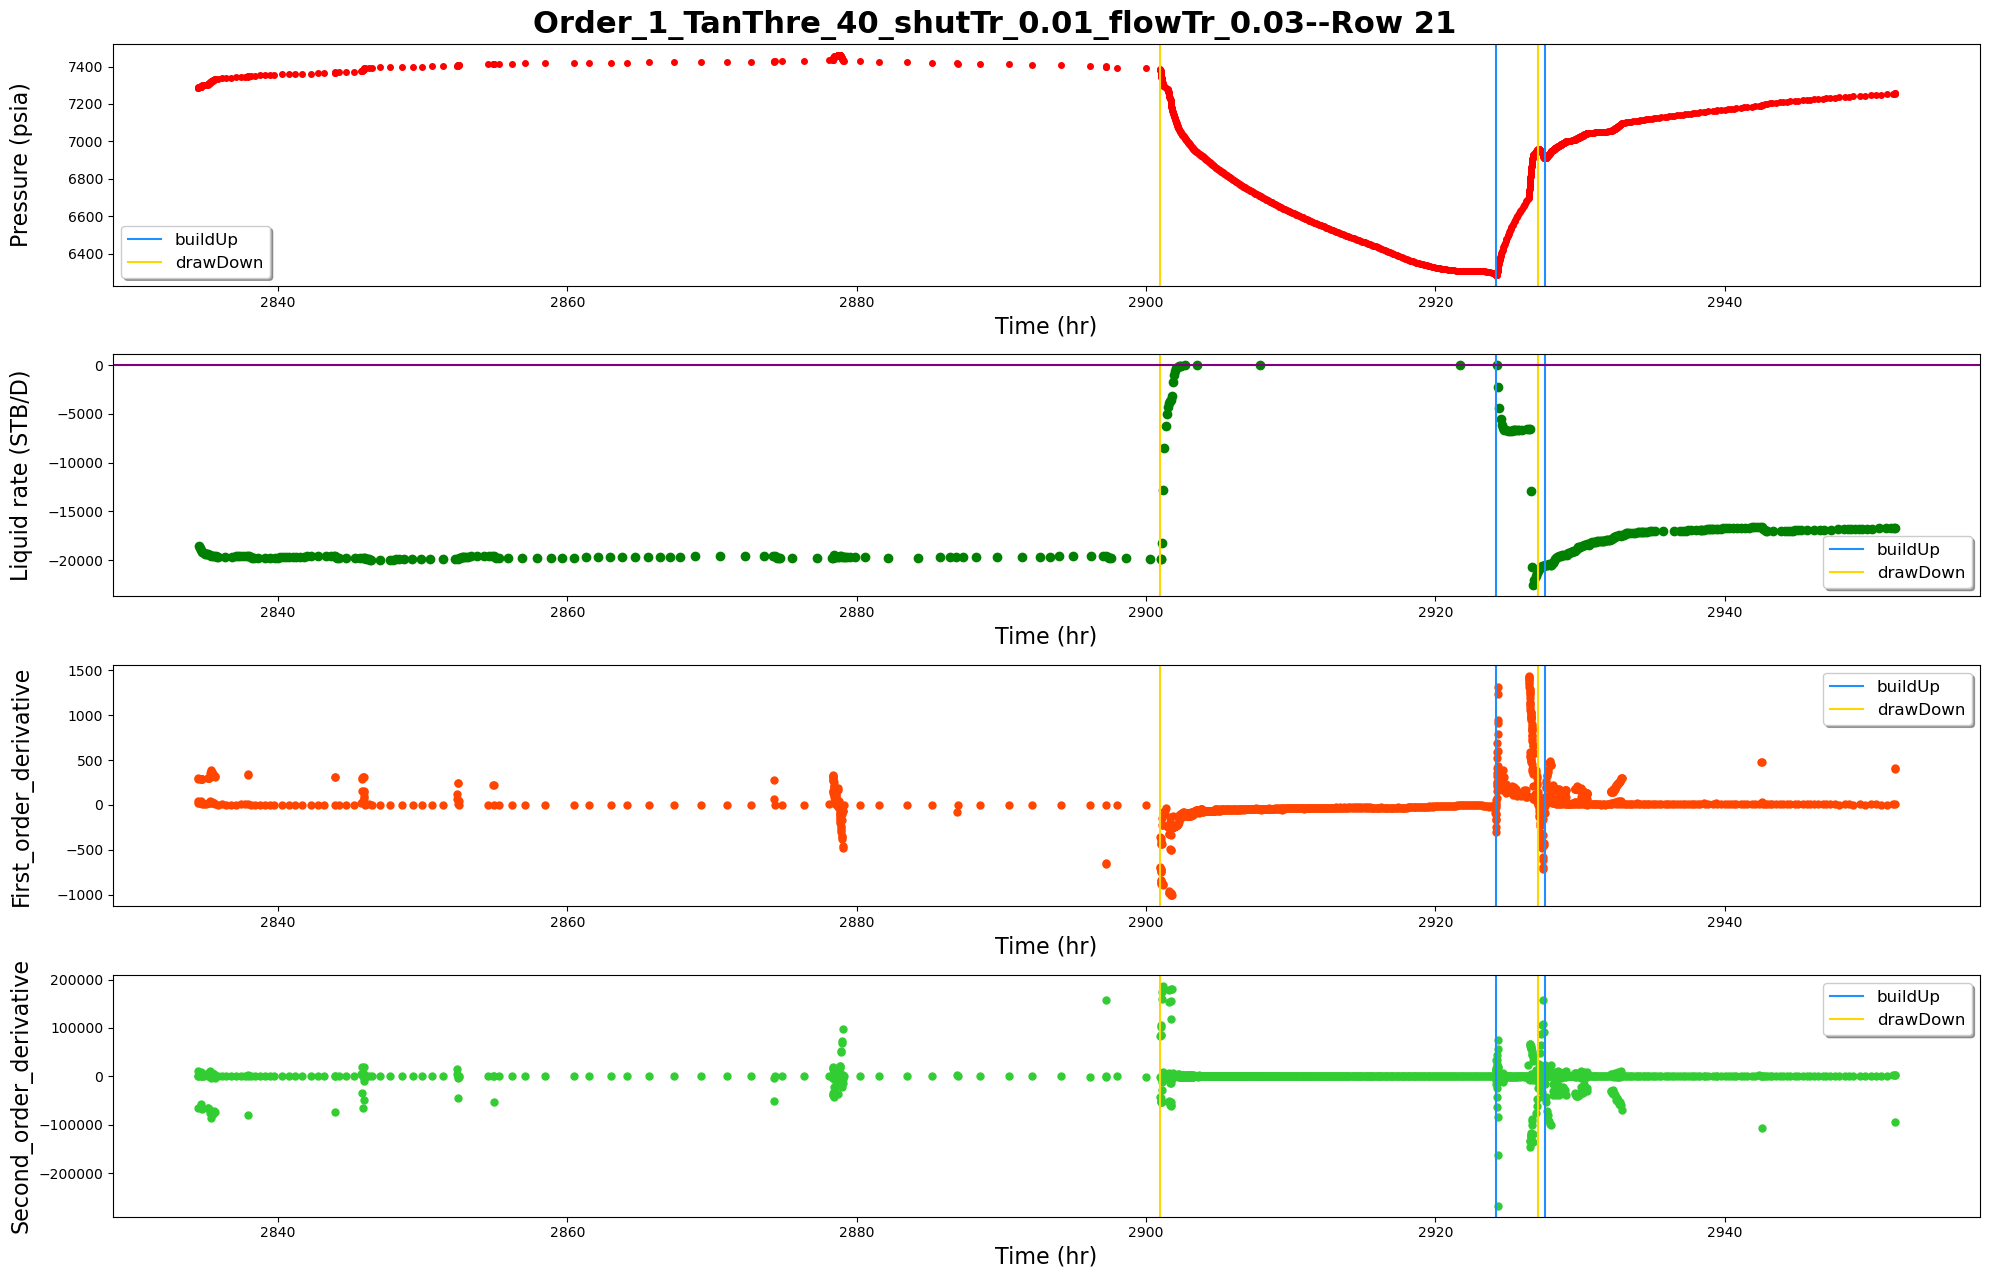

------row 22-----detected points:[25894, 26003]


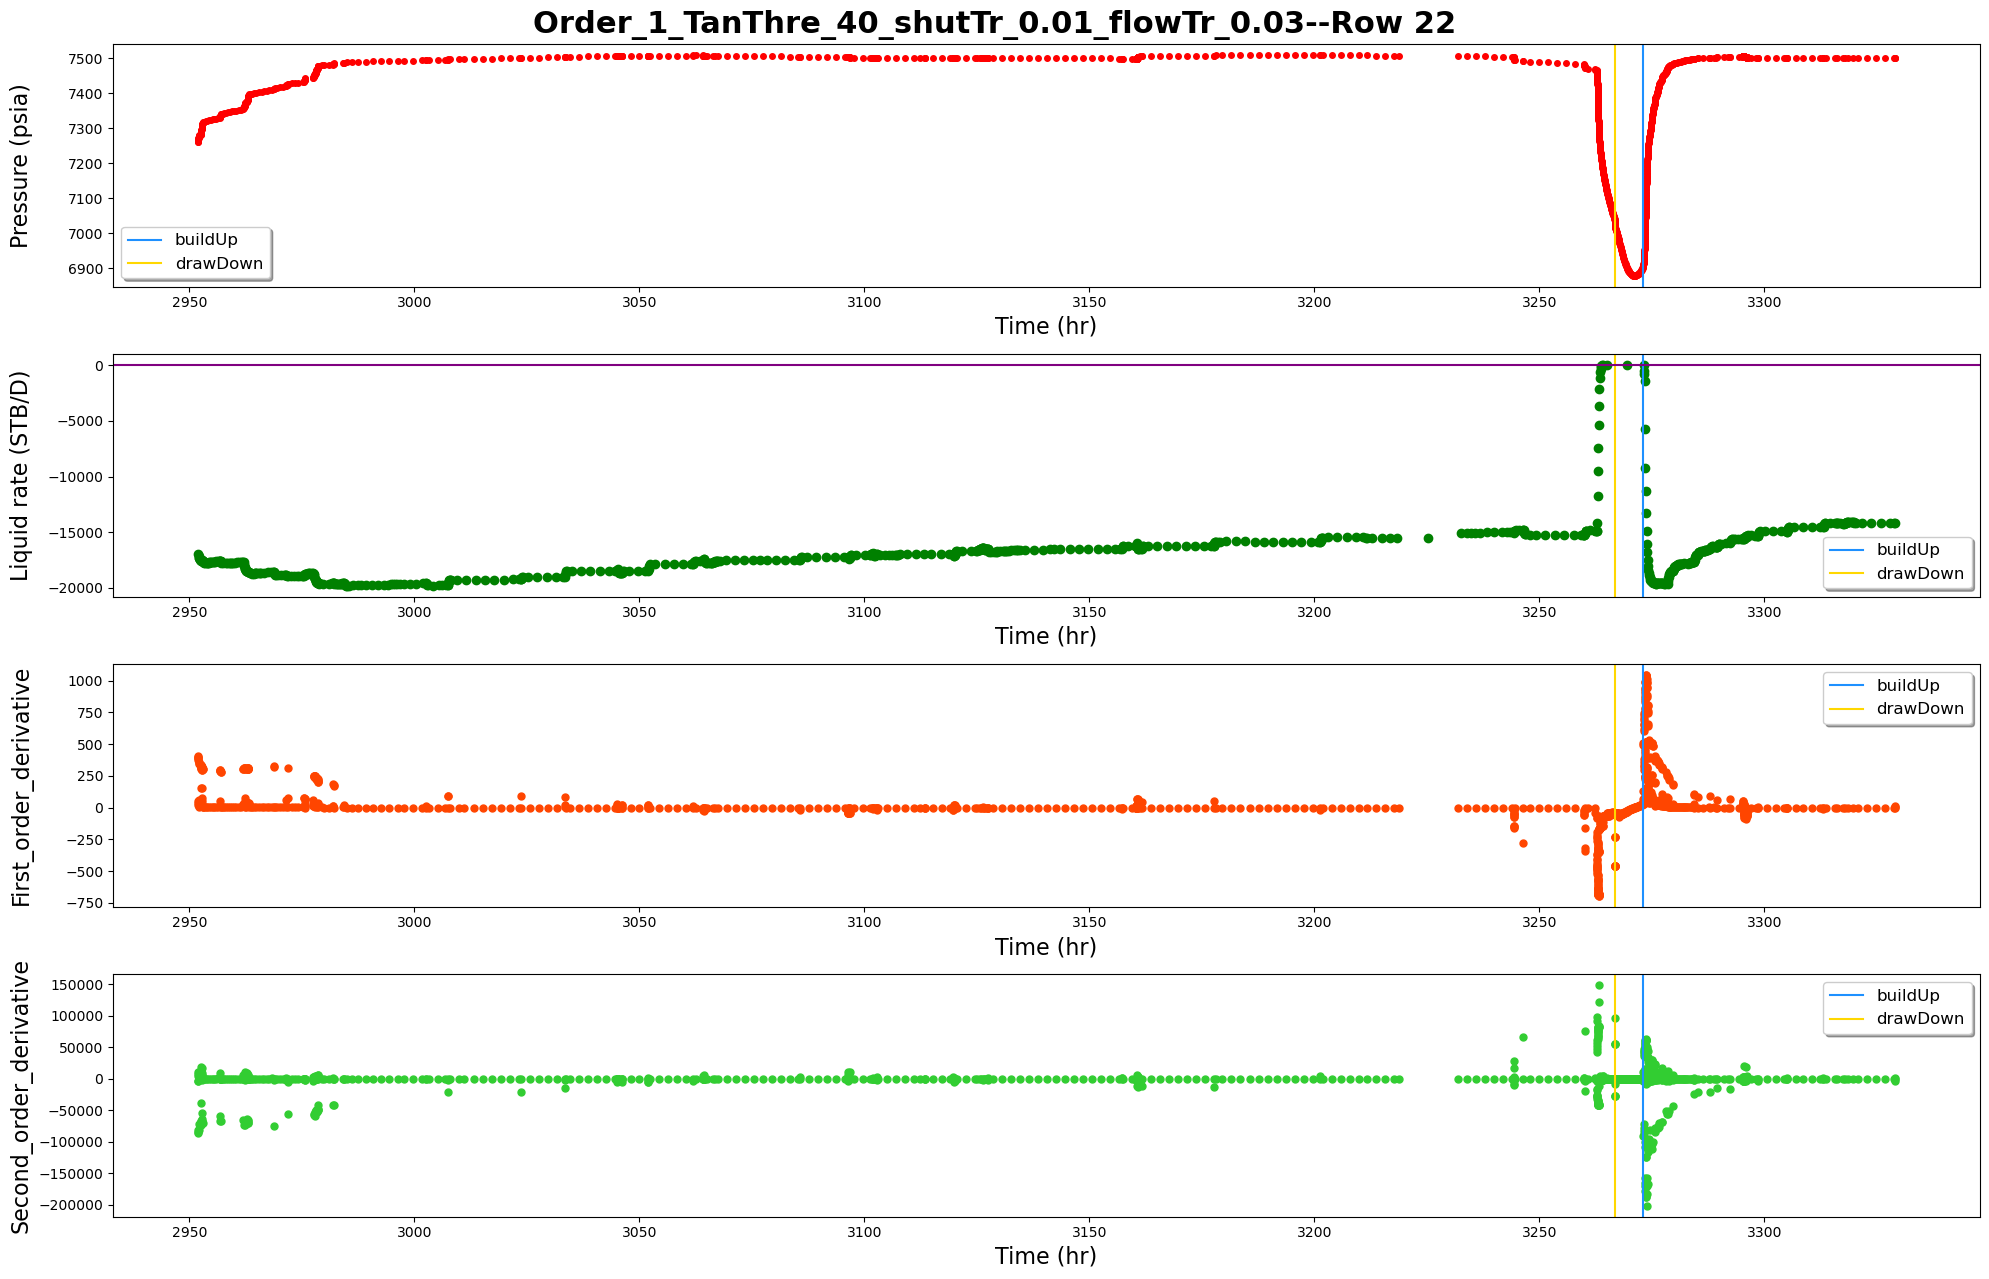

------row 23-----detected points:[26711, 26779, 27025, 27324]


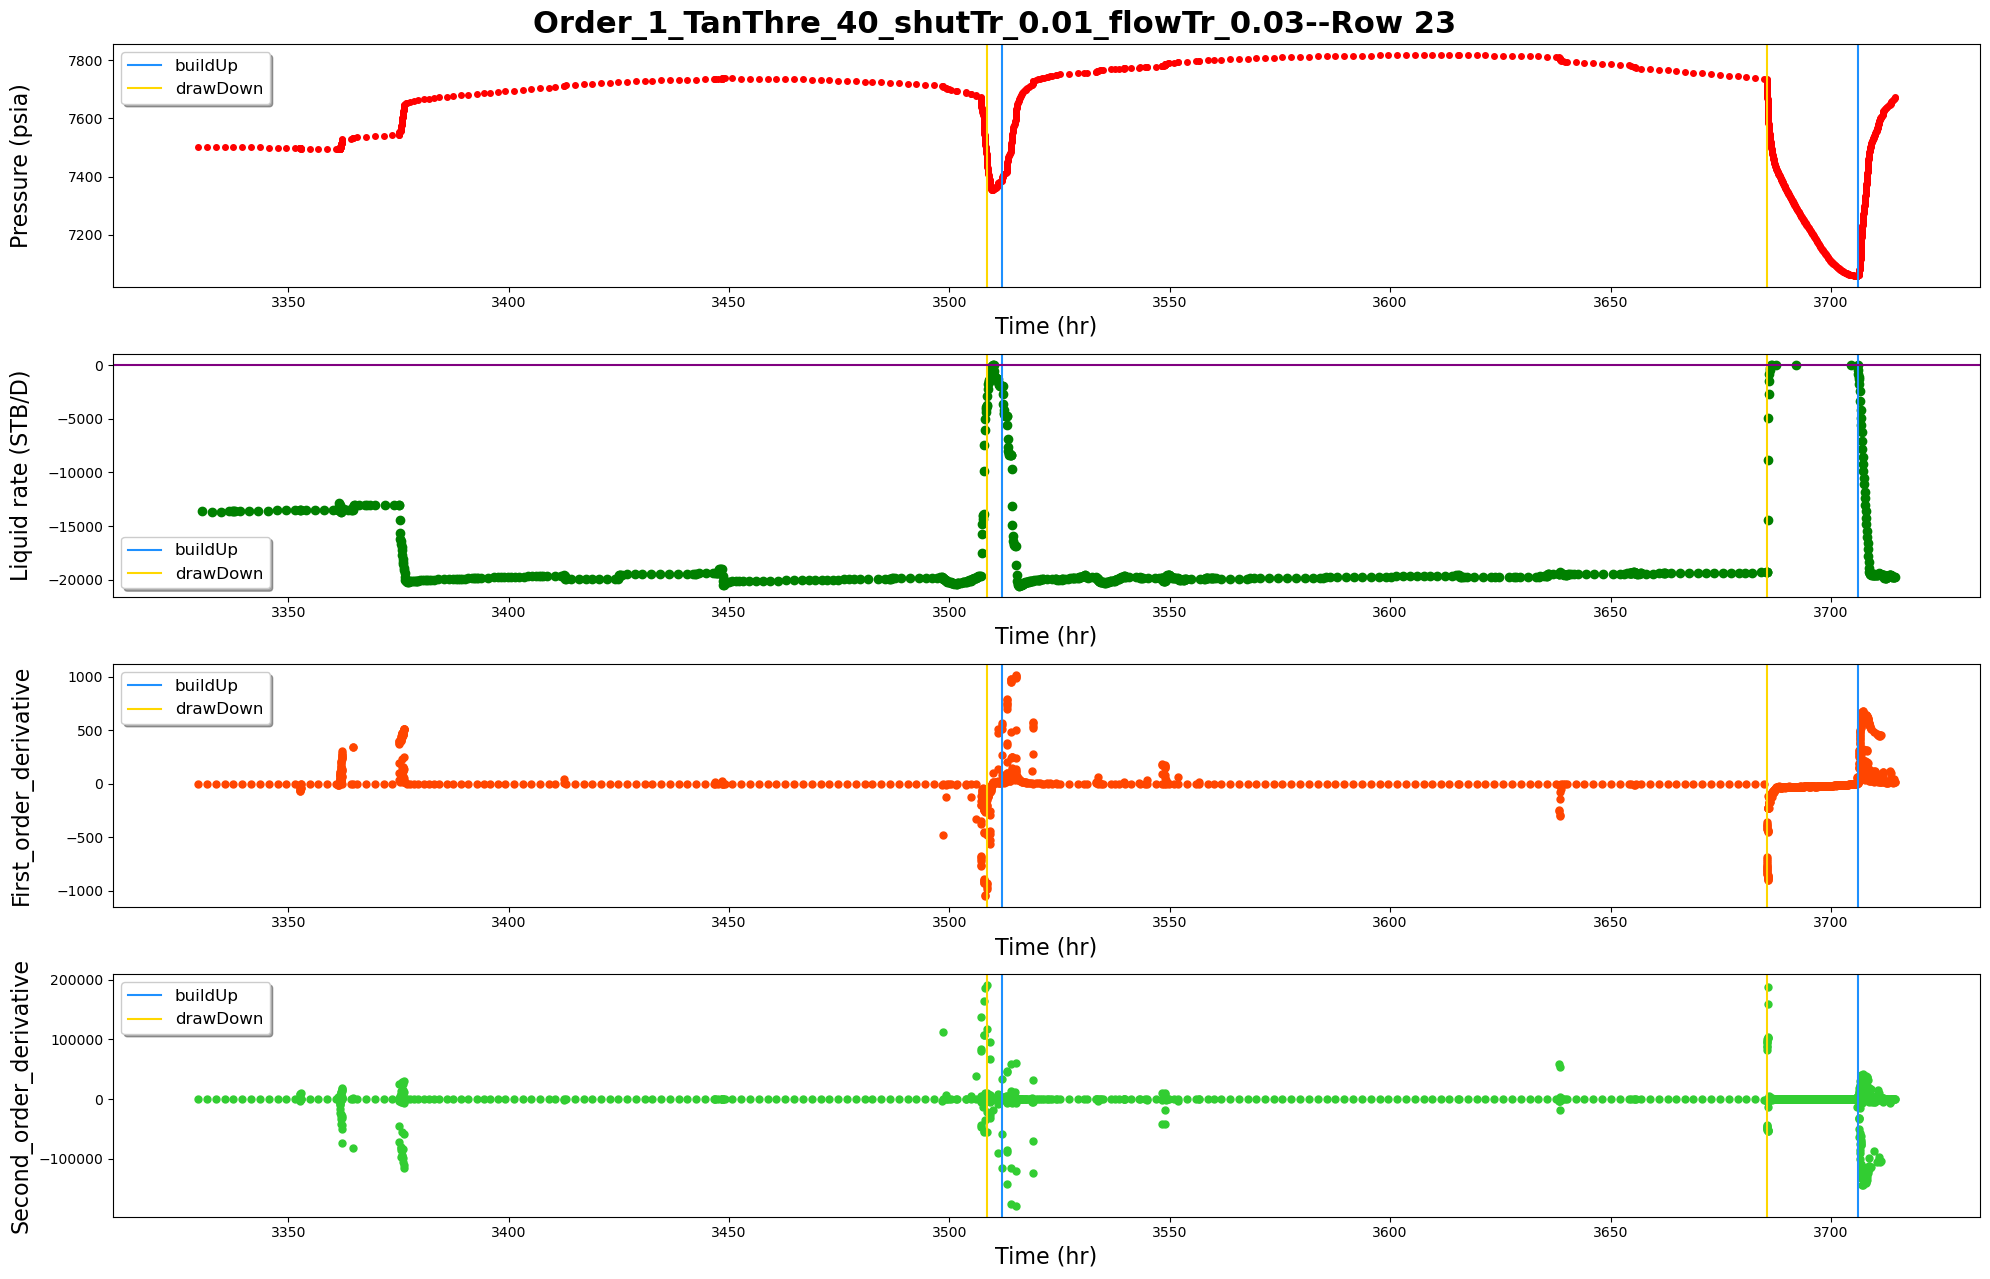

------row 24-----detected points:[27824, 27969, 28290, 28493]


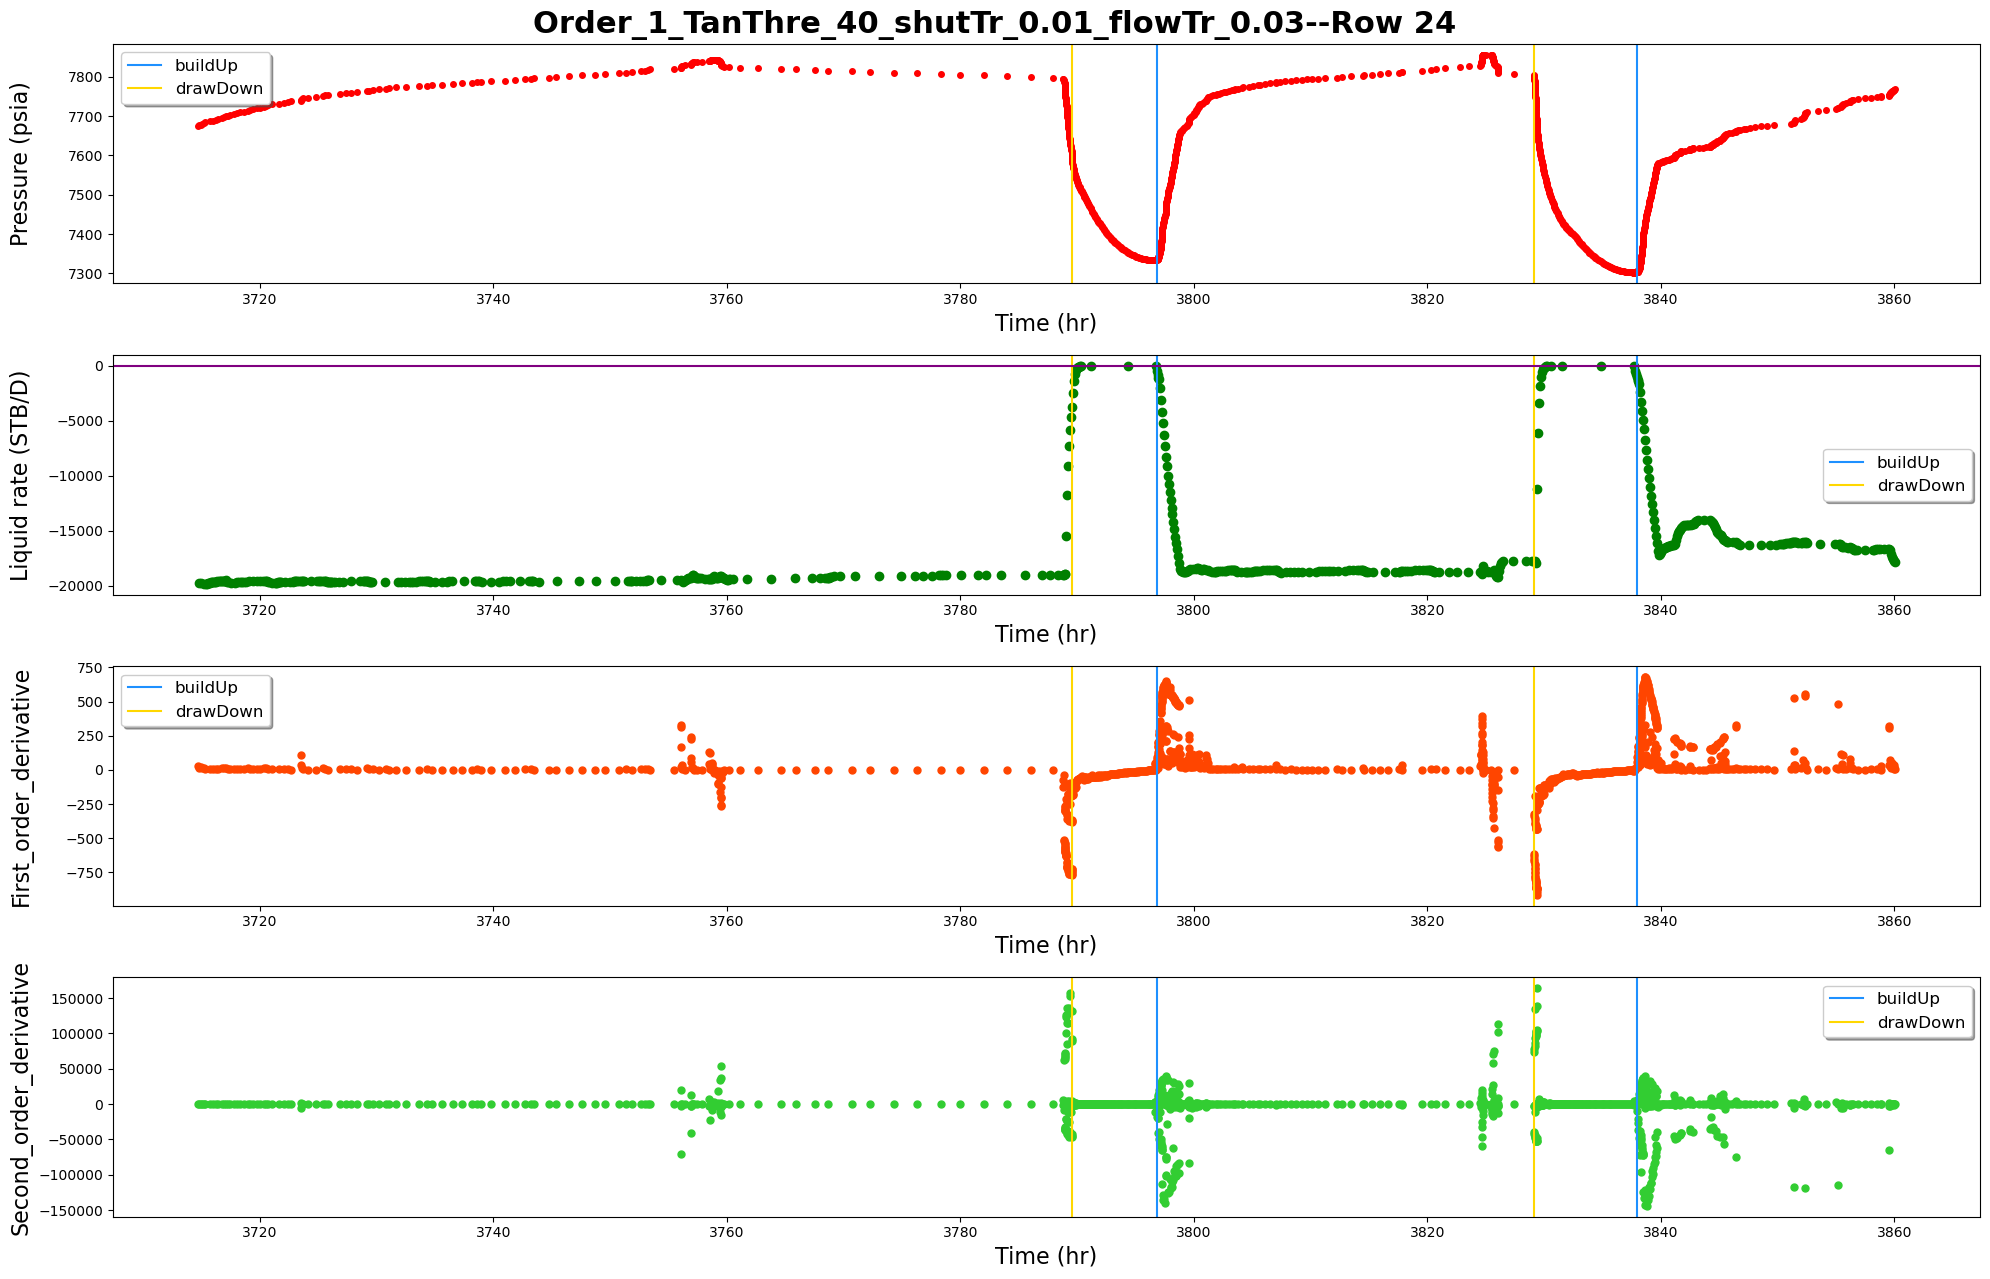

------row 25-----detected points:[28840, 29113]


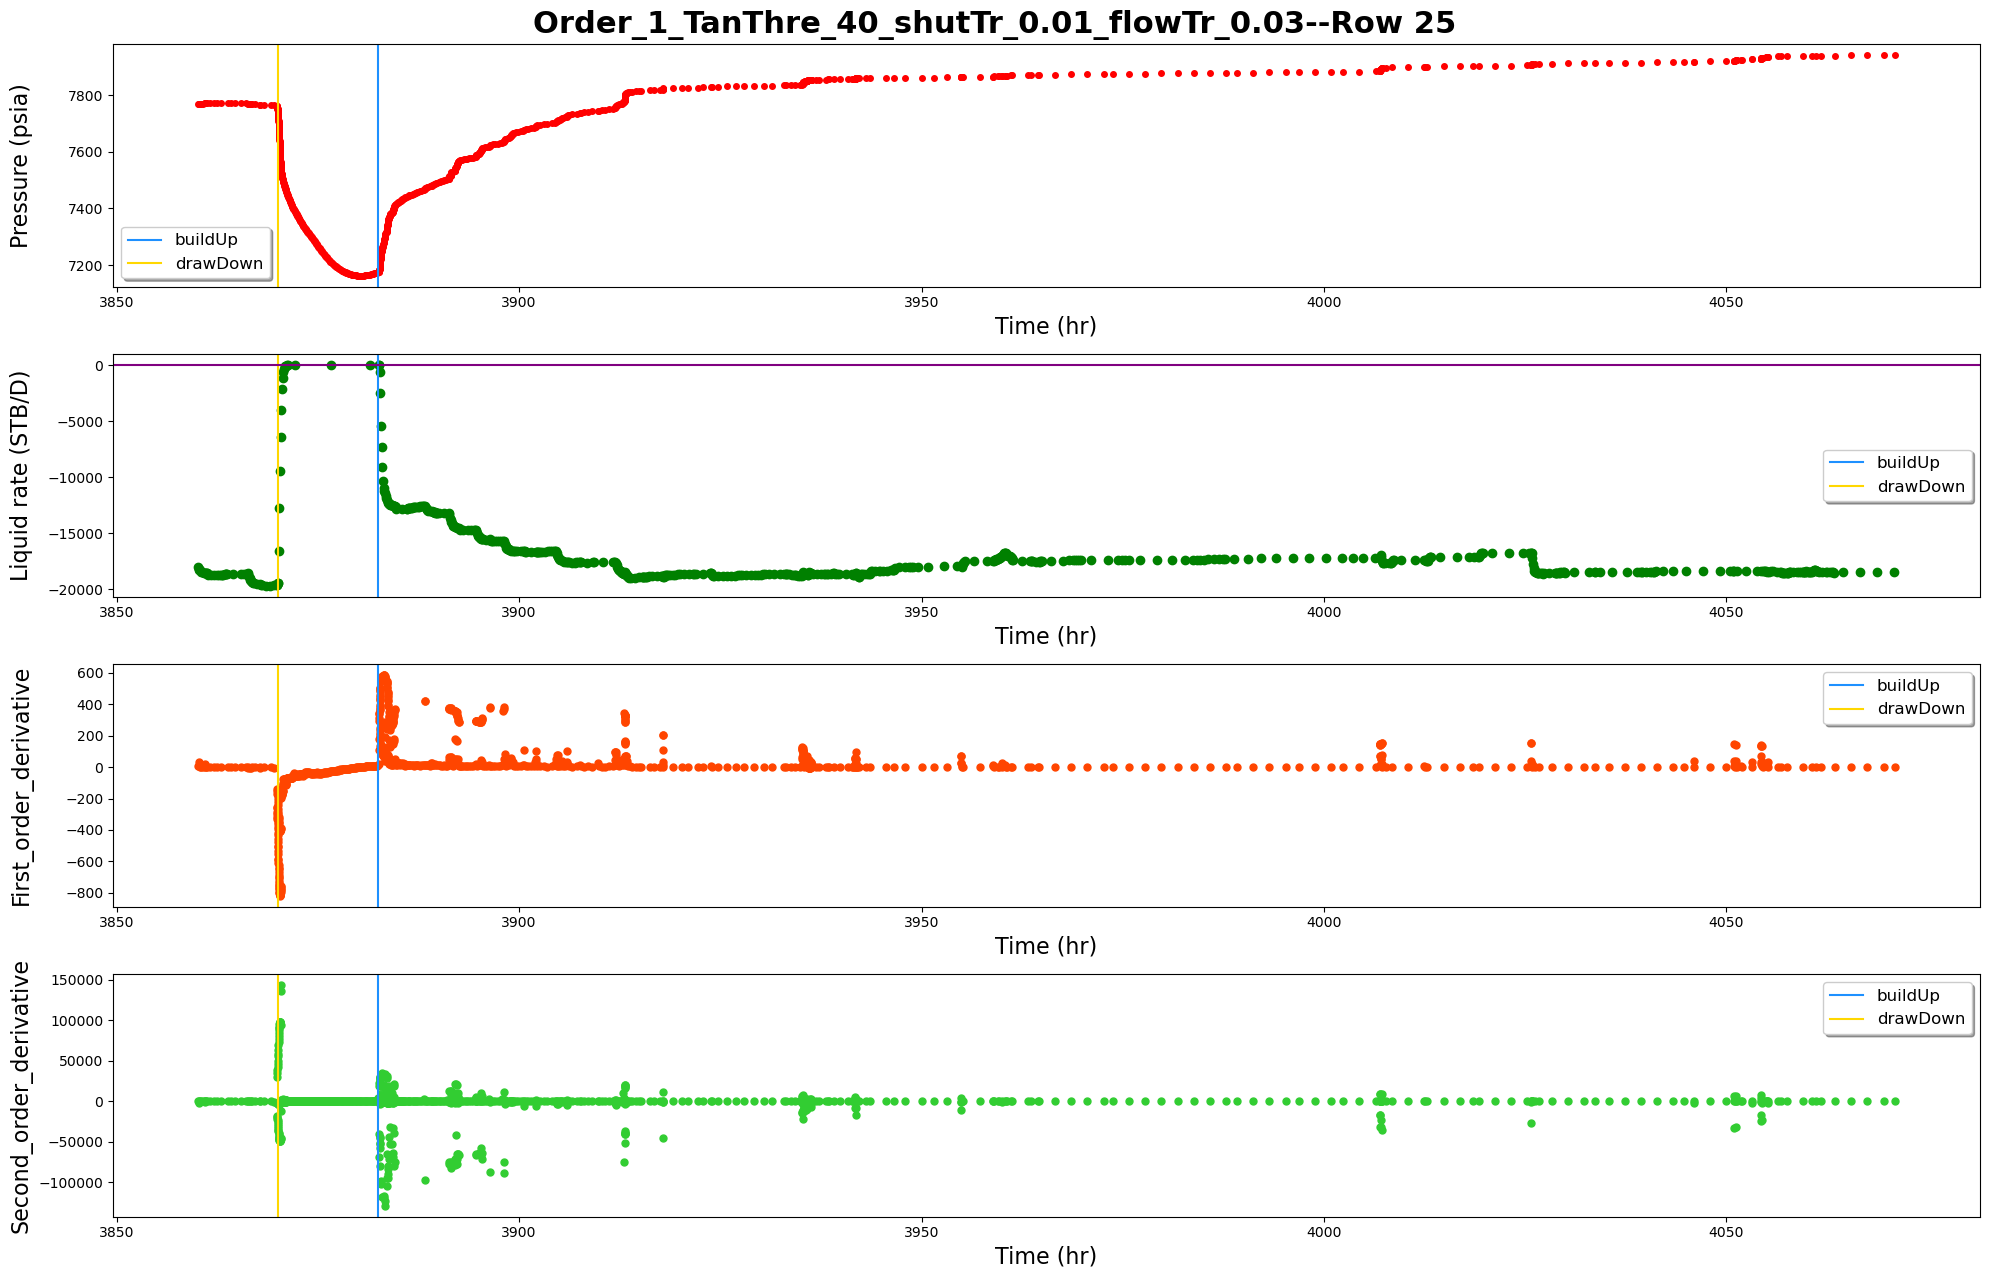

In [7]:
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=False
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

# plot periods & multi rate break points

'buildup:118, drawdown:32'
---initializing...
---plotting...


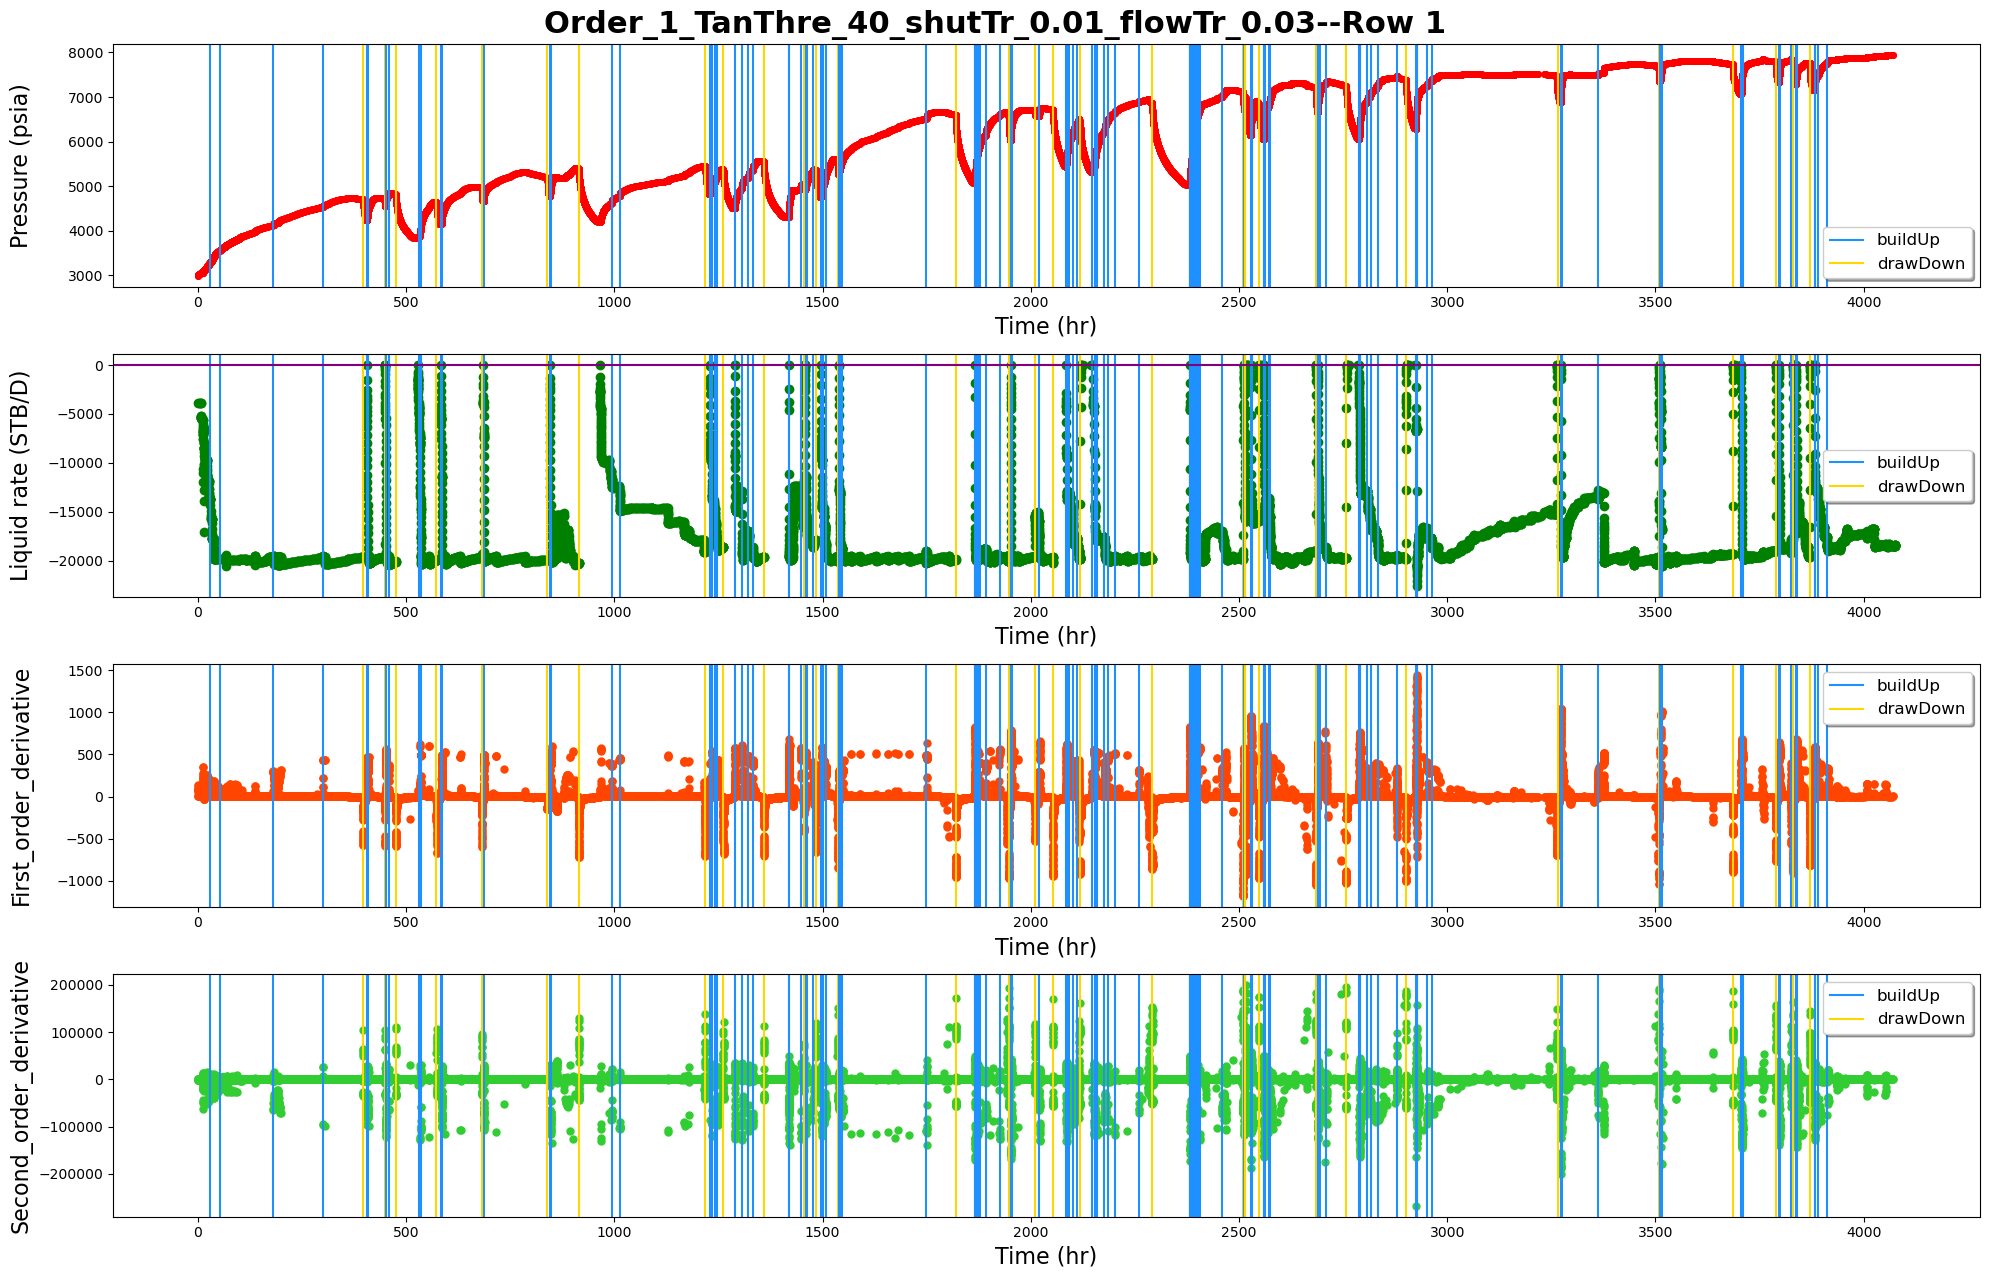

detected 150 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[509, 1034]


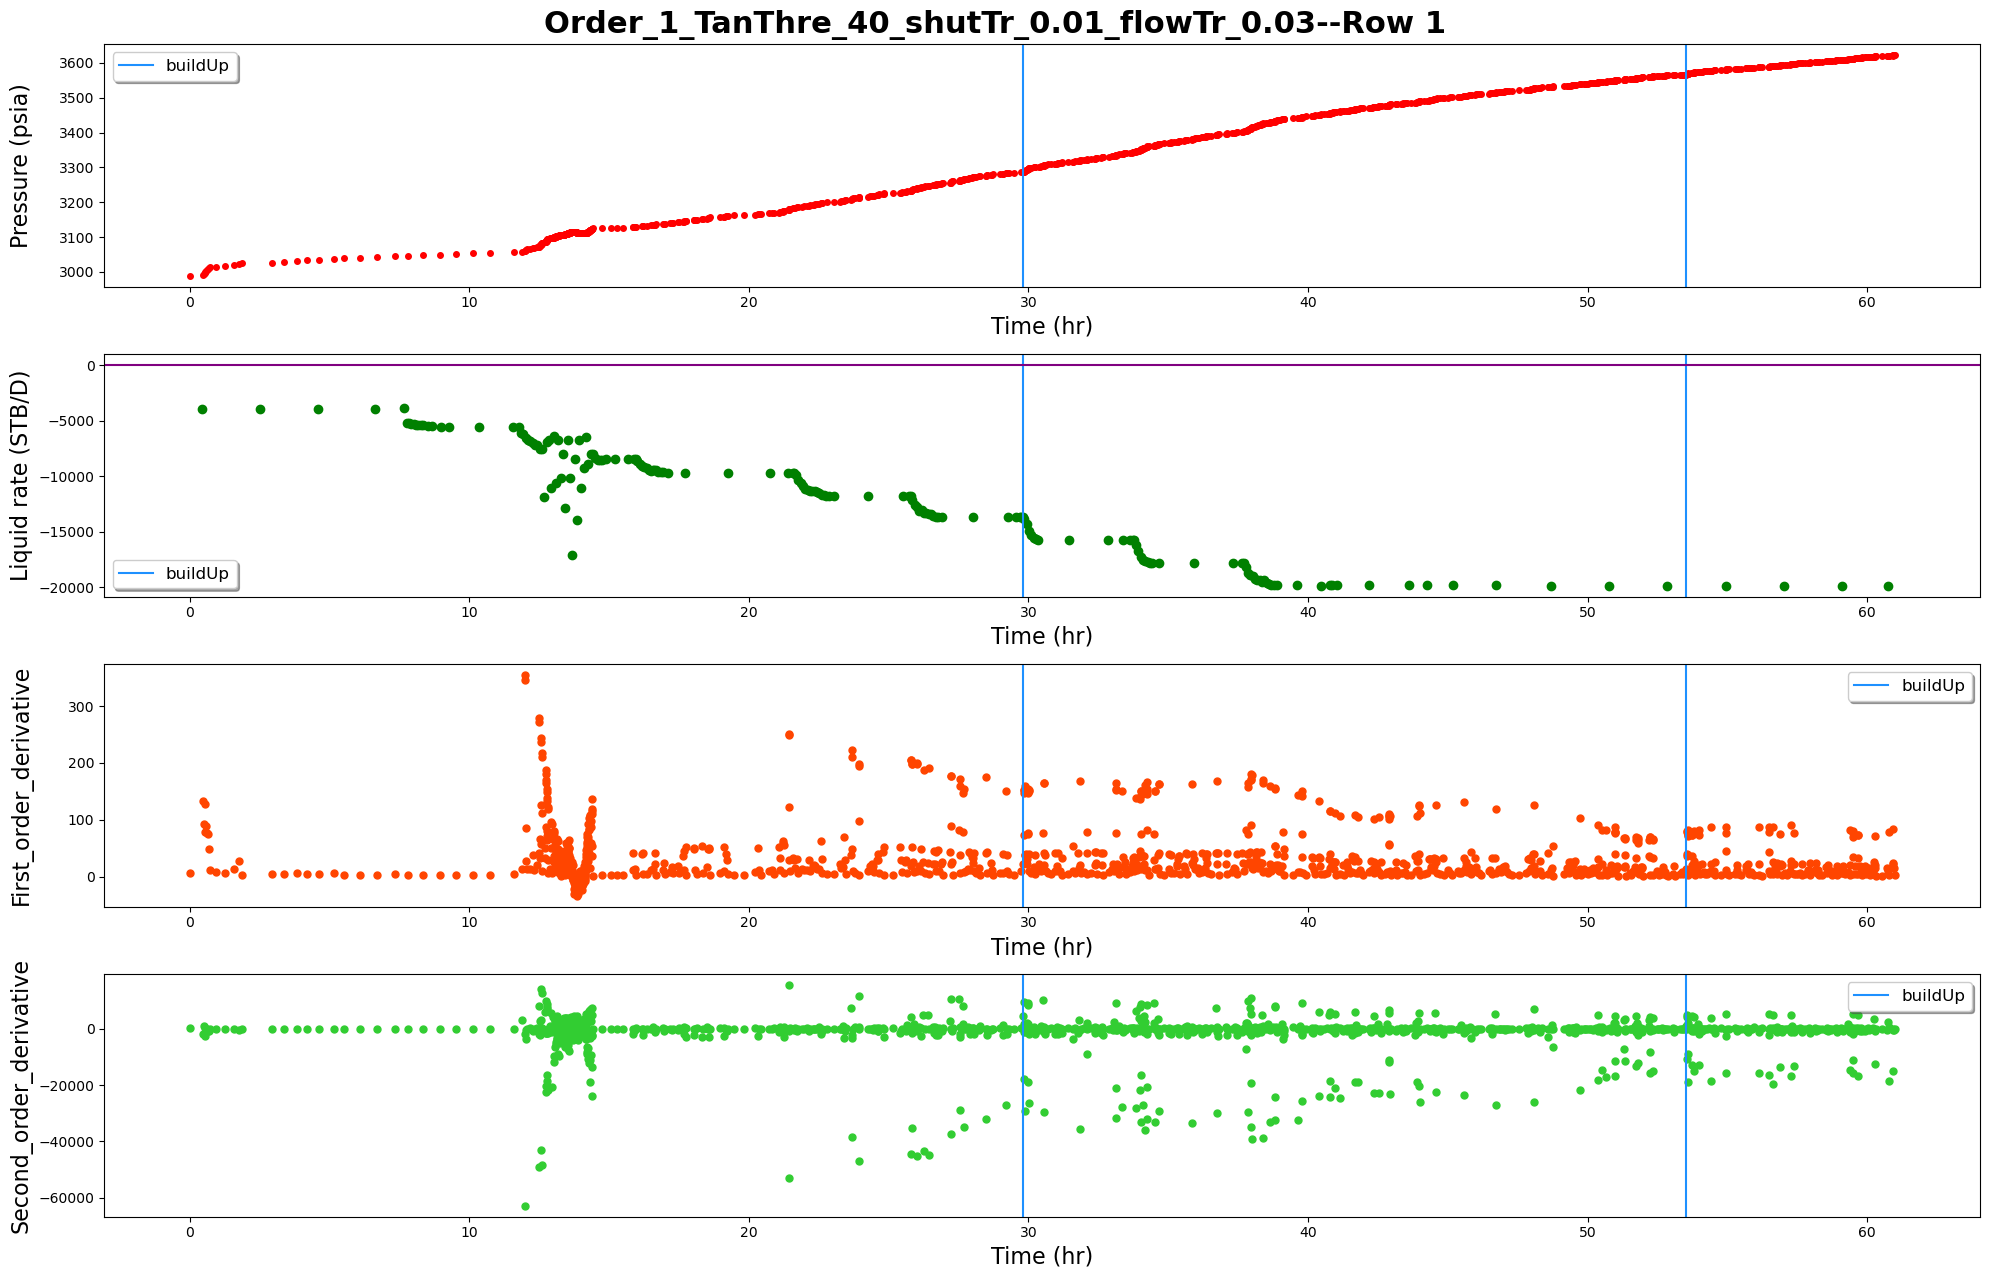

------row 2-----detected points:[1811, 2111, 2248]


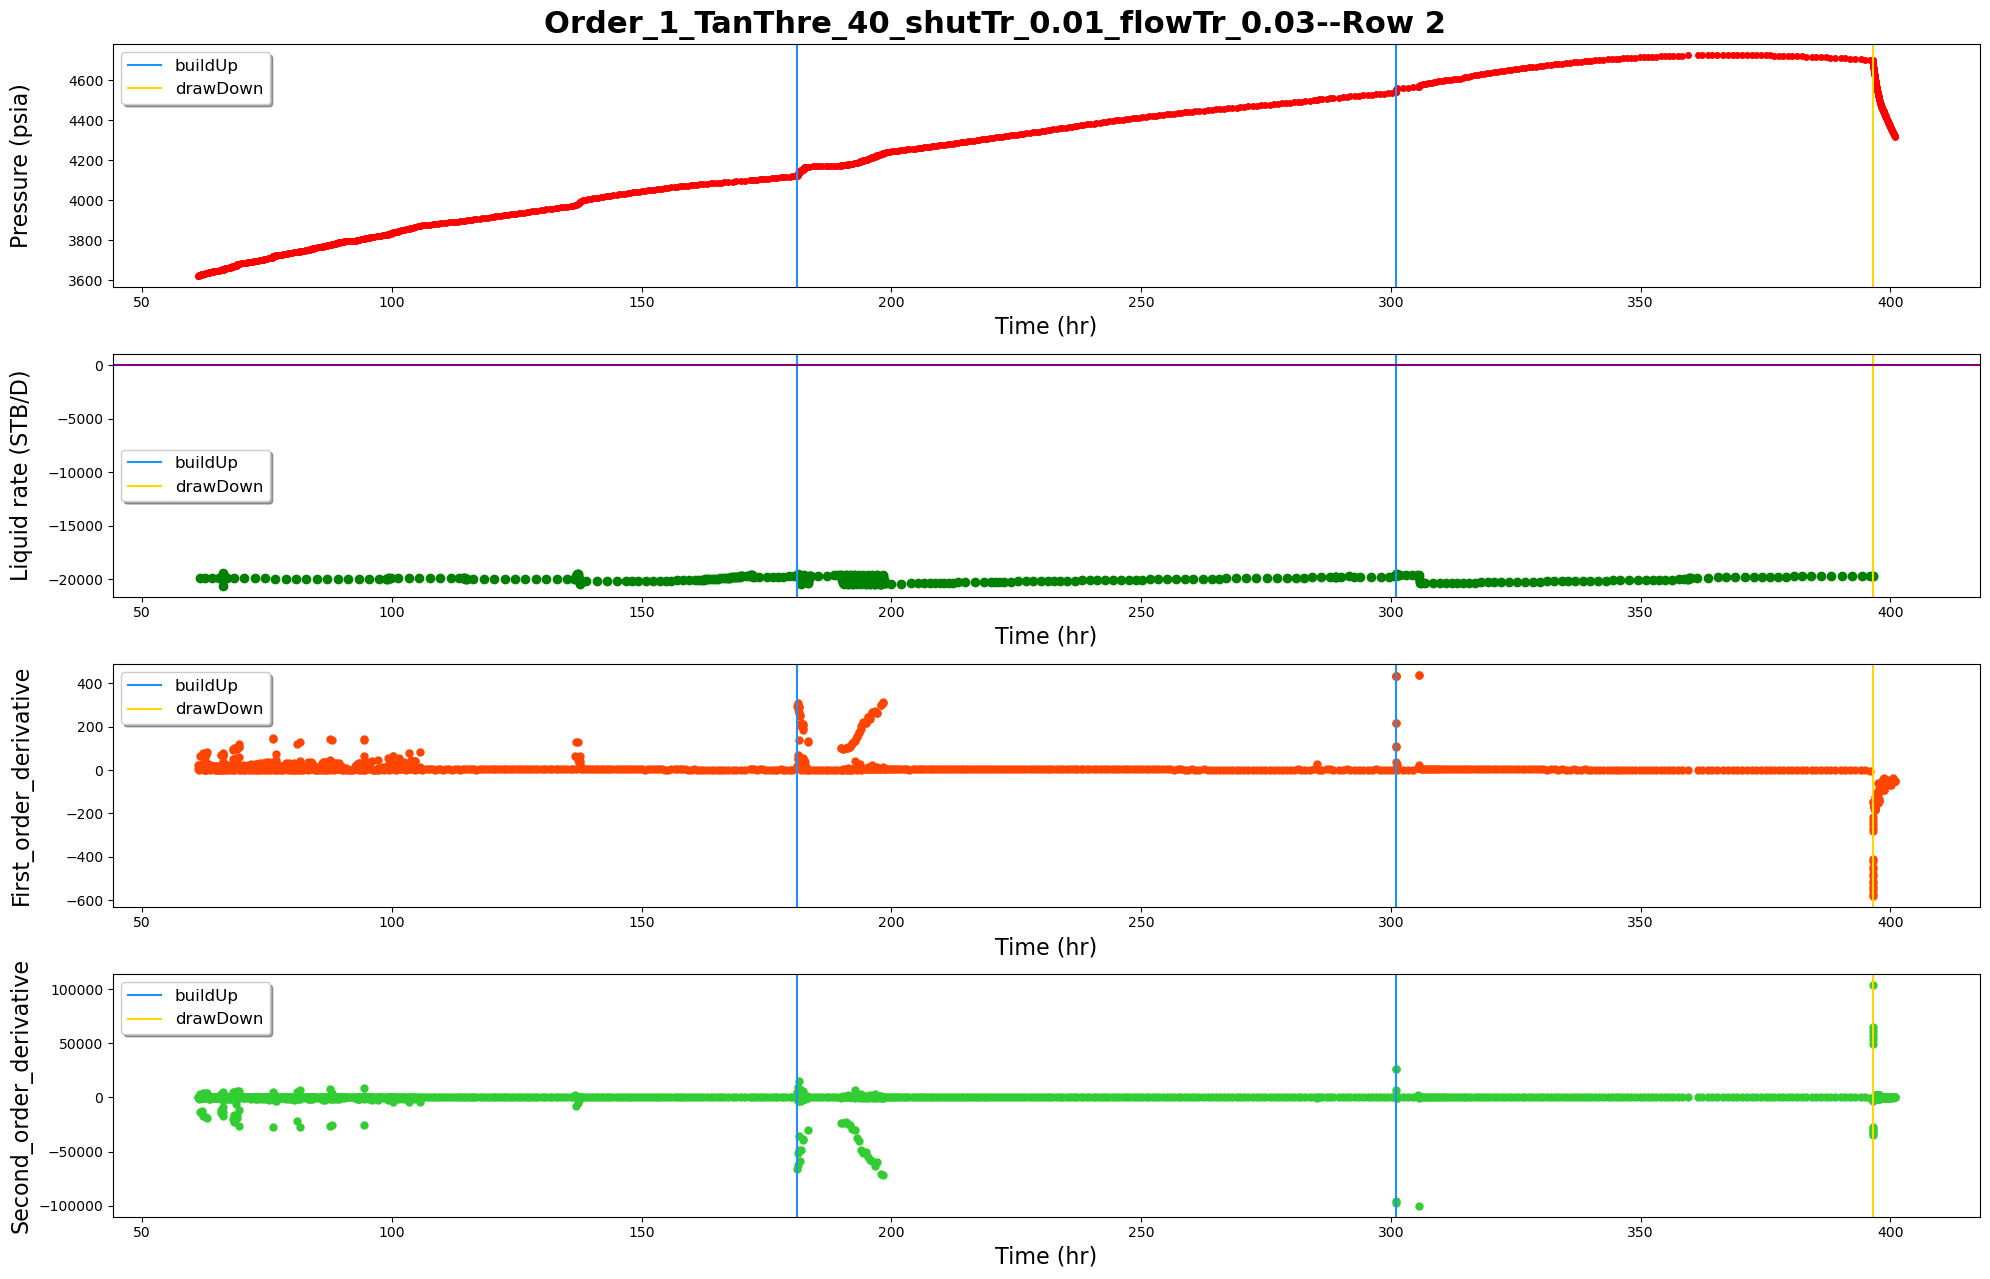

------row 3-----detected points:[2490, 2572, 2804, 2892, 3023, 3095, 3598]


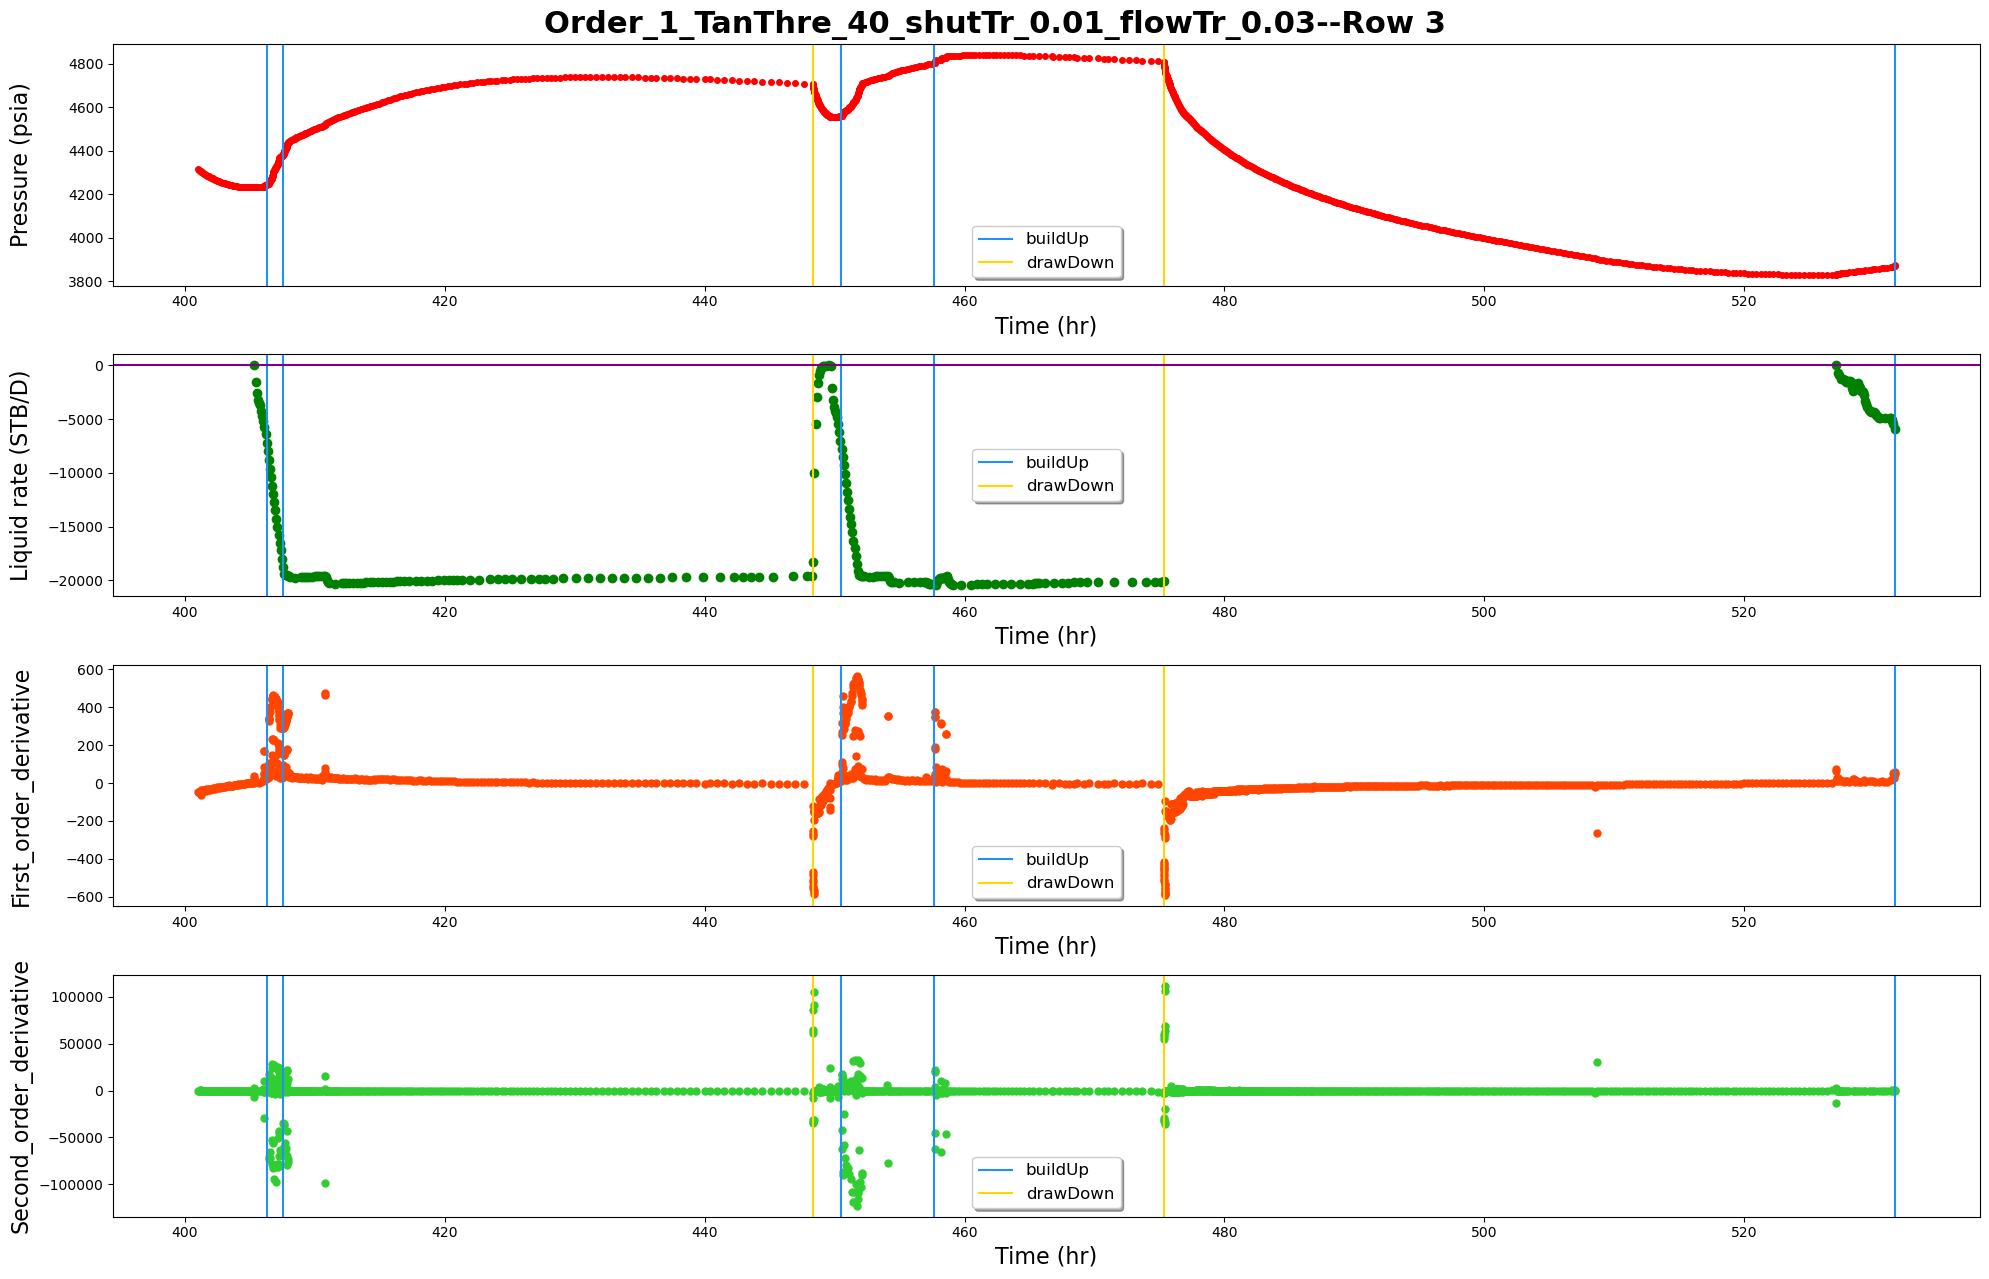

------row 4-----detected points:[3666, 3988, 4246, 4349, 4750]


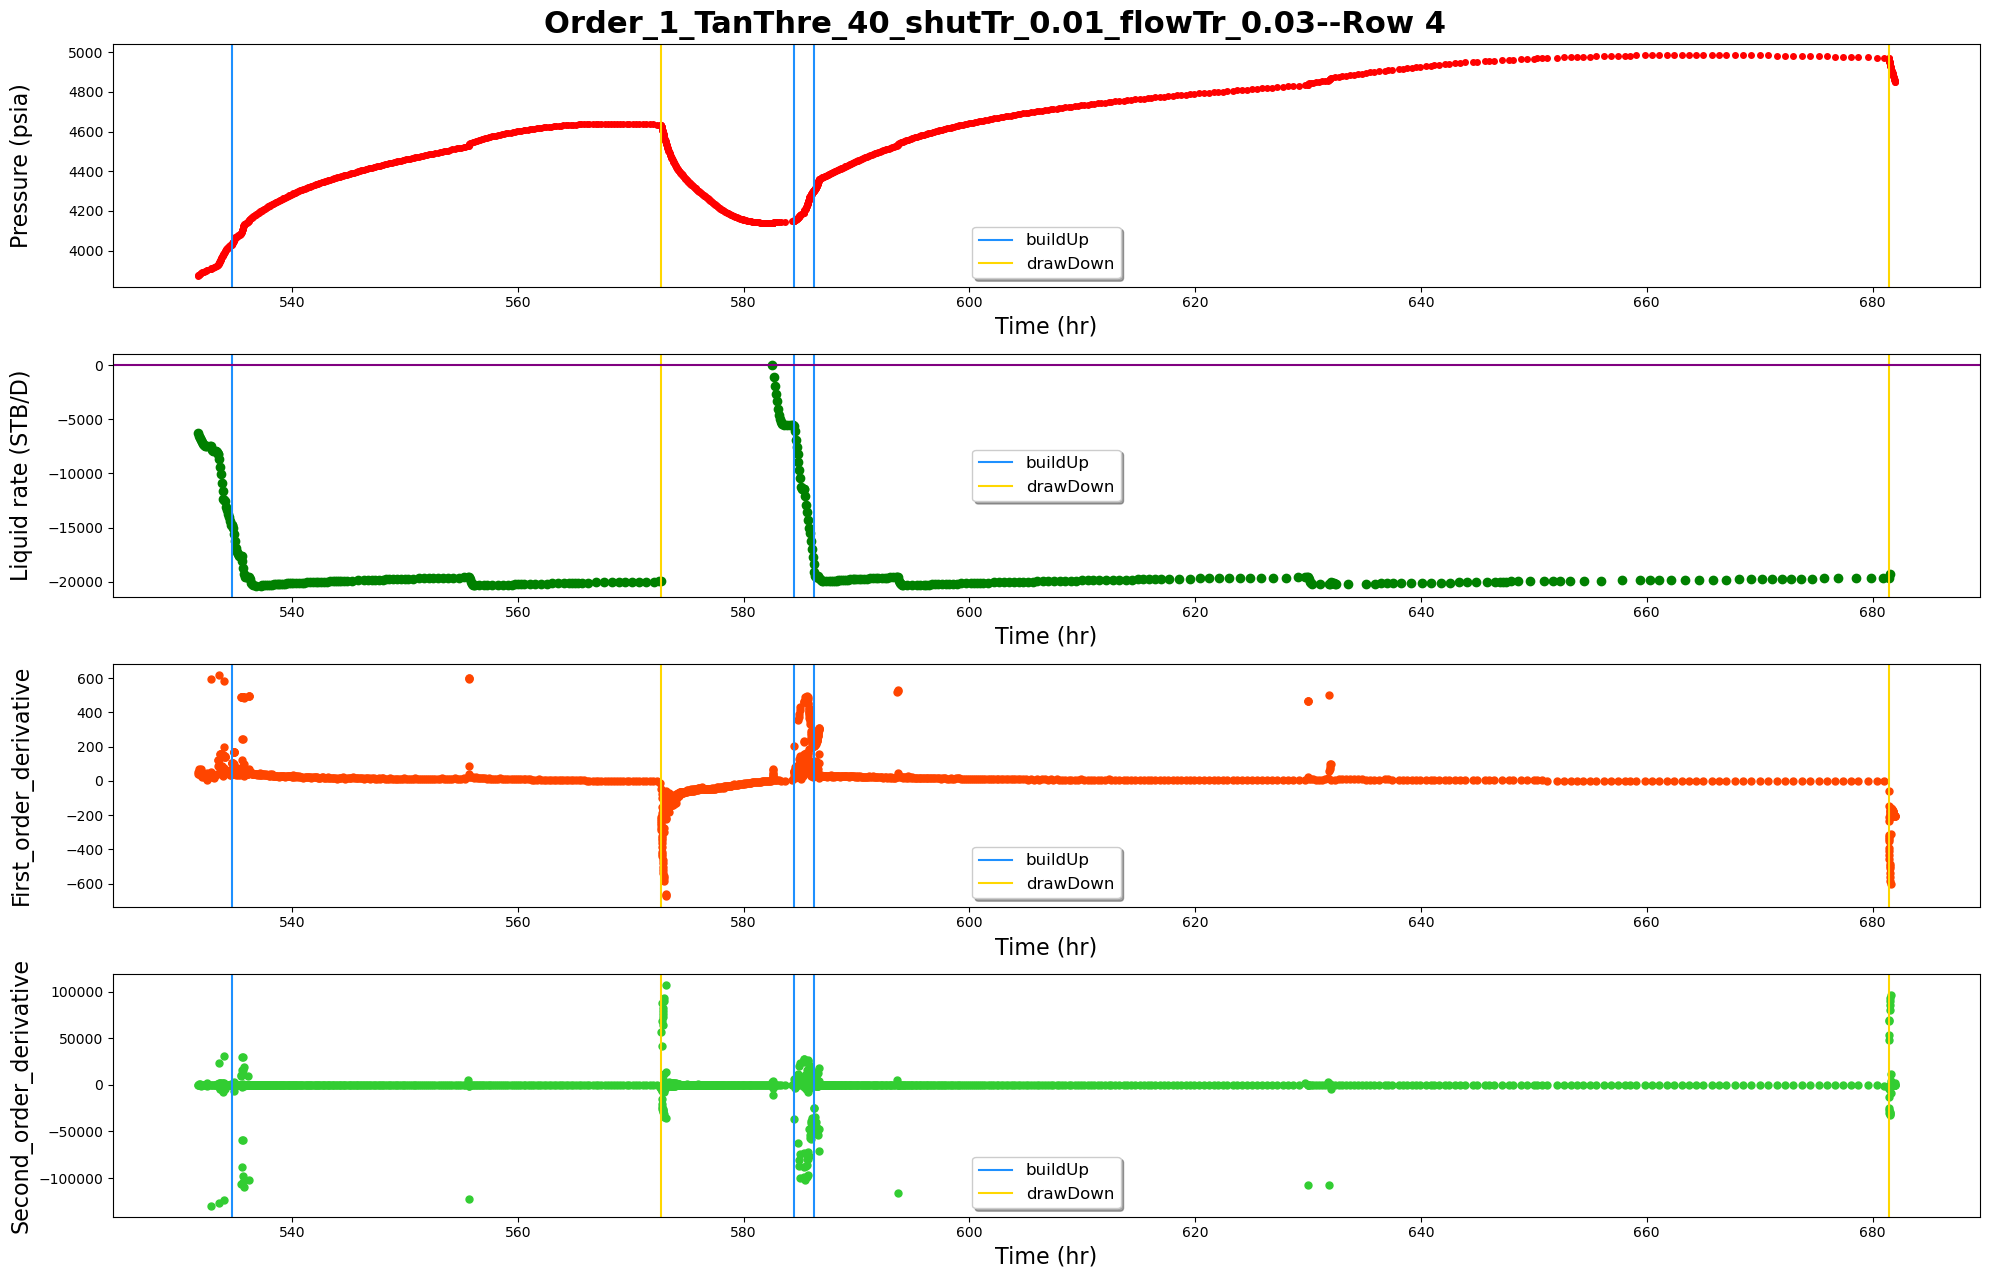

------row 5-----detected points:[4911, 5304, 5445, 5530, 5985]


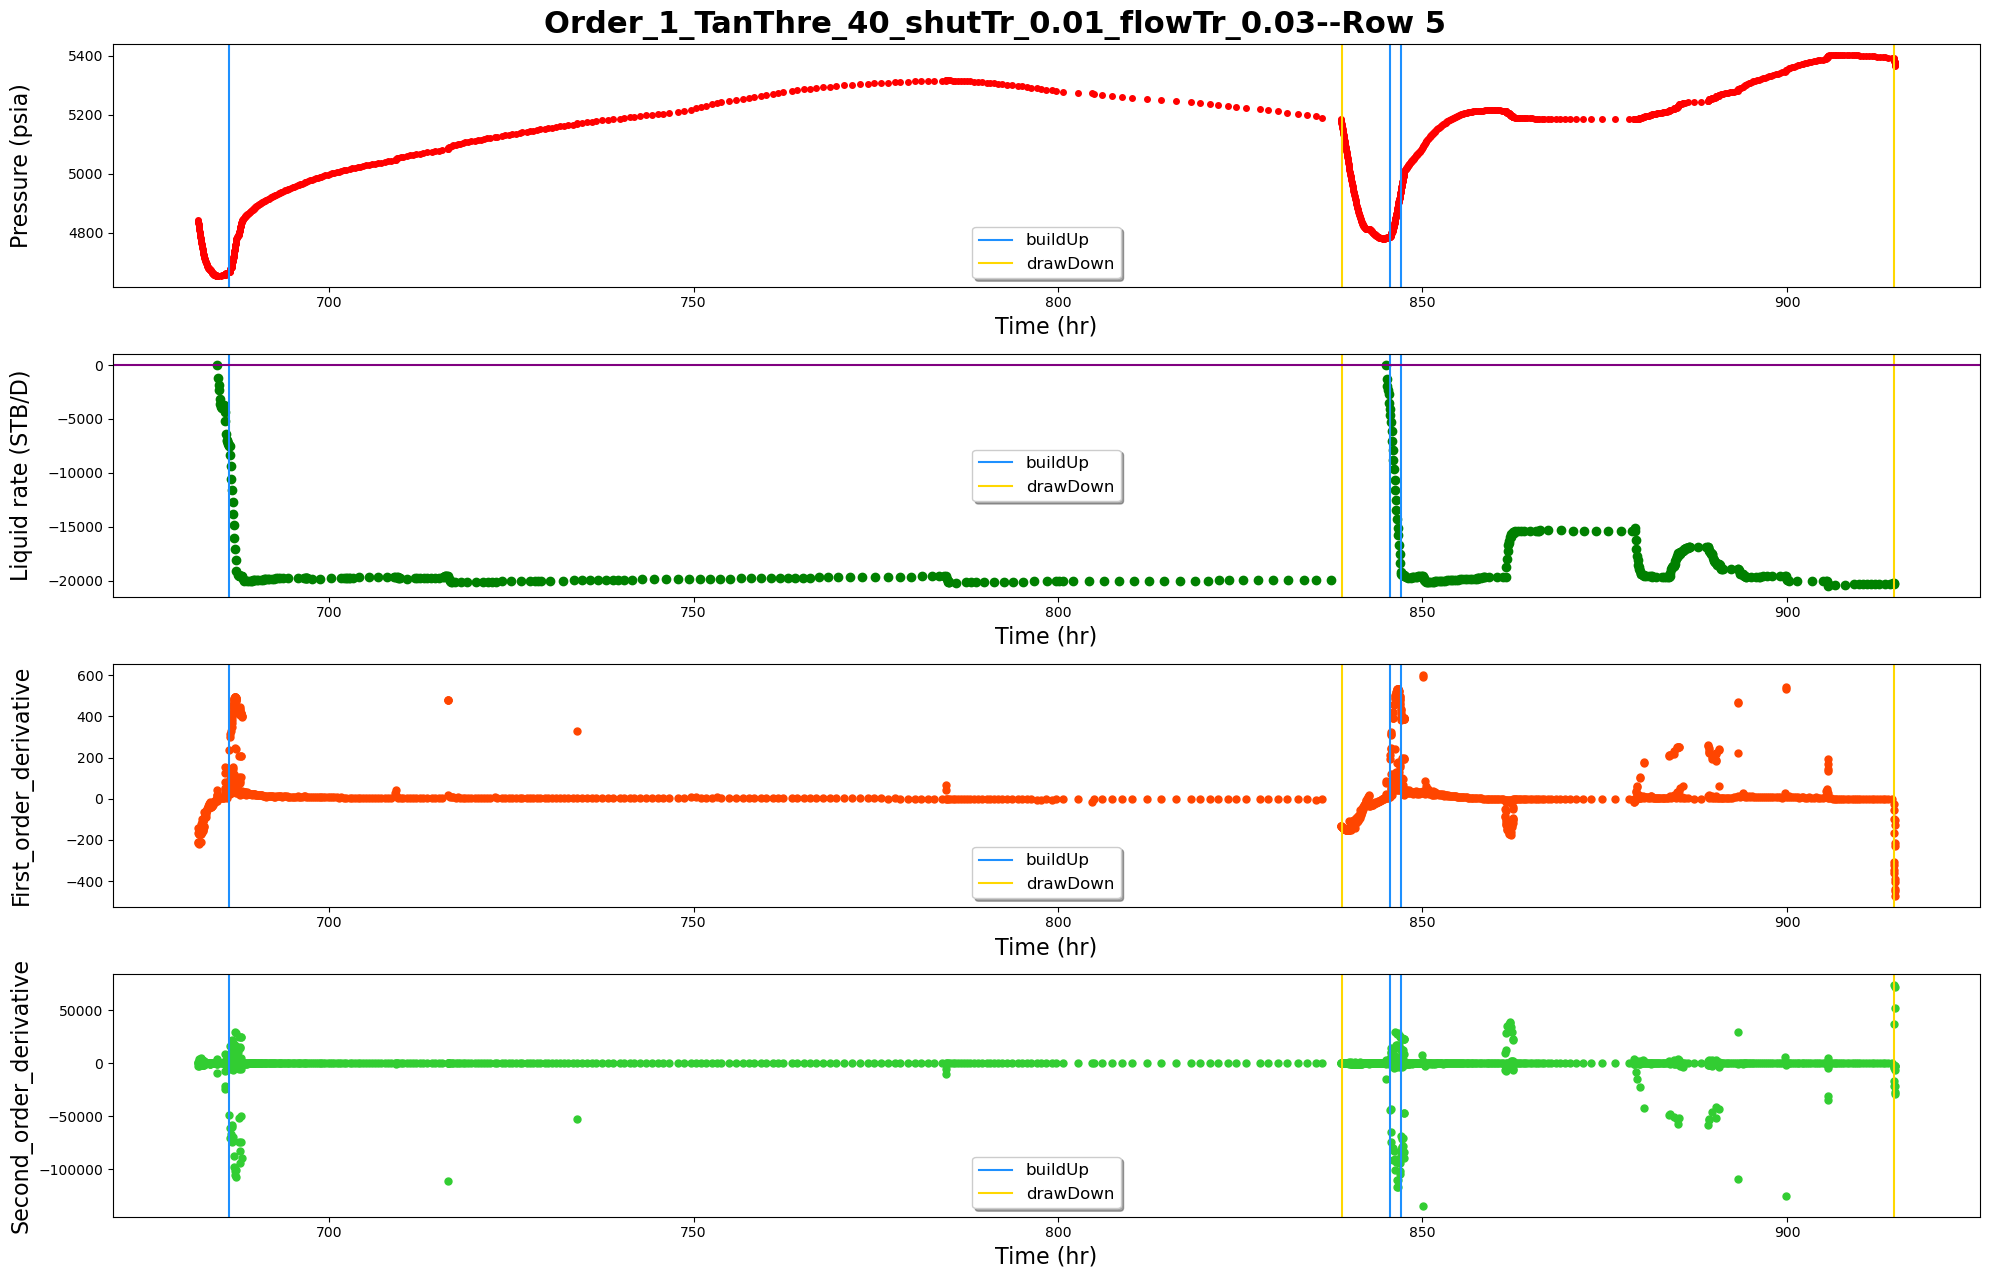

------row 6-----detected points:[6771, 6868]


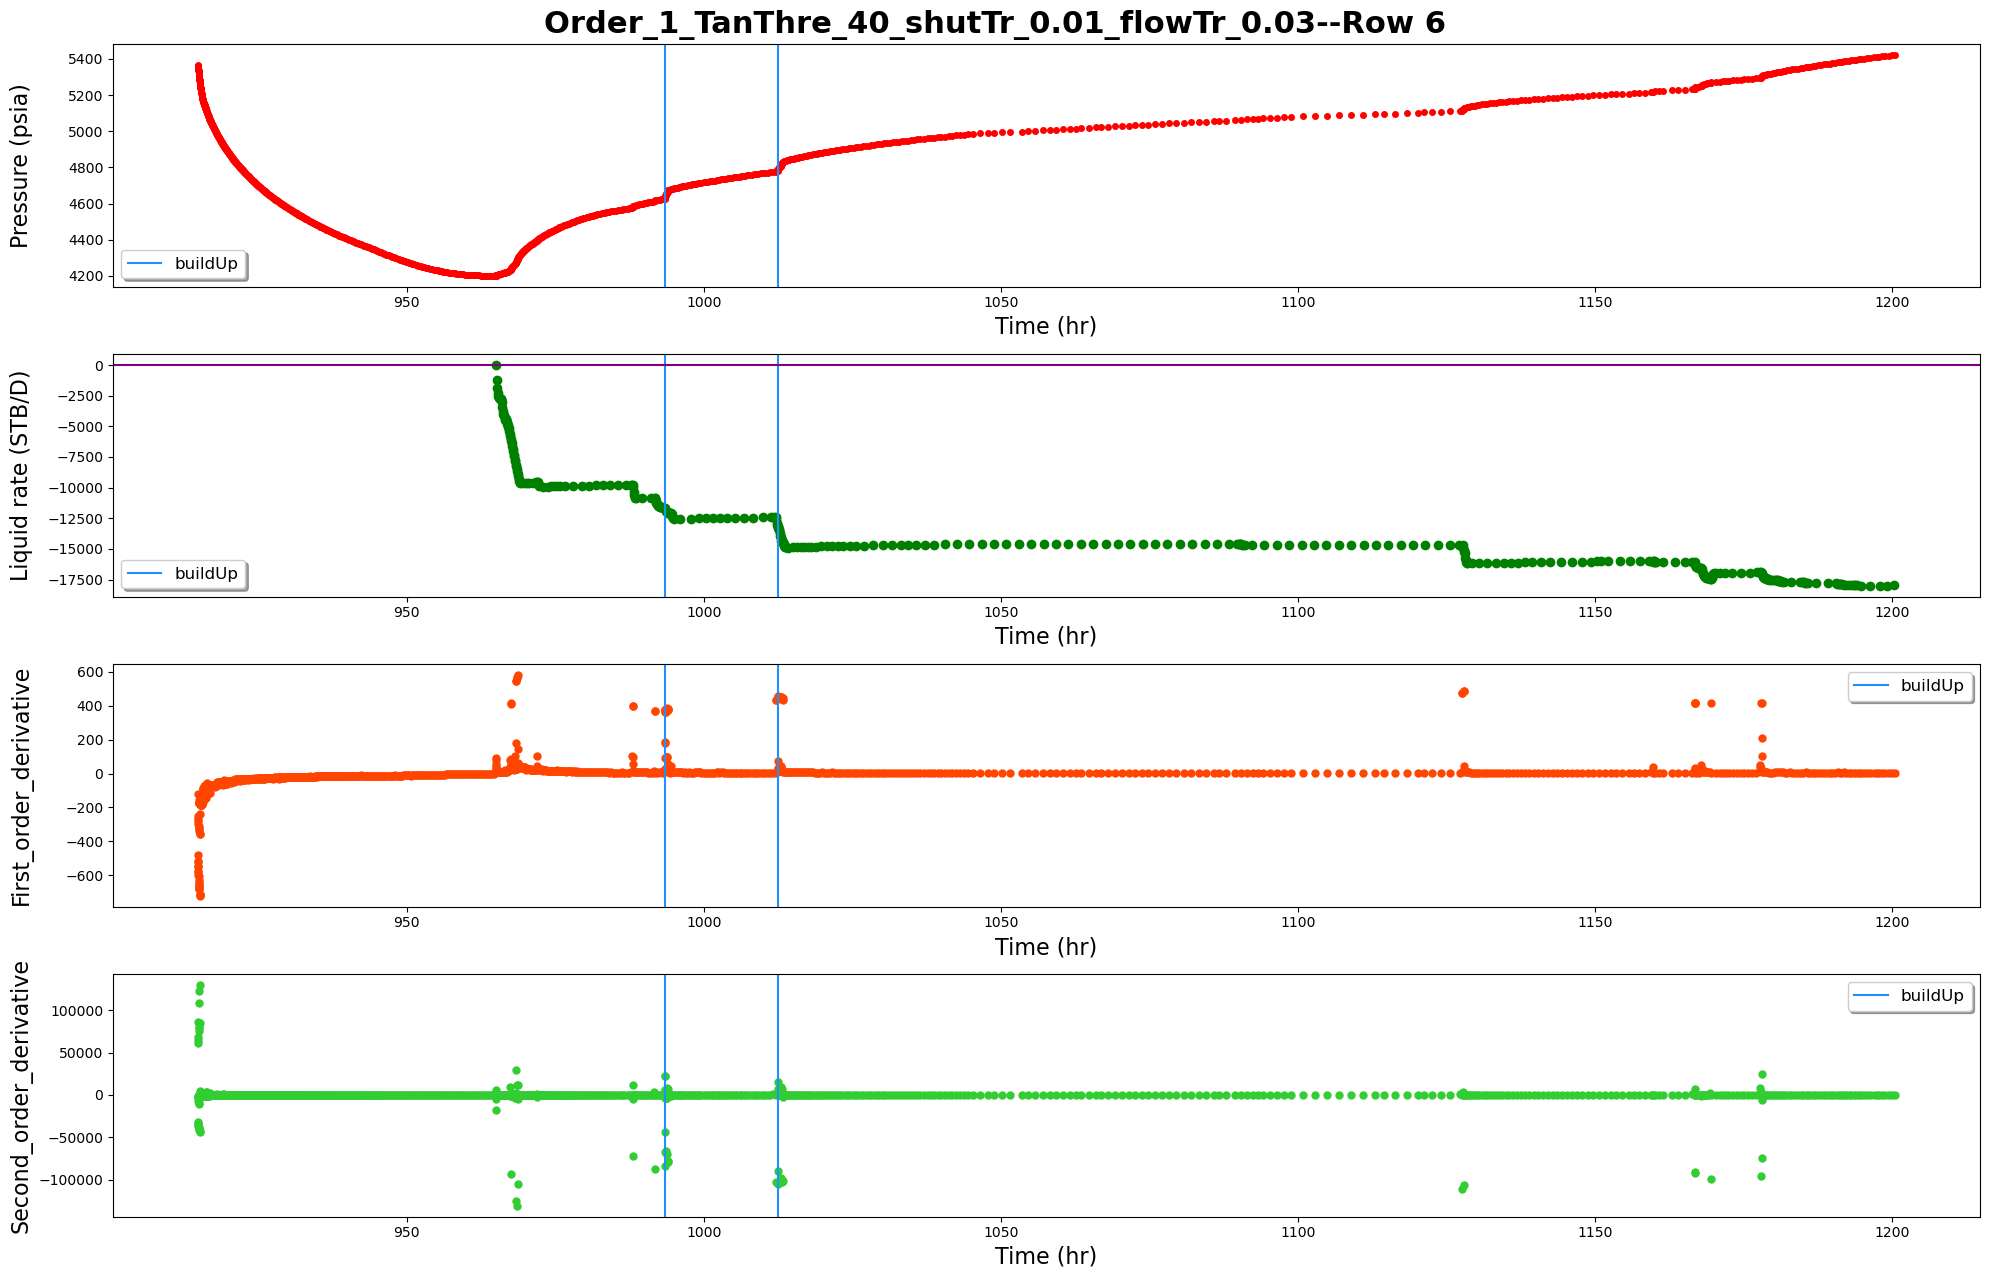

------row 7-----detected points:[7284, 7552, 7622, 7714, 7815, 7945, 8371]


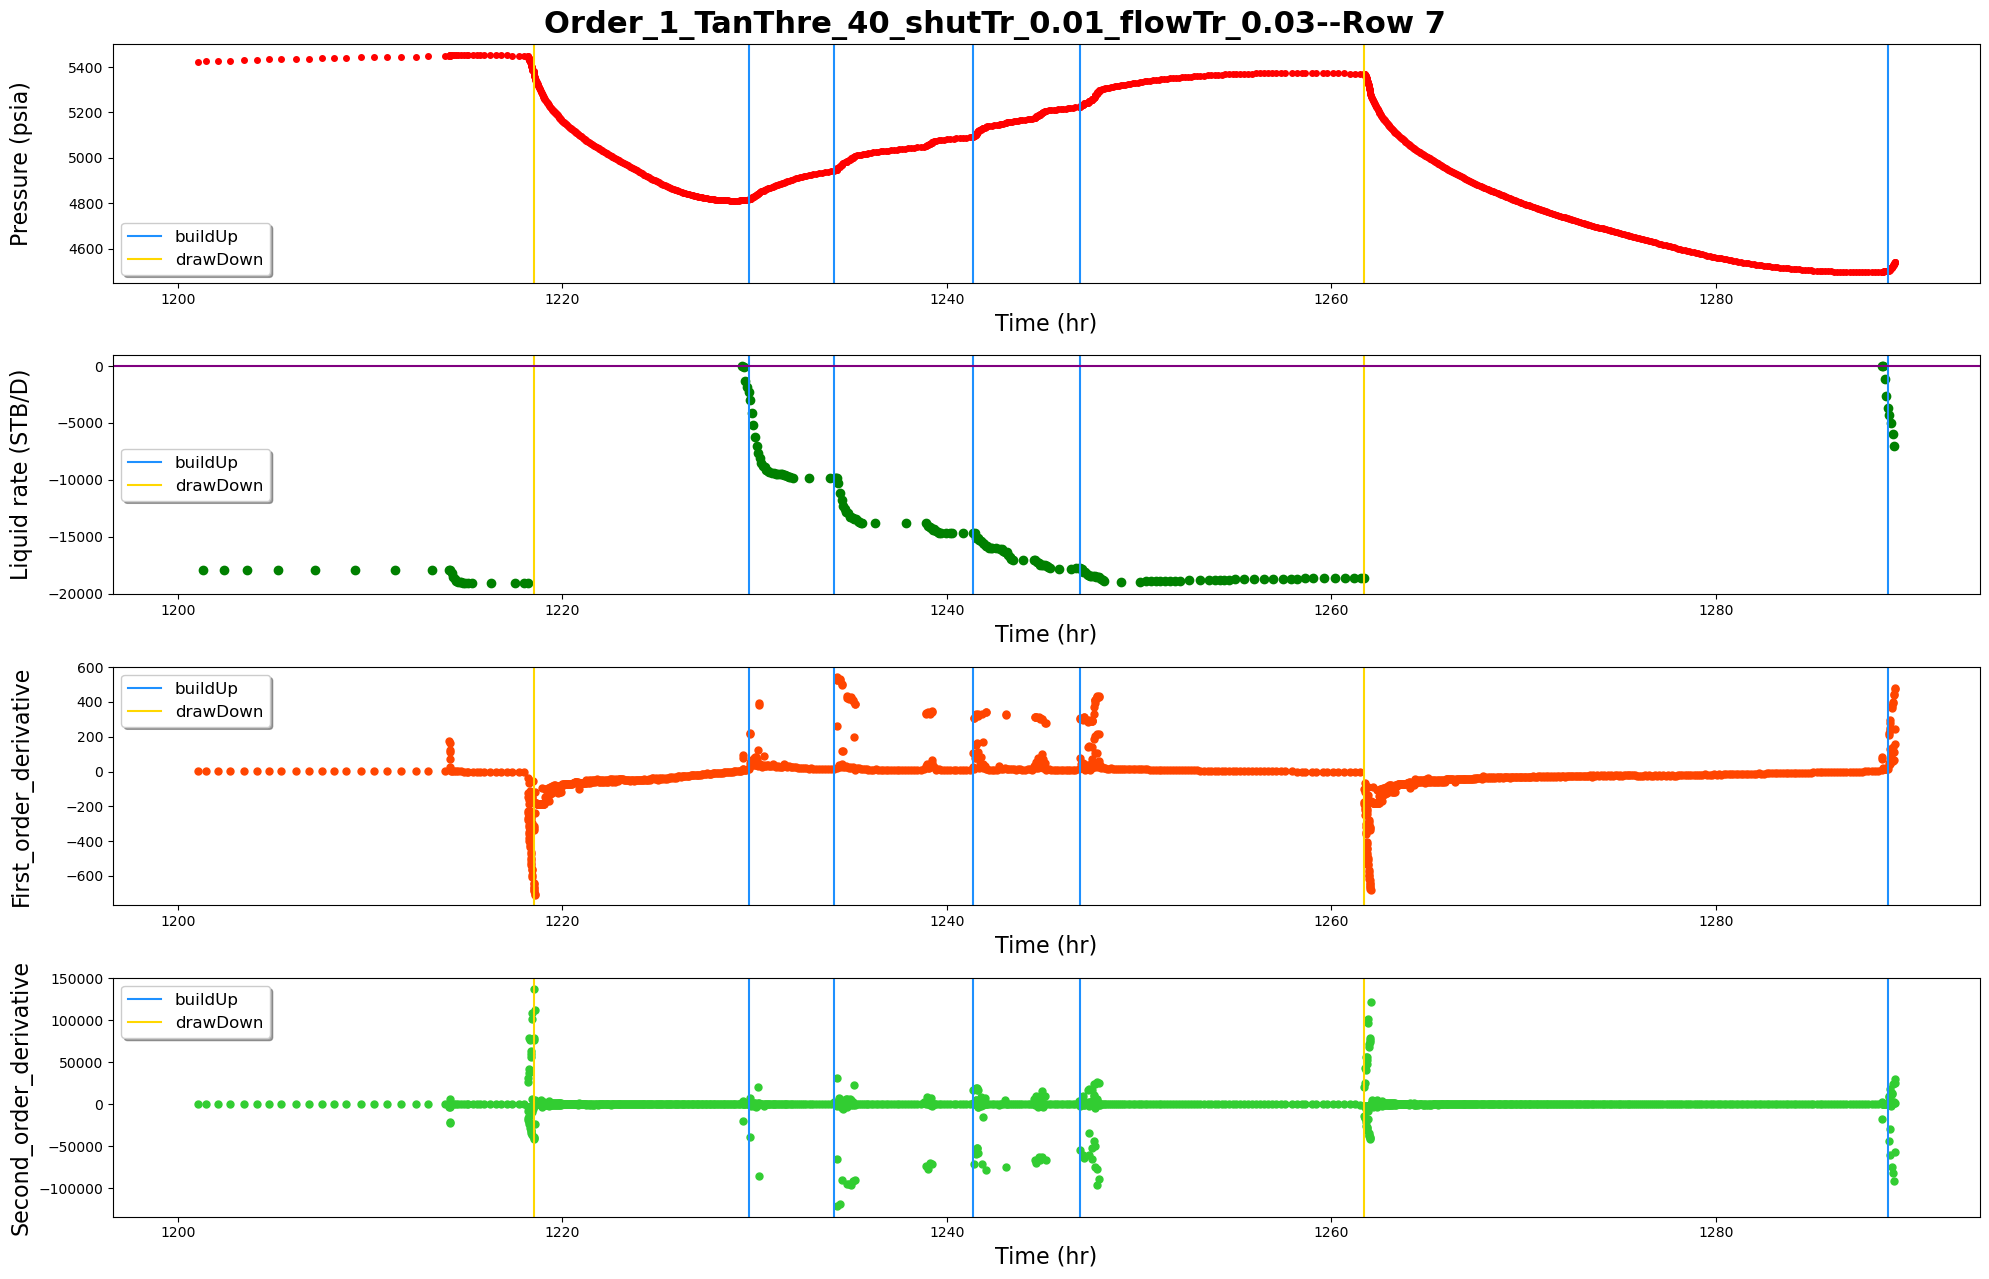

------row 8-----detected points:[8600, 8774, 8868, 9024]


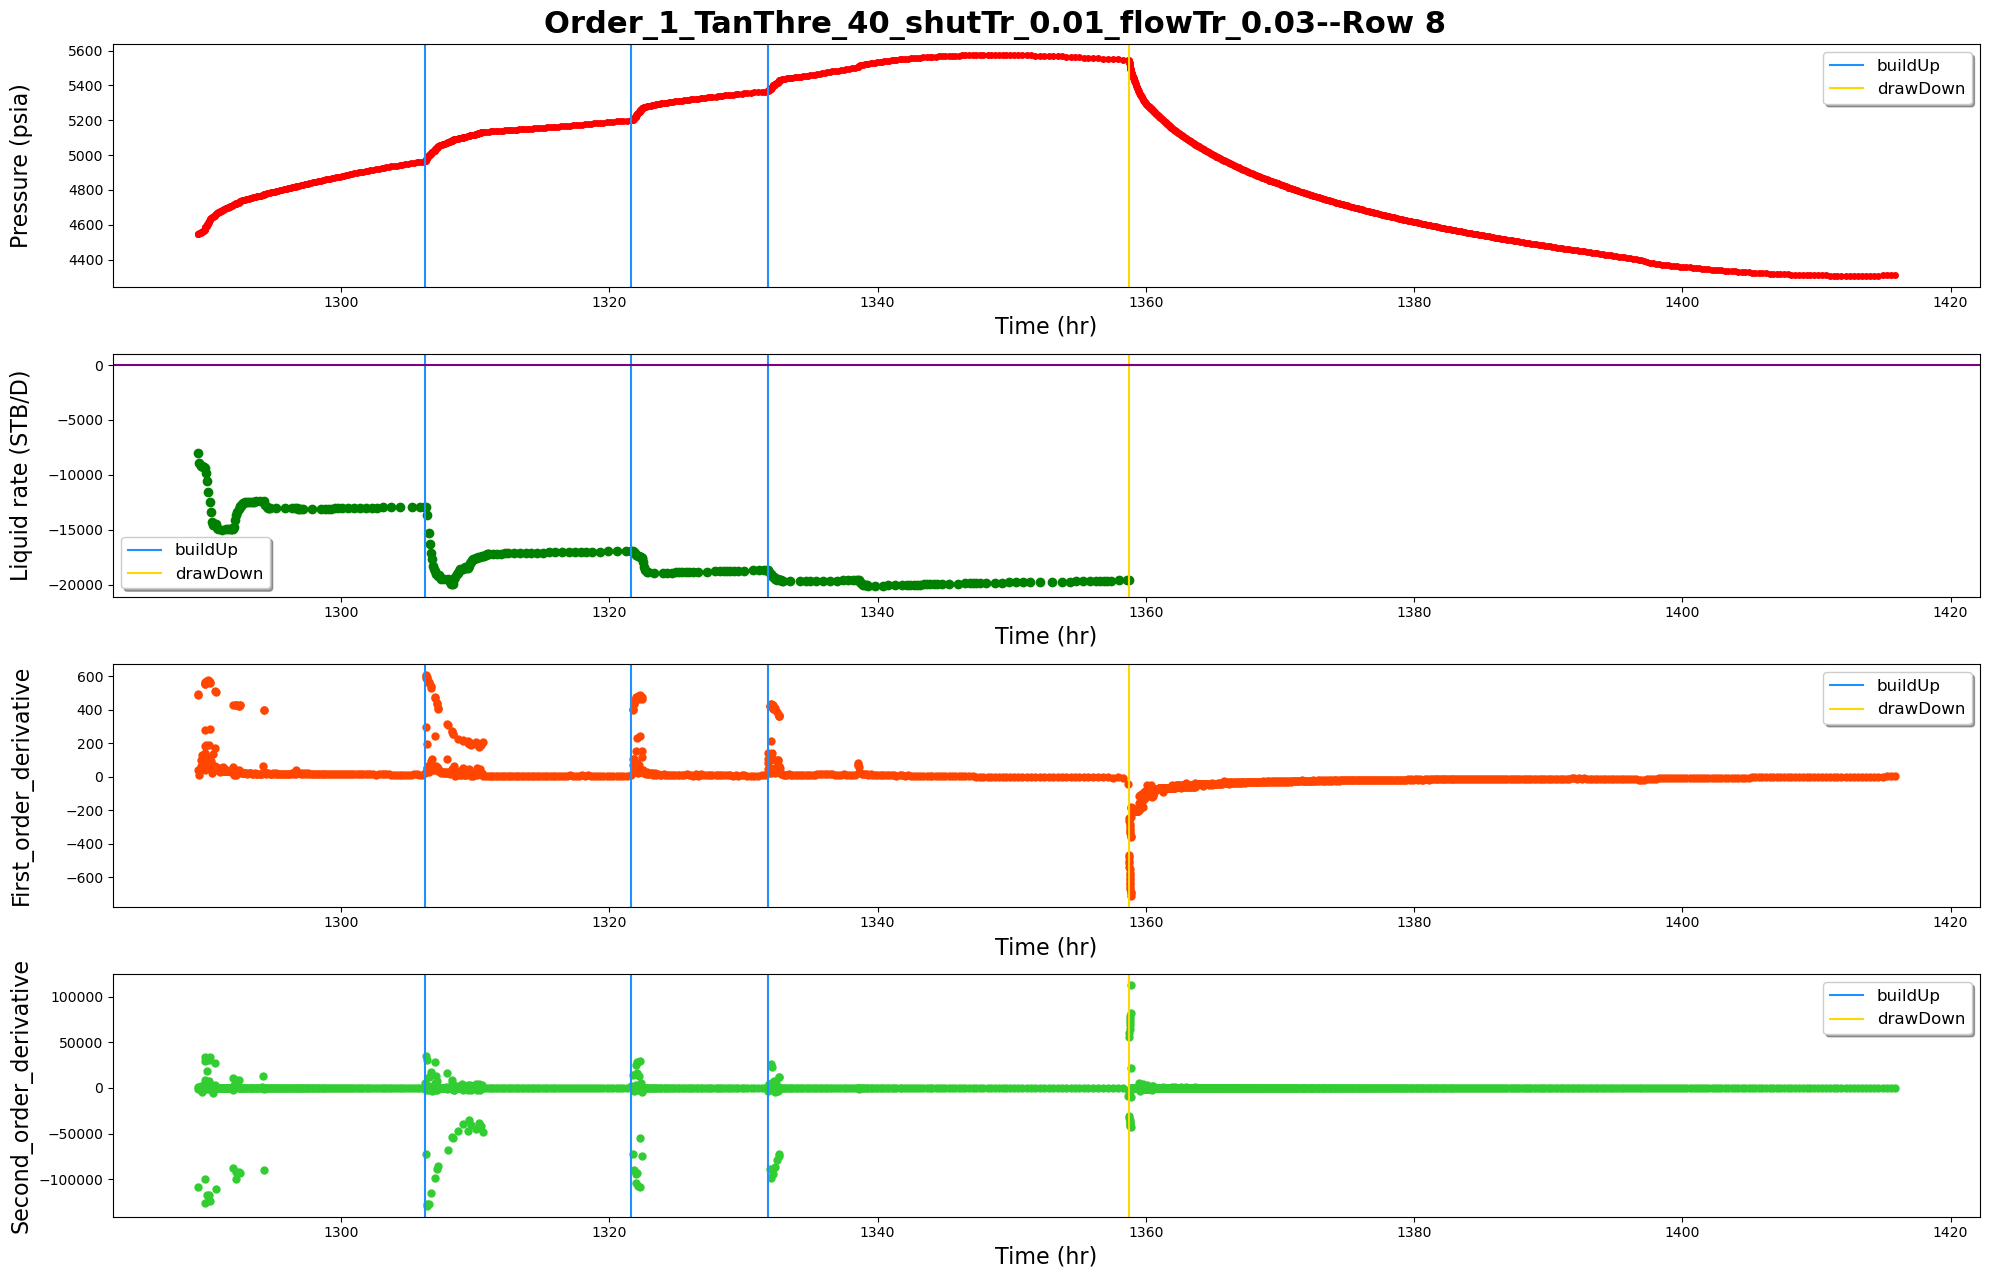

------row 9-----detected points:[9606, 9680, 10065, 10149, 10259, 10332, 10464, 10527]


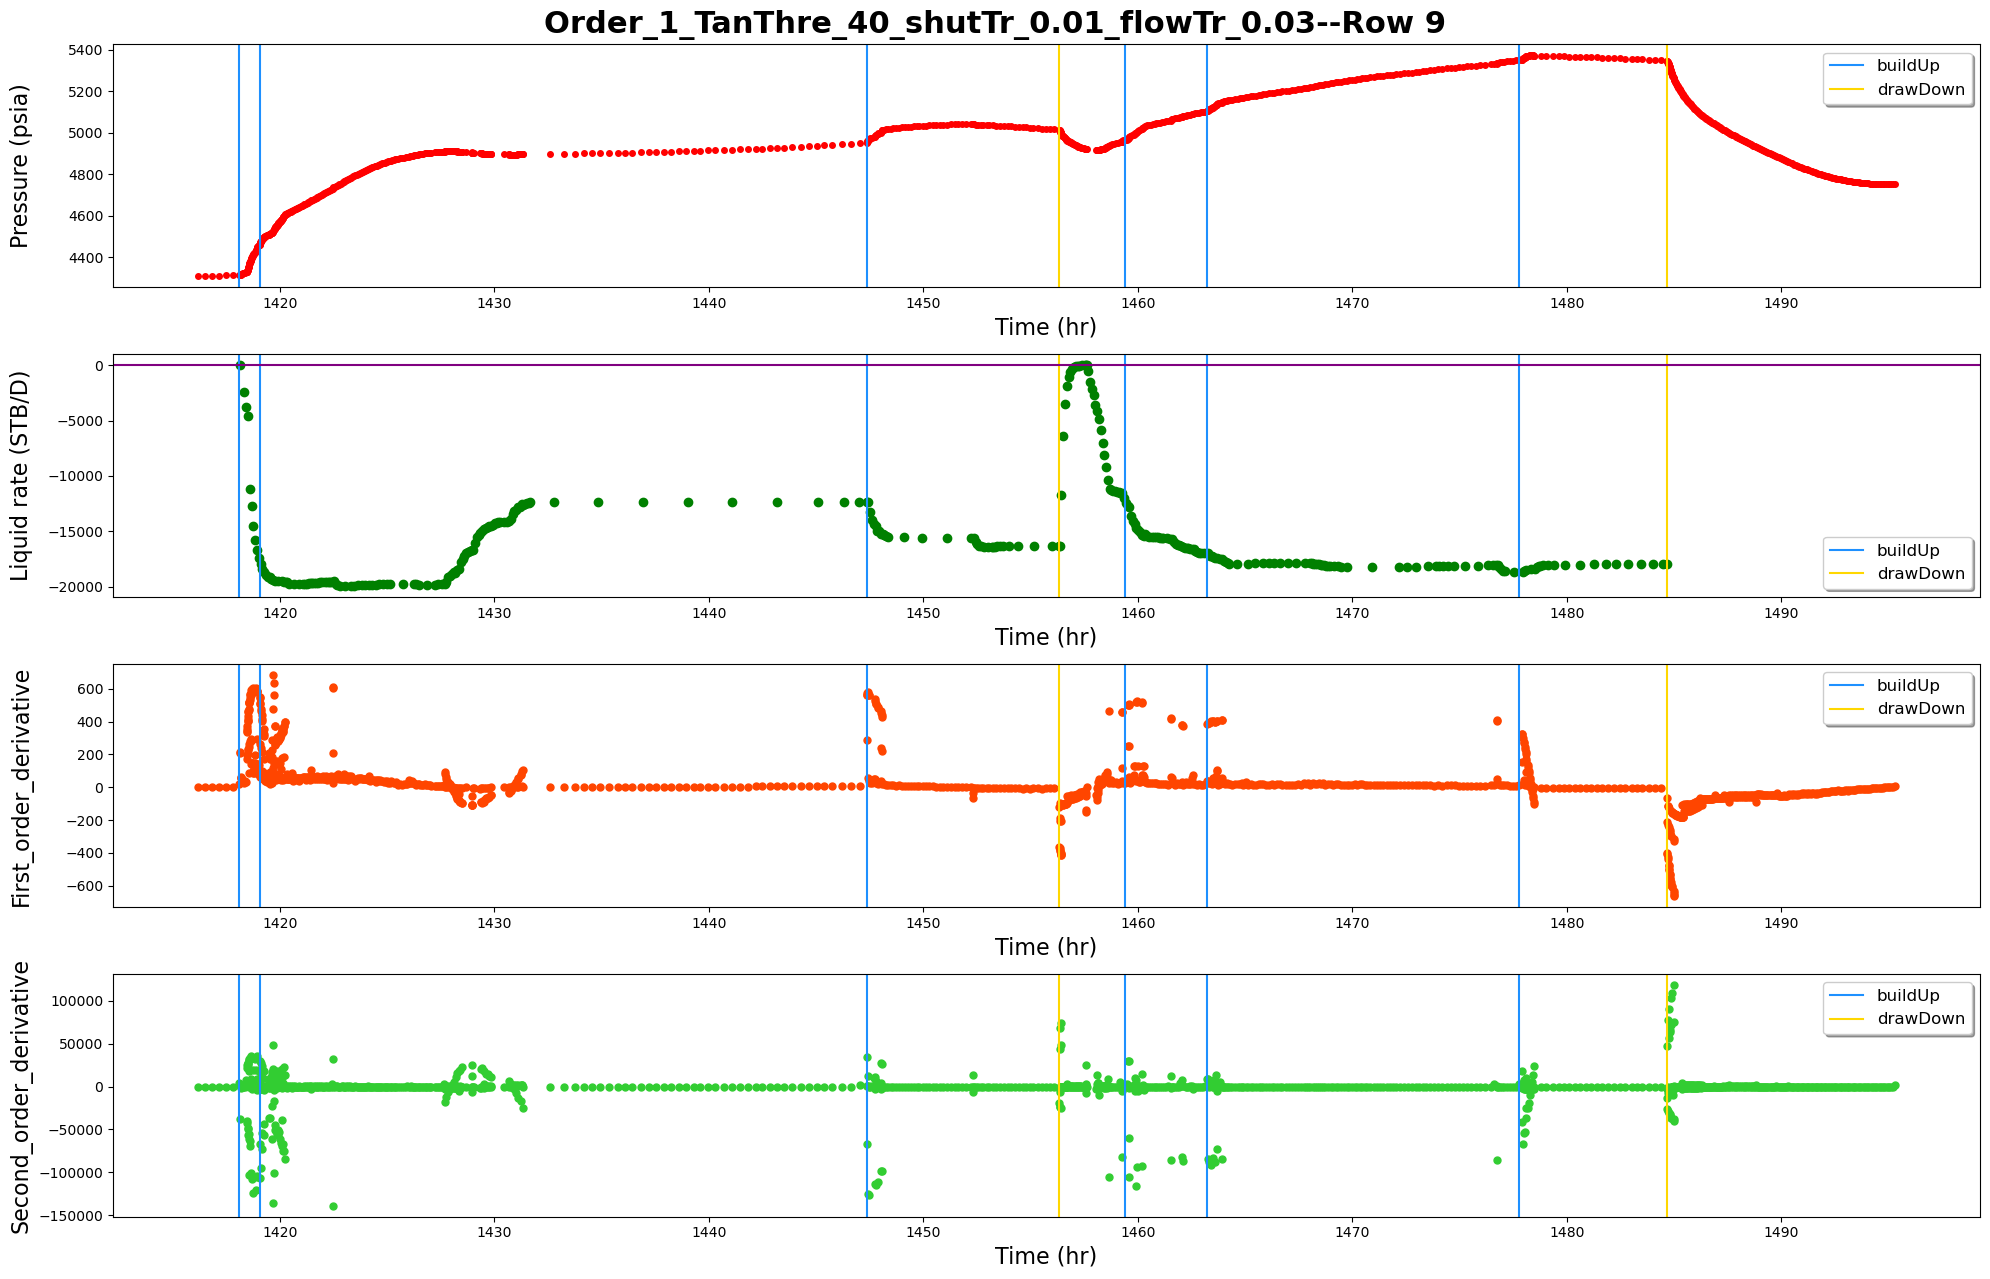

------row 10-----detected points:[10810, 10947, 11083, 11340, 11490, 11640, 11754]


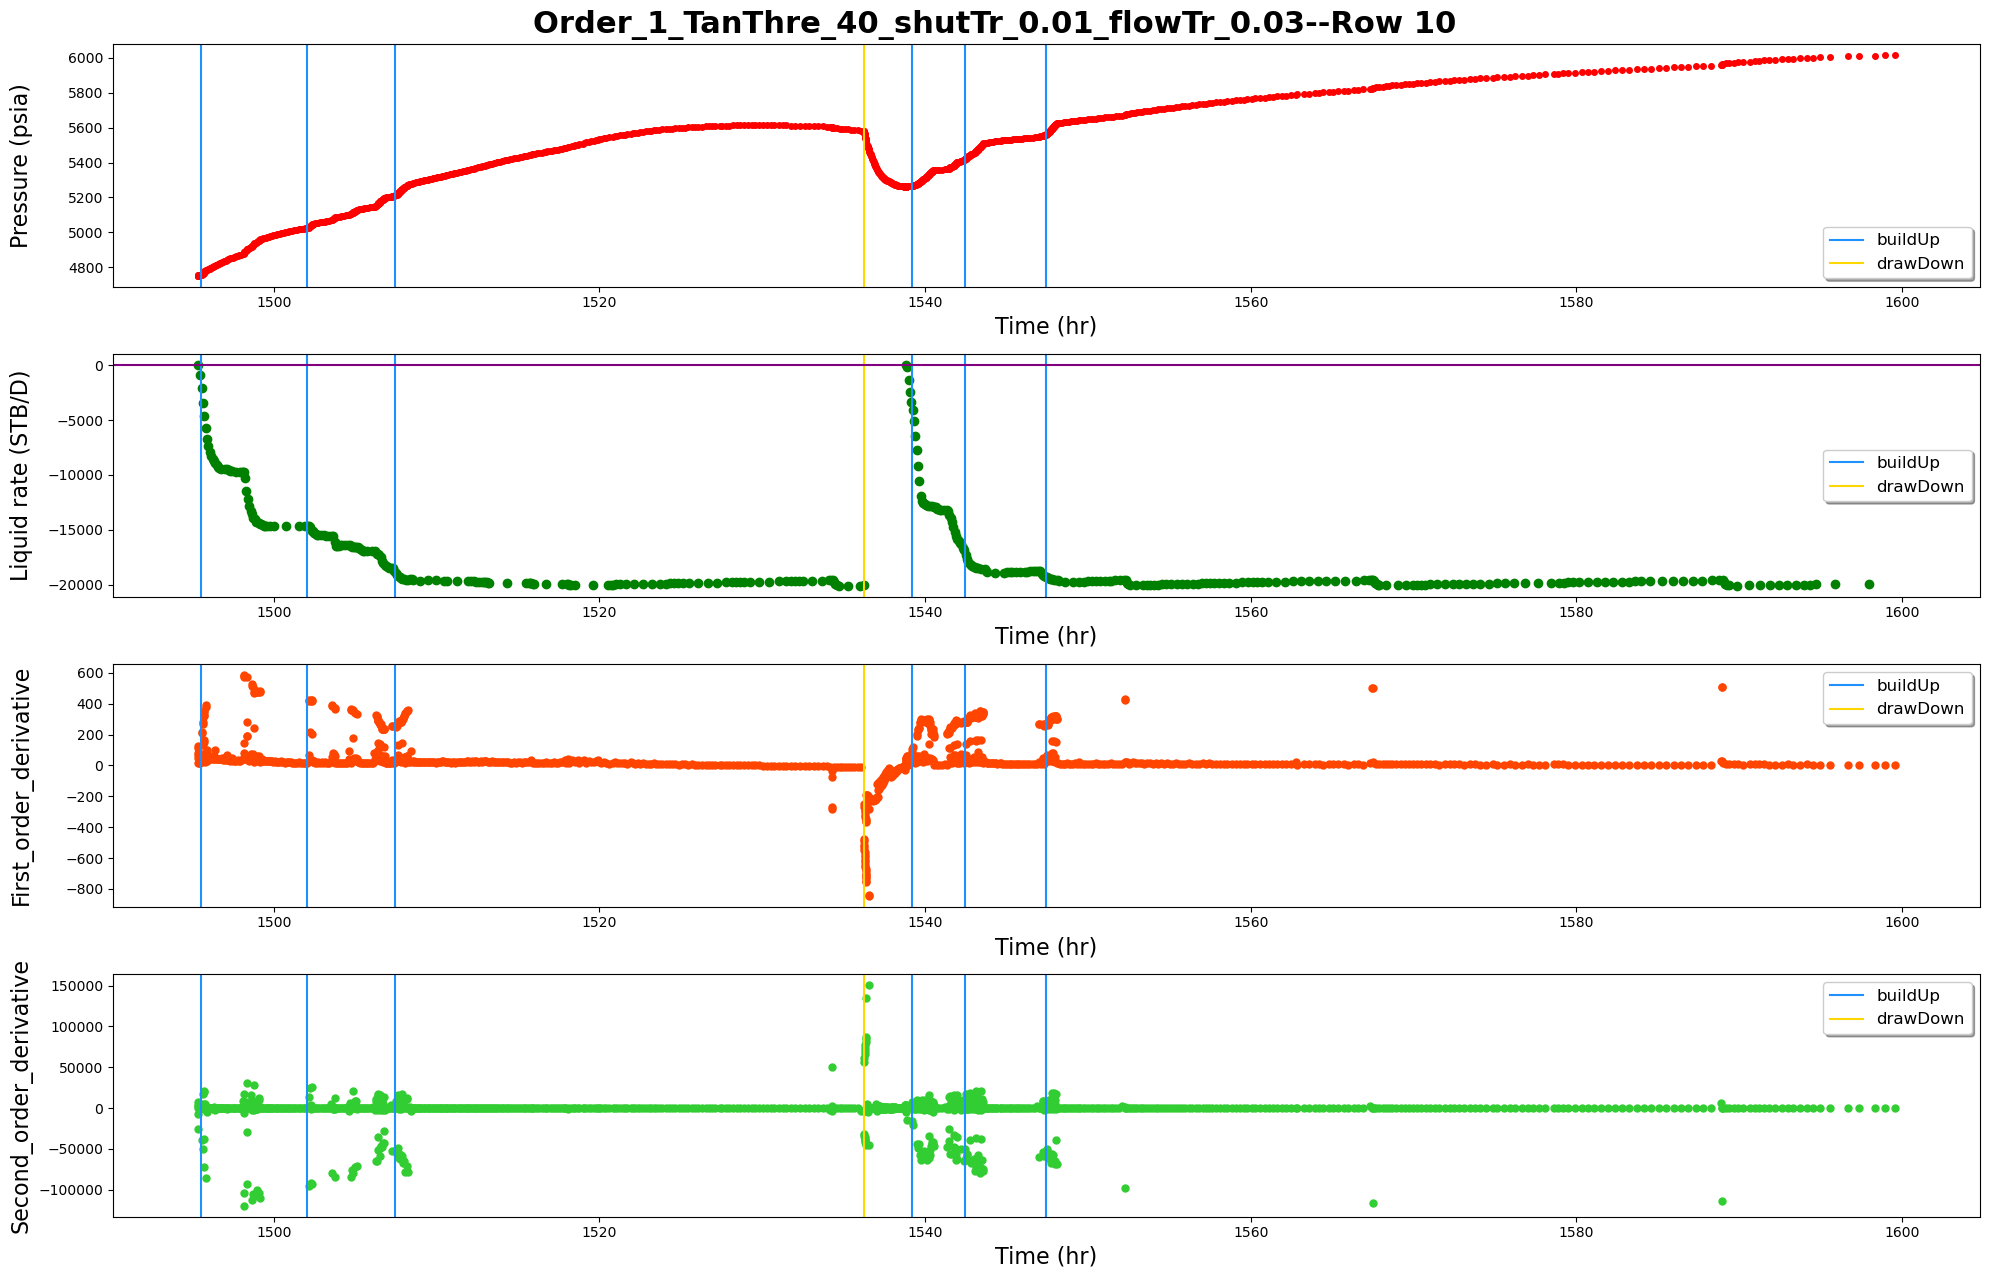

------row 11-----detected points:[12240, 12362, 13038, 13100, 13148]


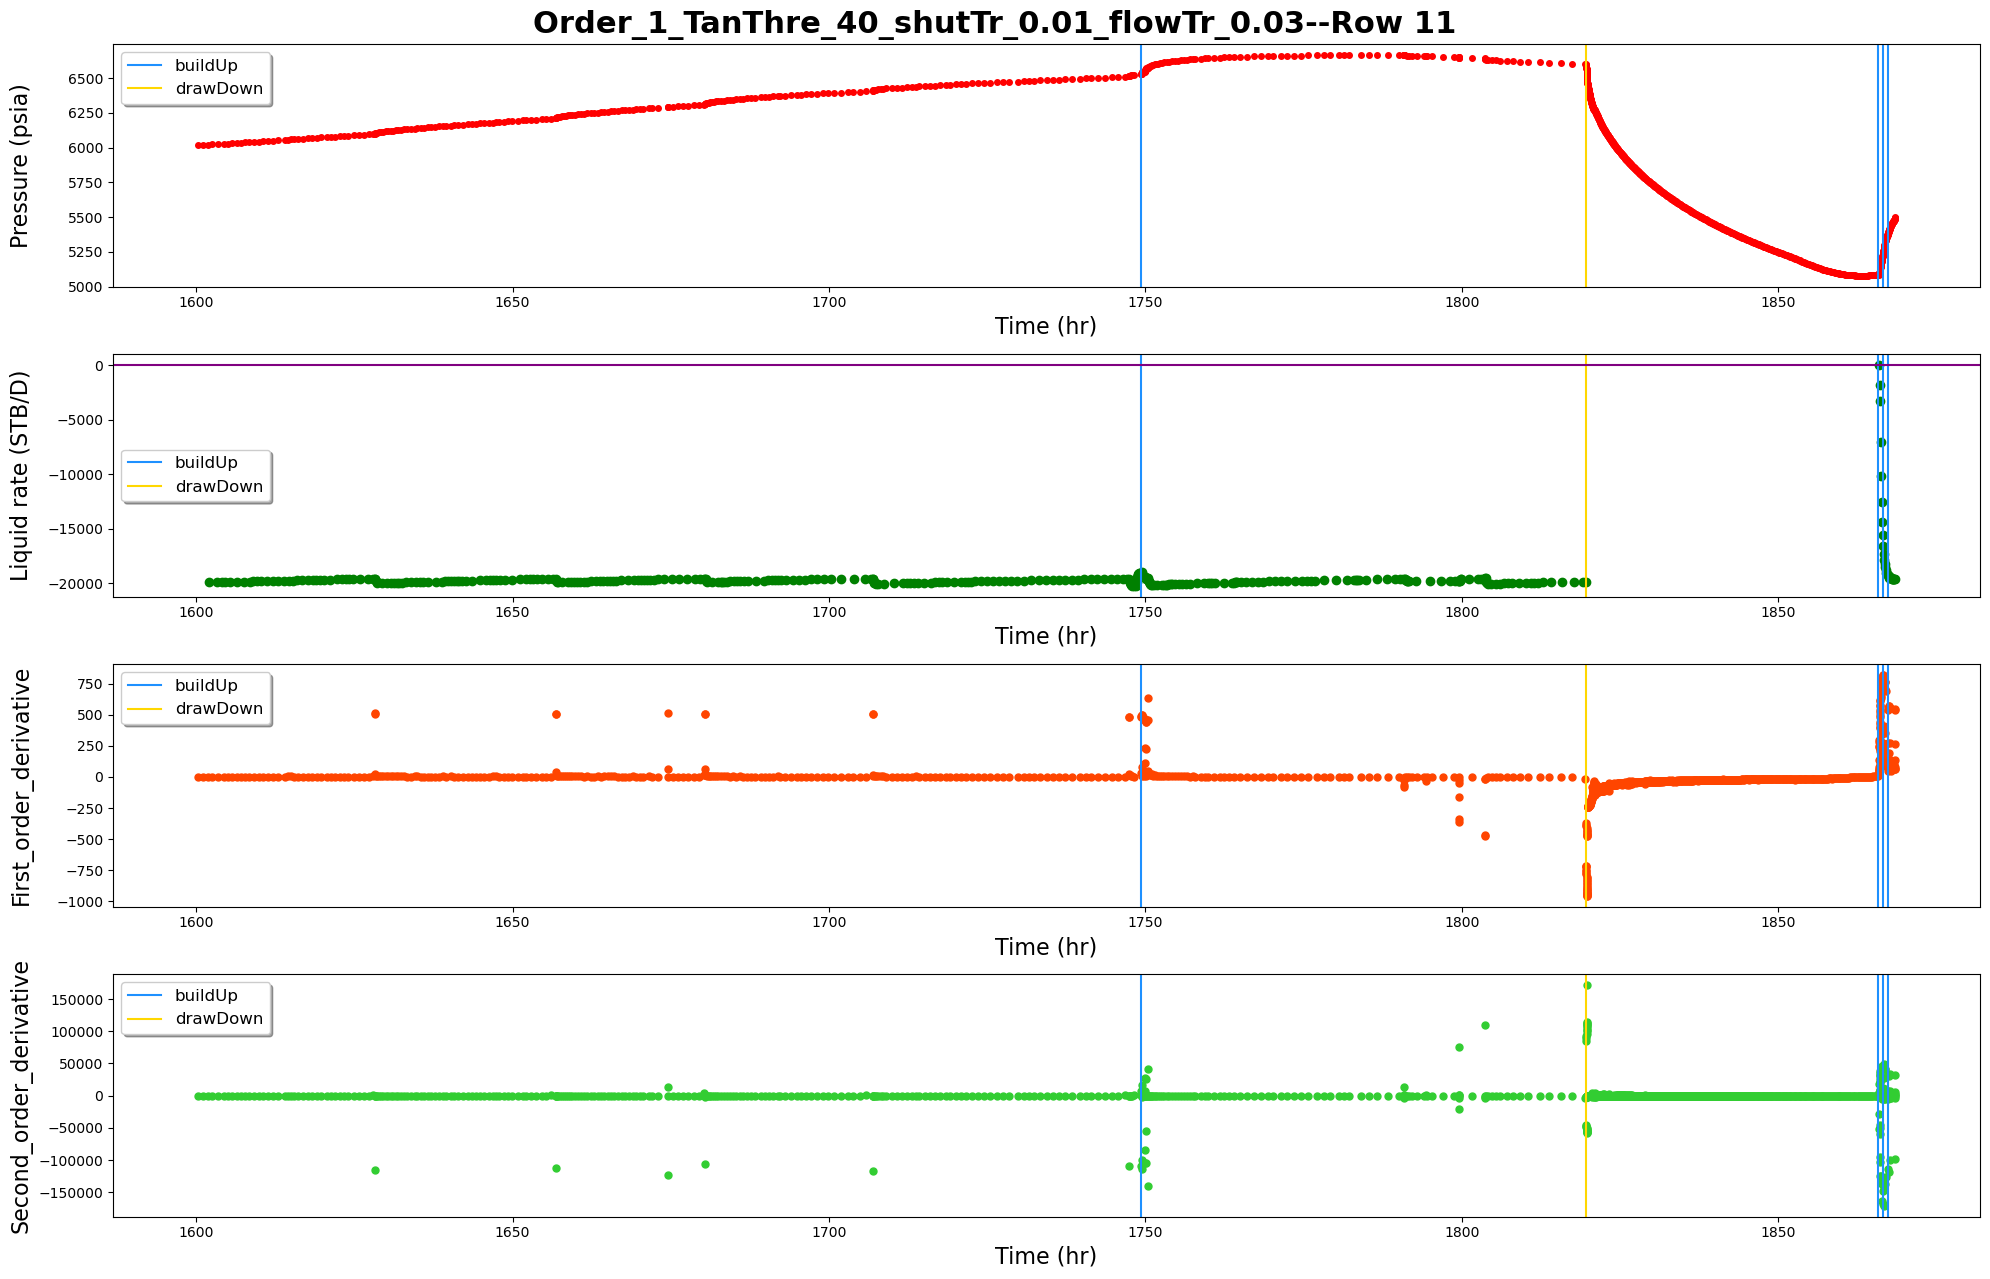

------row 12-----detected points:[13333, 13417, 13526, 13774, 13909, 14089, 14195, 14271]


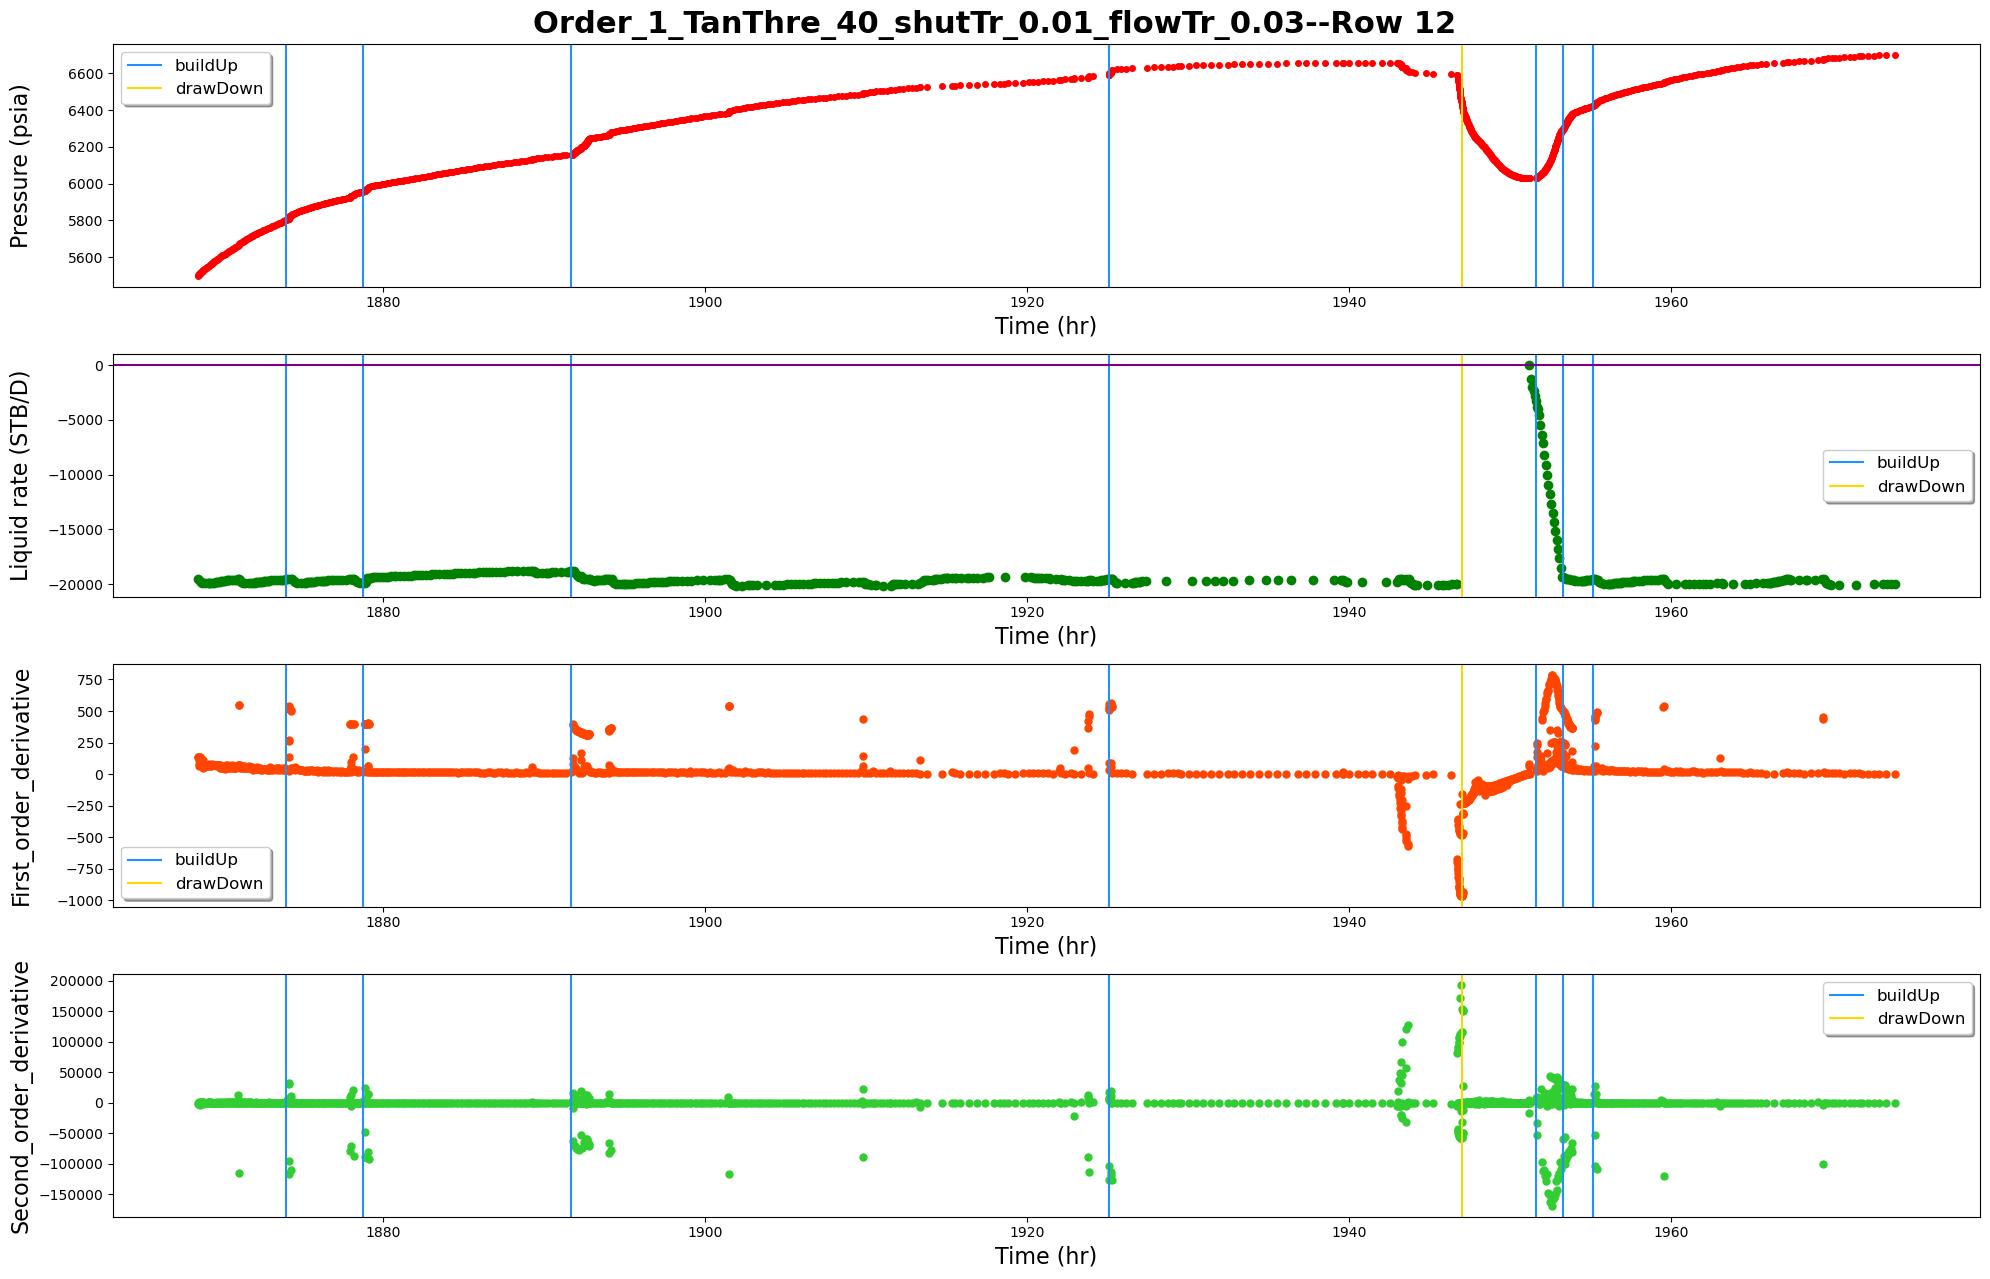

------row 13-----detected points:[14471, 14592, 14774, 15347, 15428, 15575]


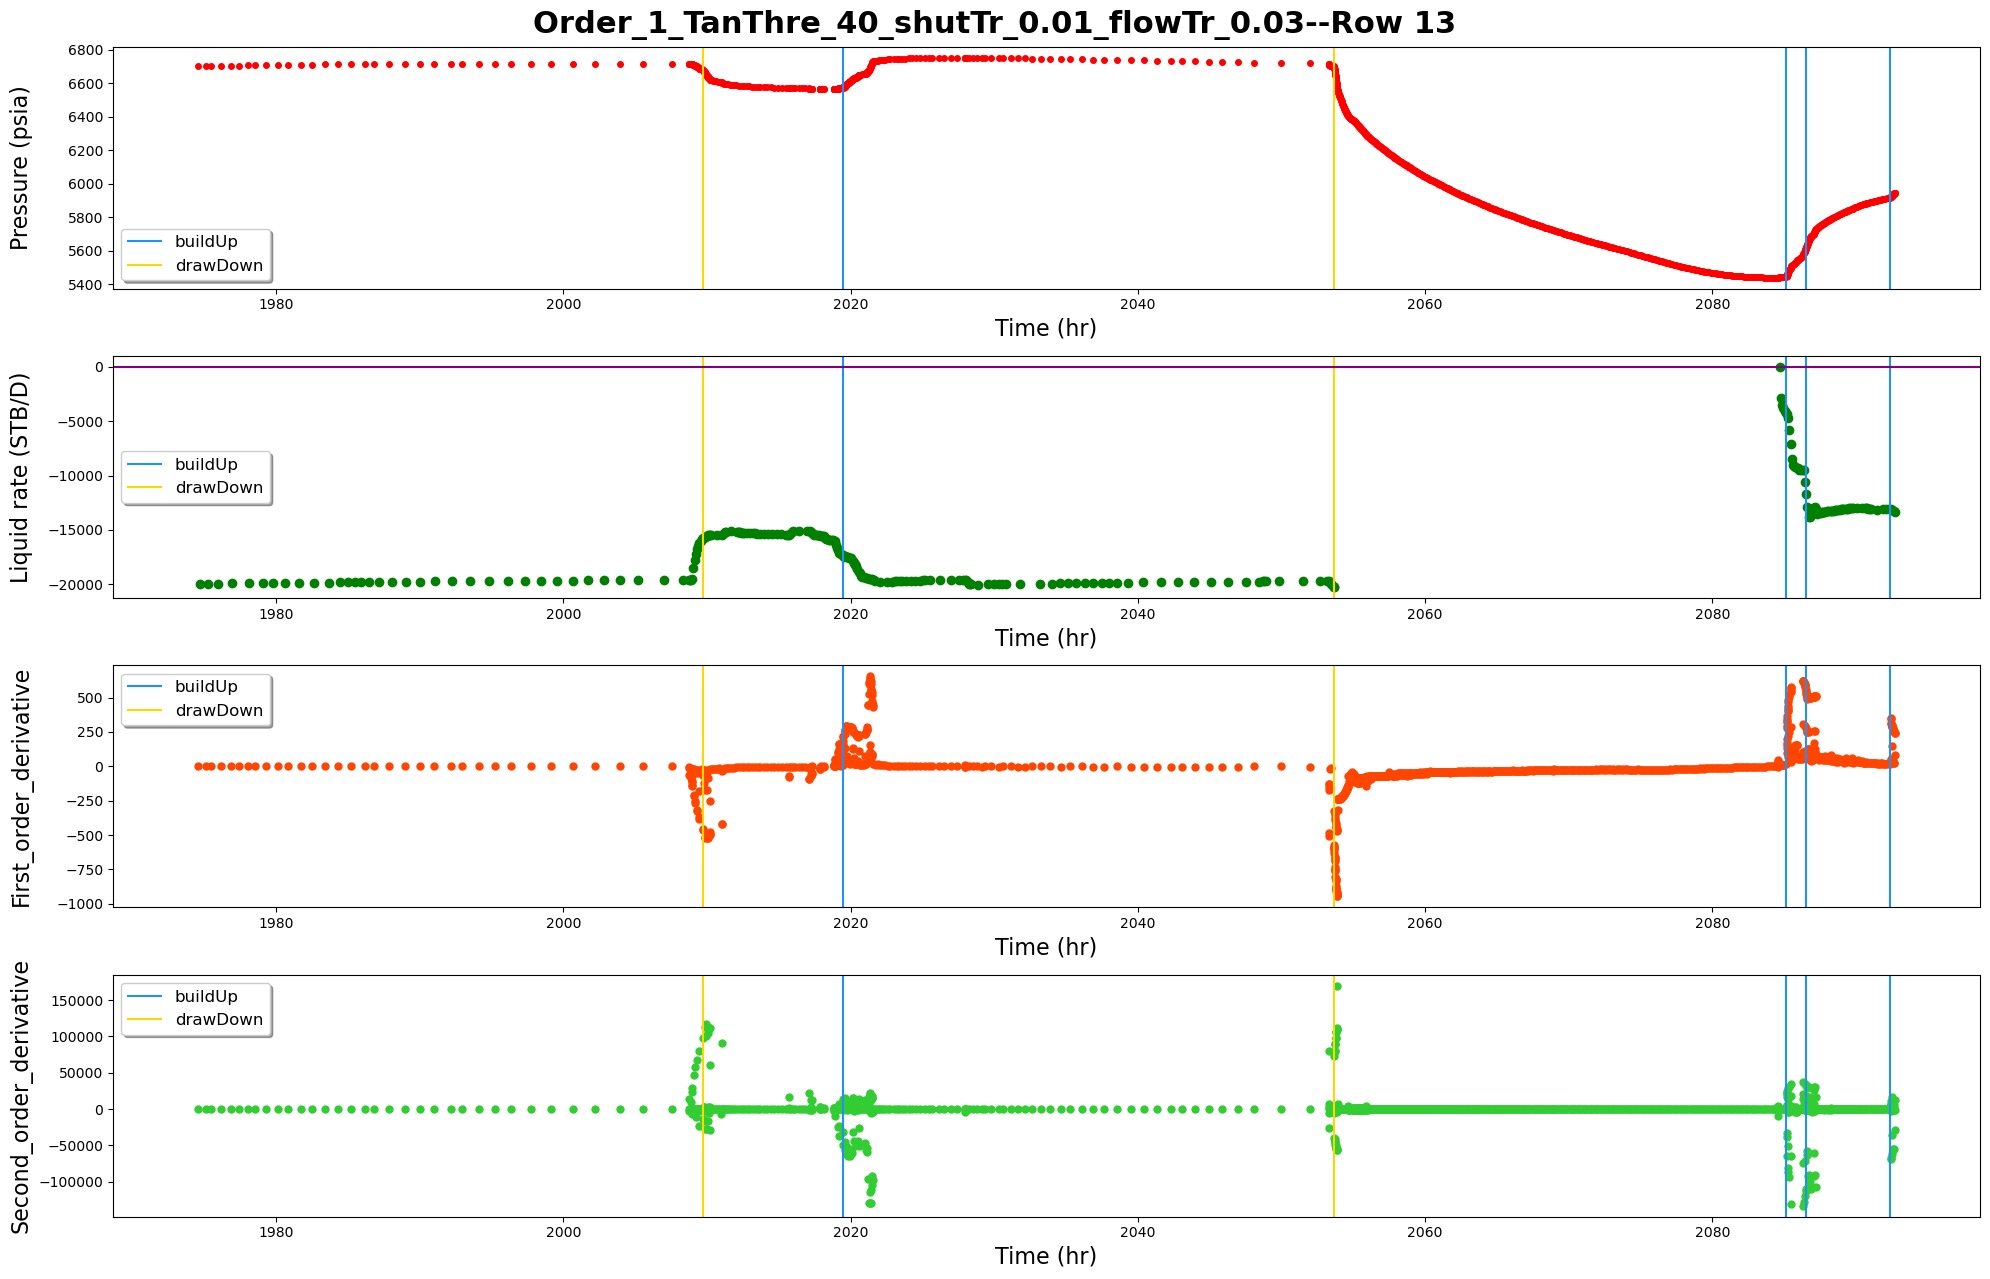

------row 14-----detected points:[15739, 15939, 16096, 16584, 16697, 16784]


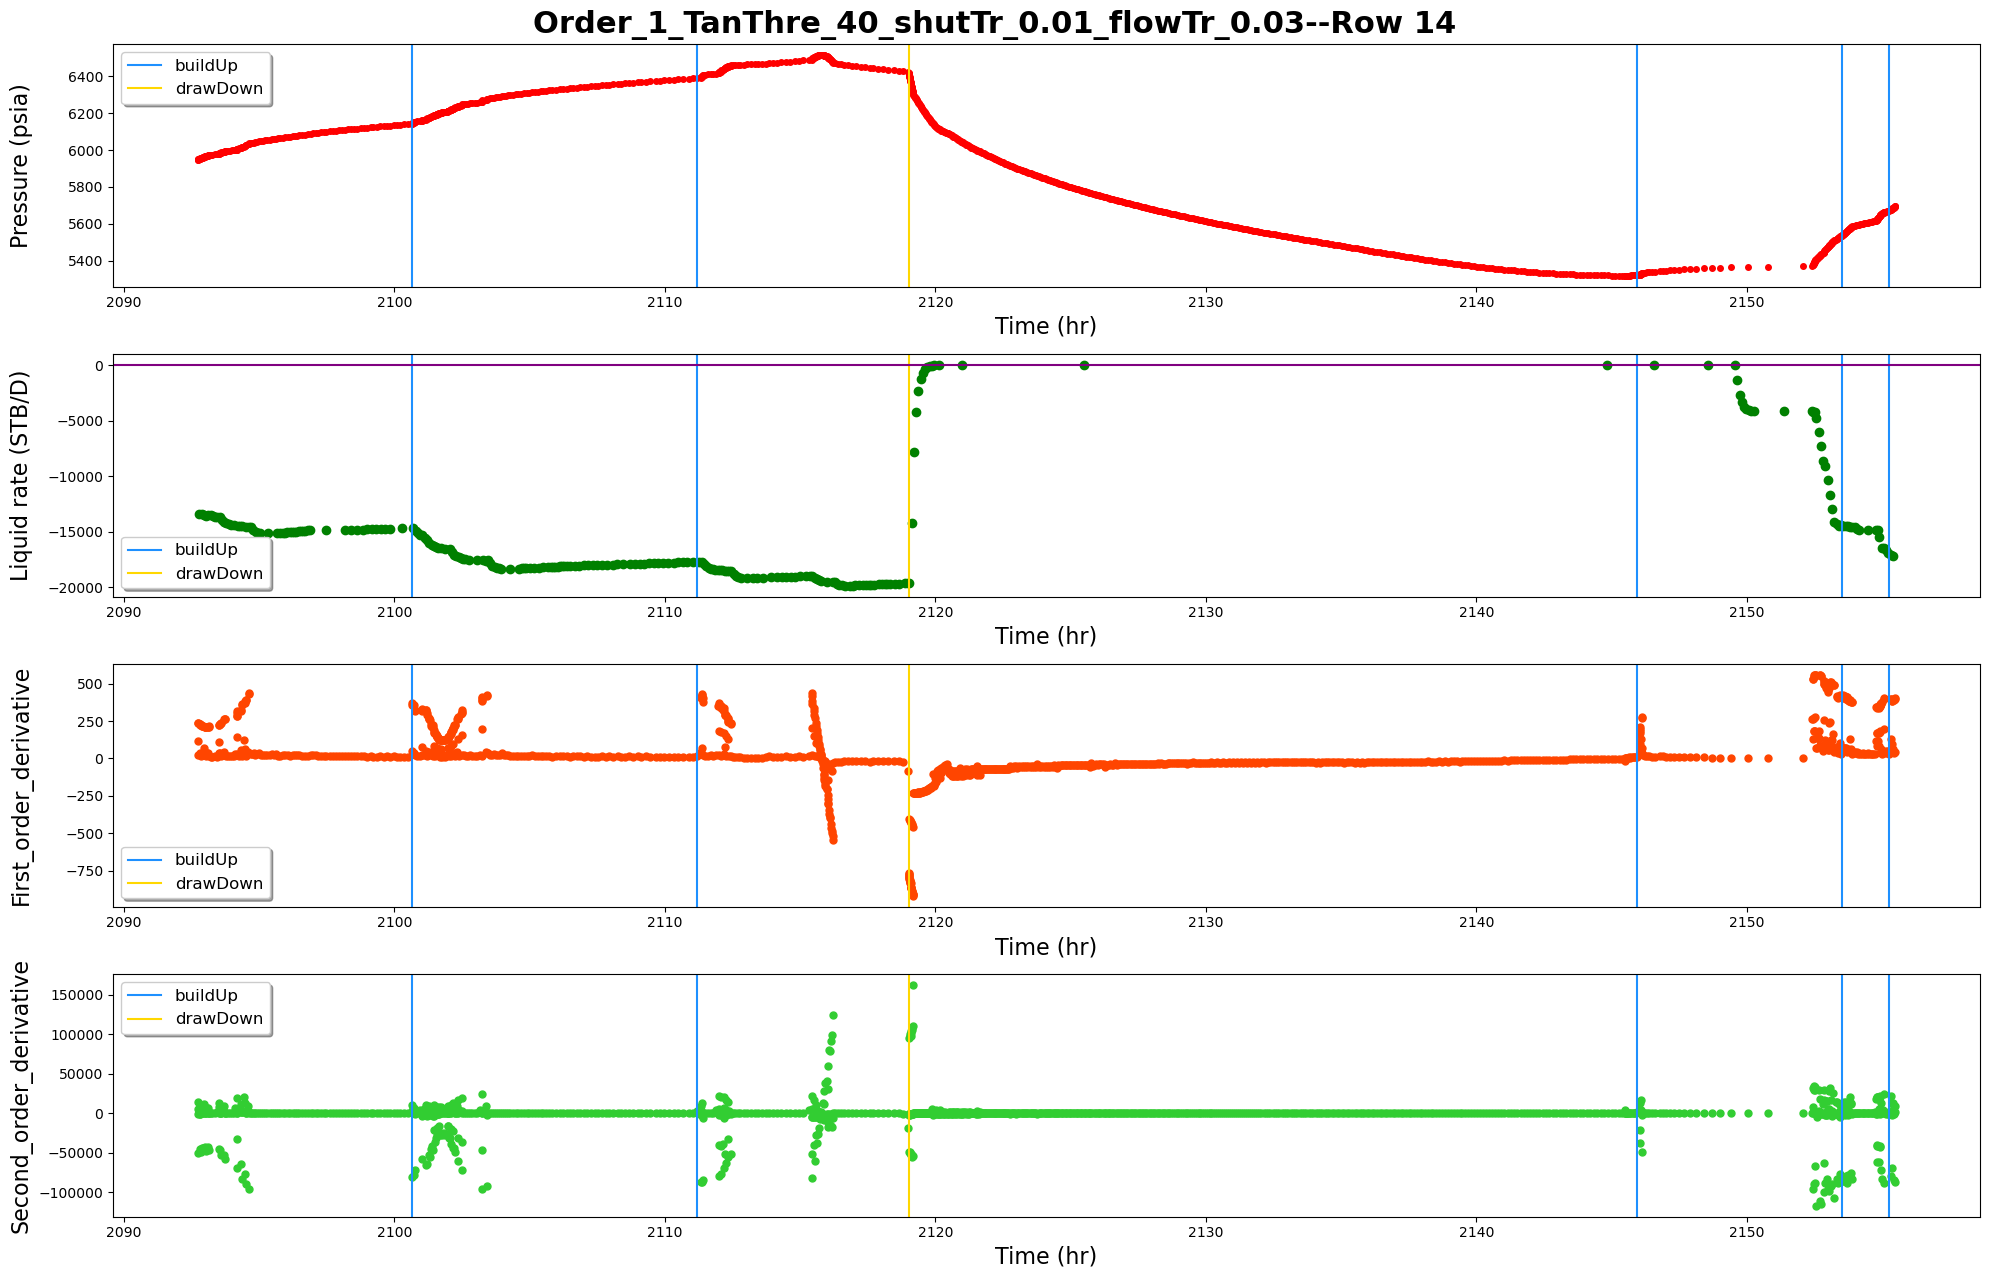

------row 15-----detected points:[16903, 17064, 17245, 17341, 17462, 17589]


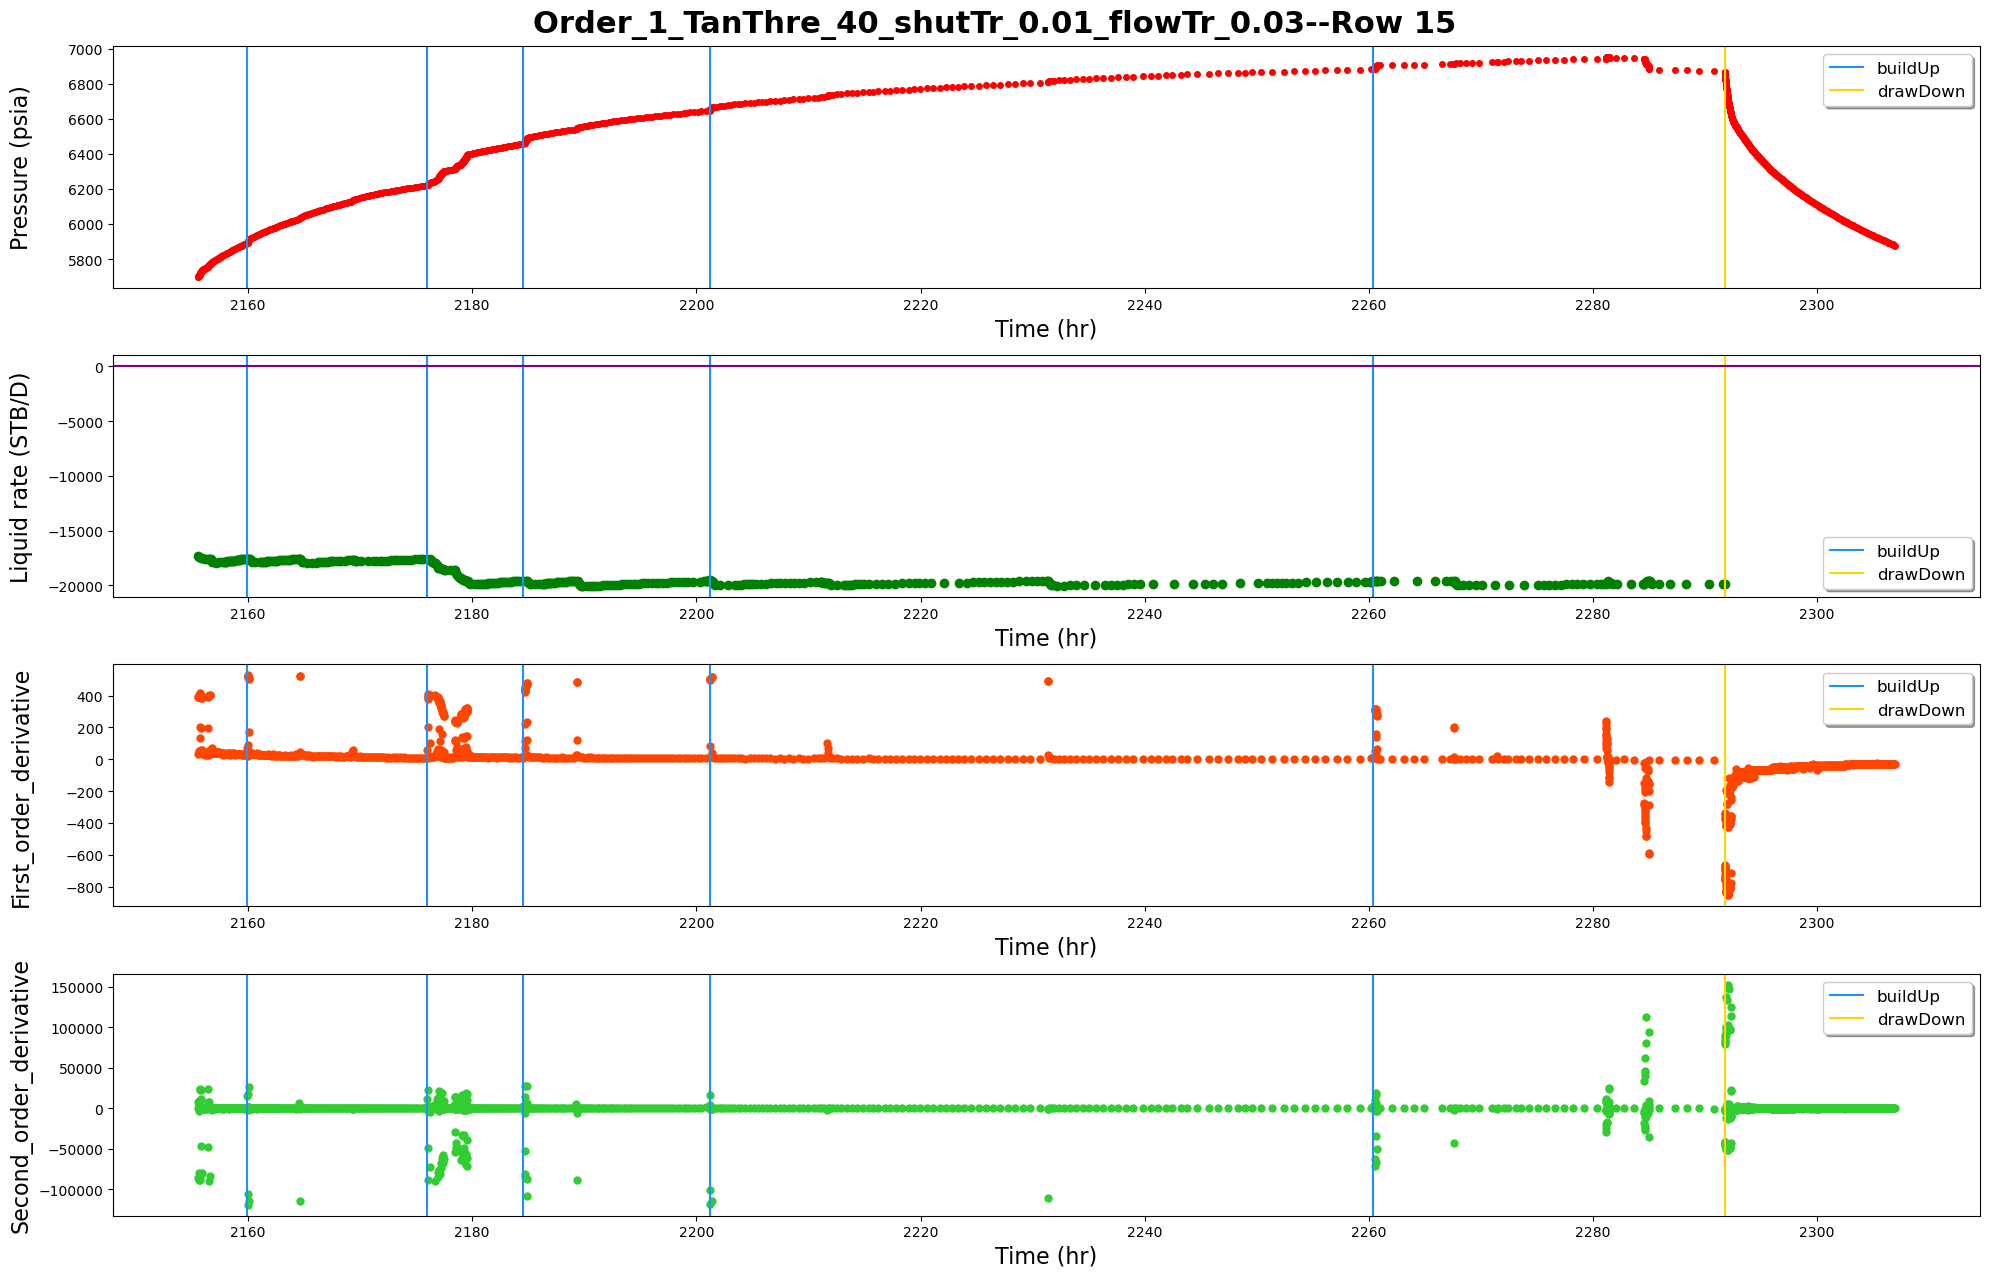

------row 16-----detected points:[18433, 18502, 18556, 18644, 18777, 18917, 19029, 19149]


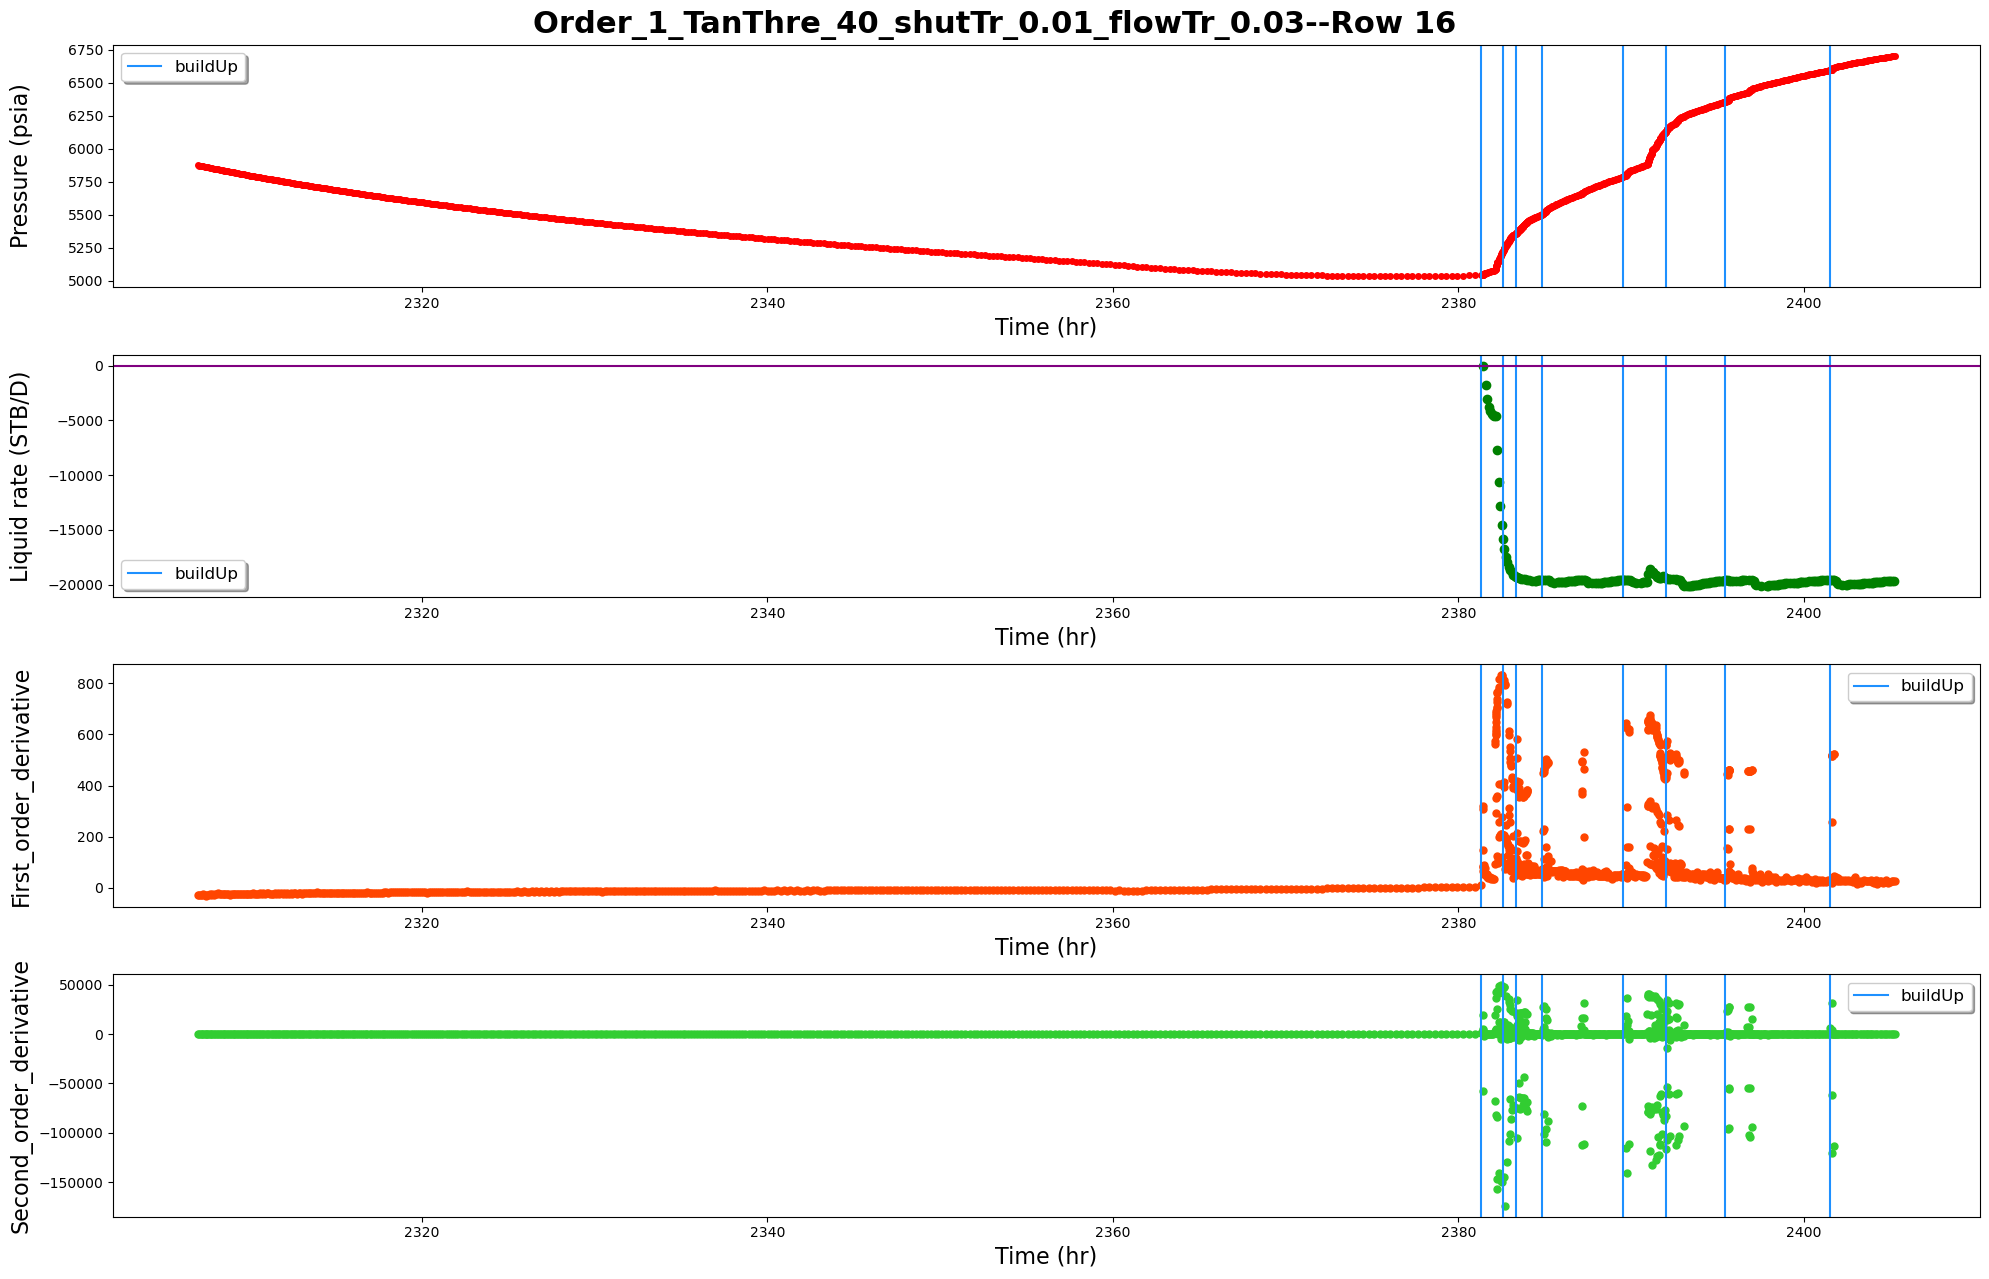

------row 17-----detected points:[19206, 19457, 19642, 19779, 19854, 19938, 19984, 20347]


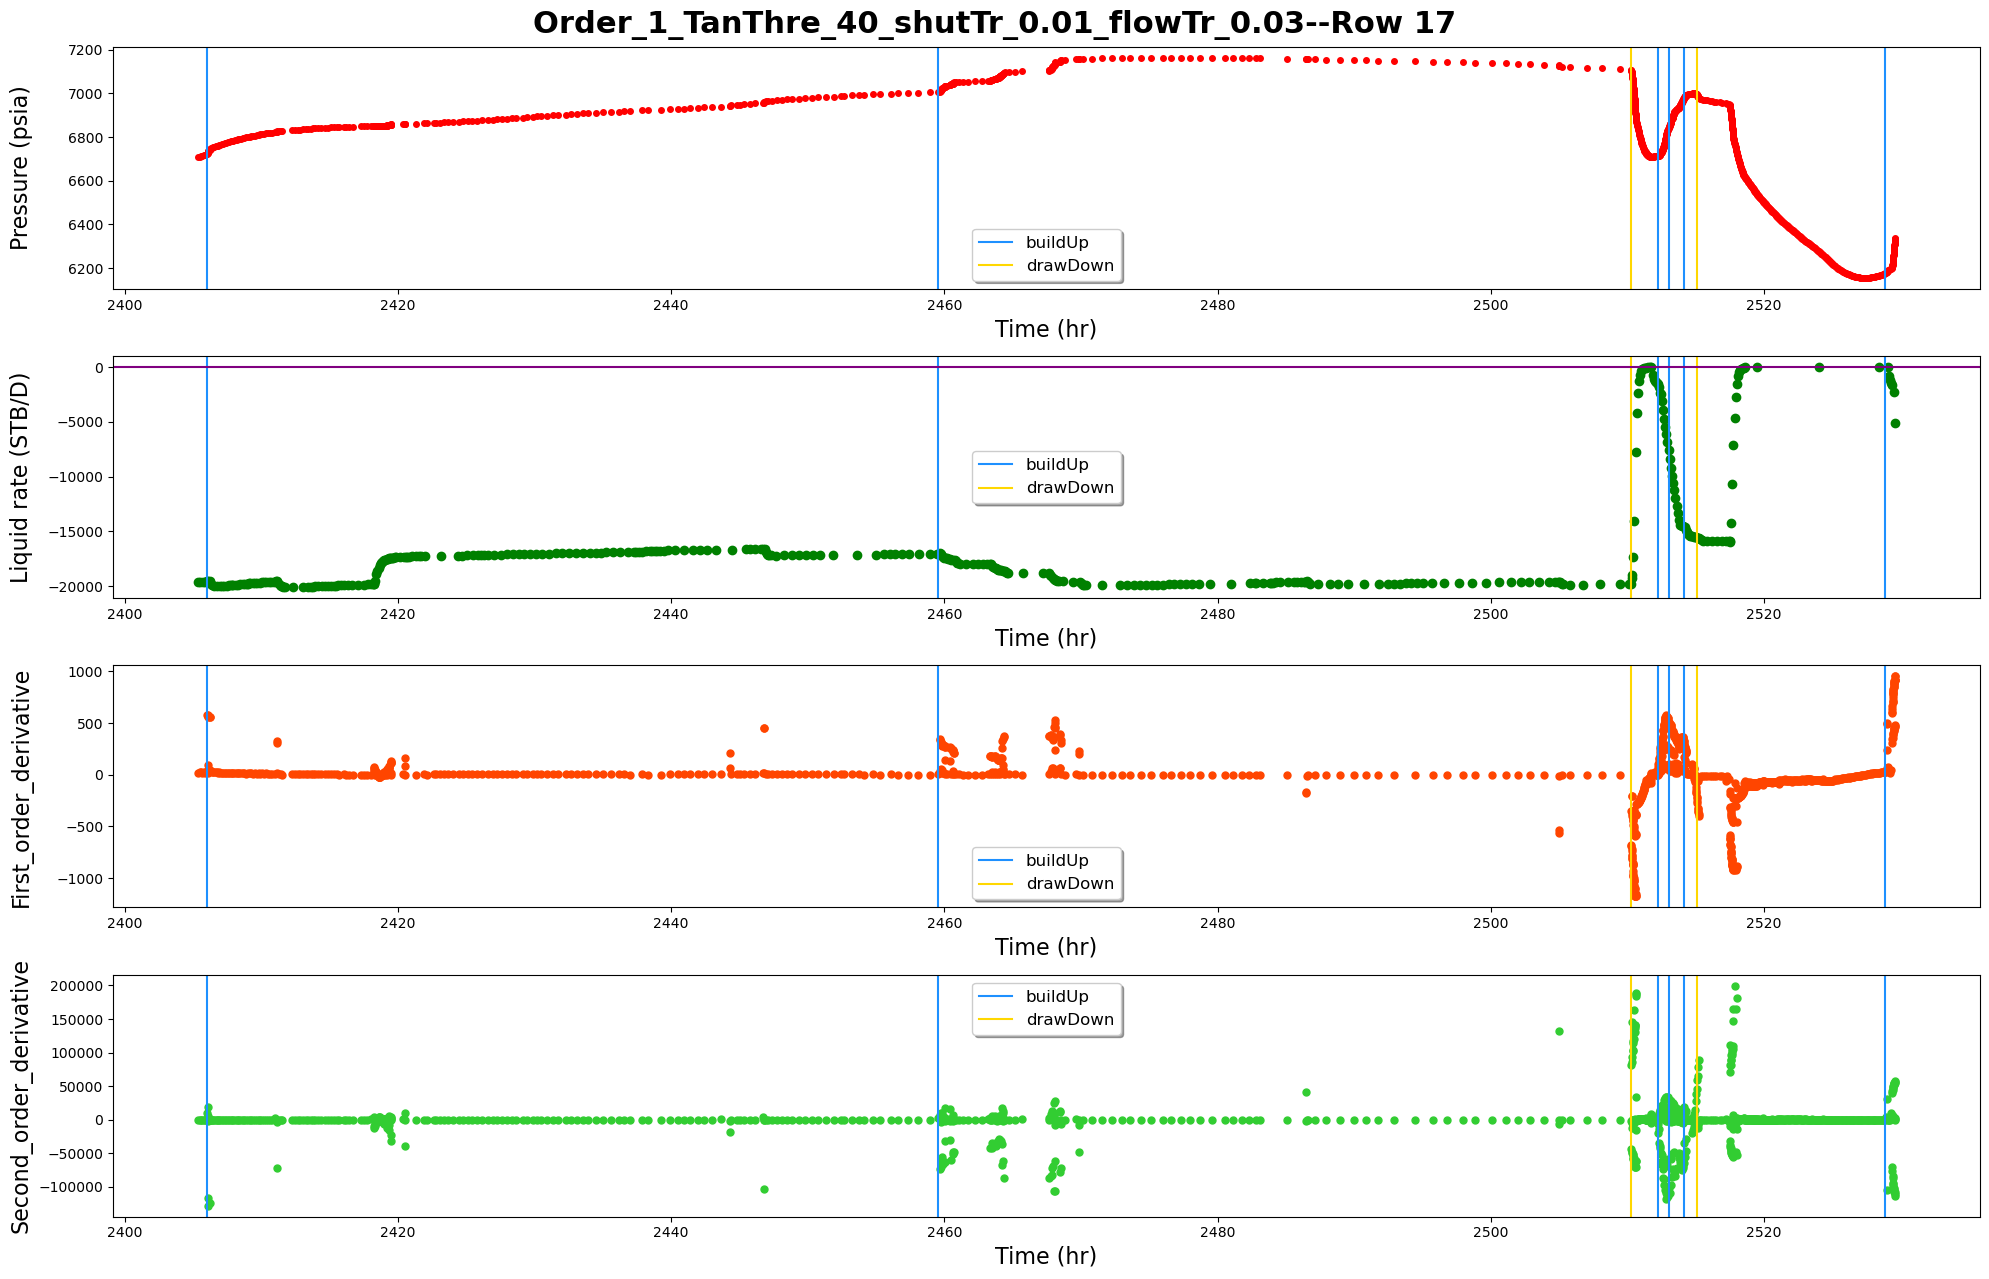

------row 18-----detected points:[20459, 20700, 21035, 21121, 21183, 21426, 21589]


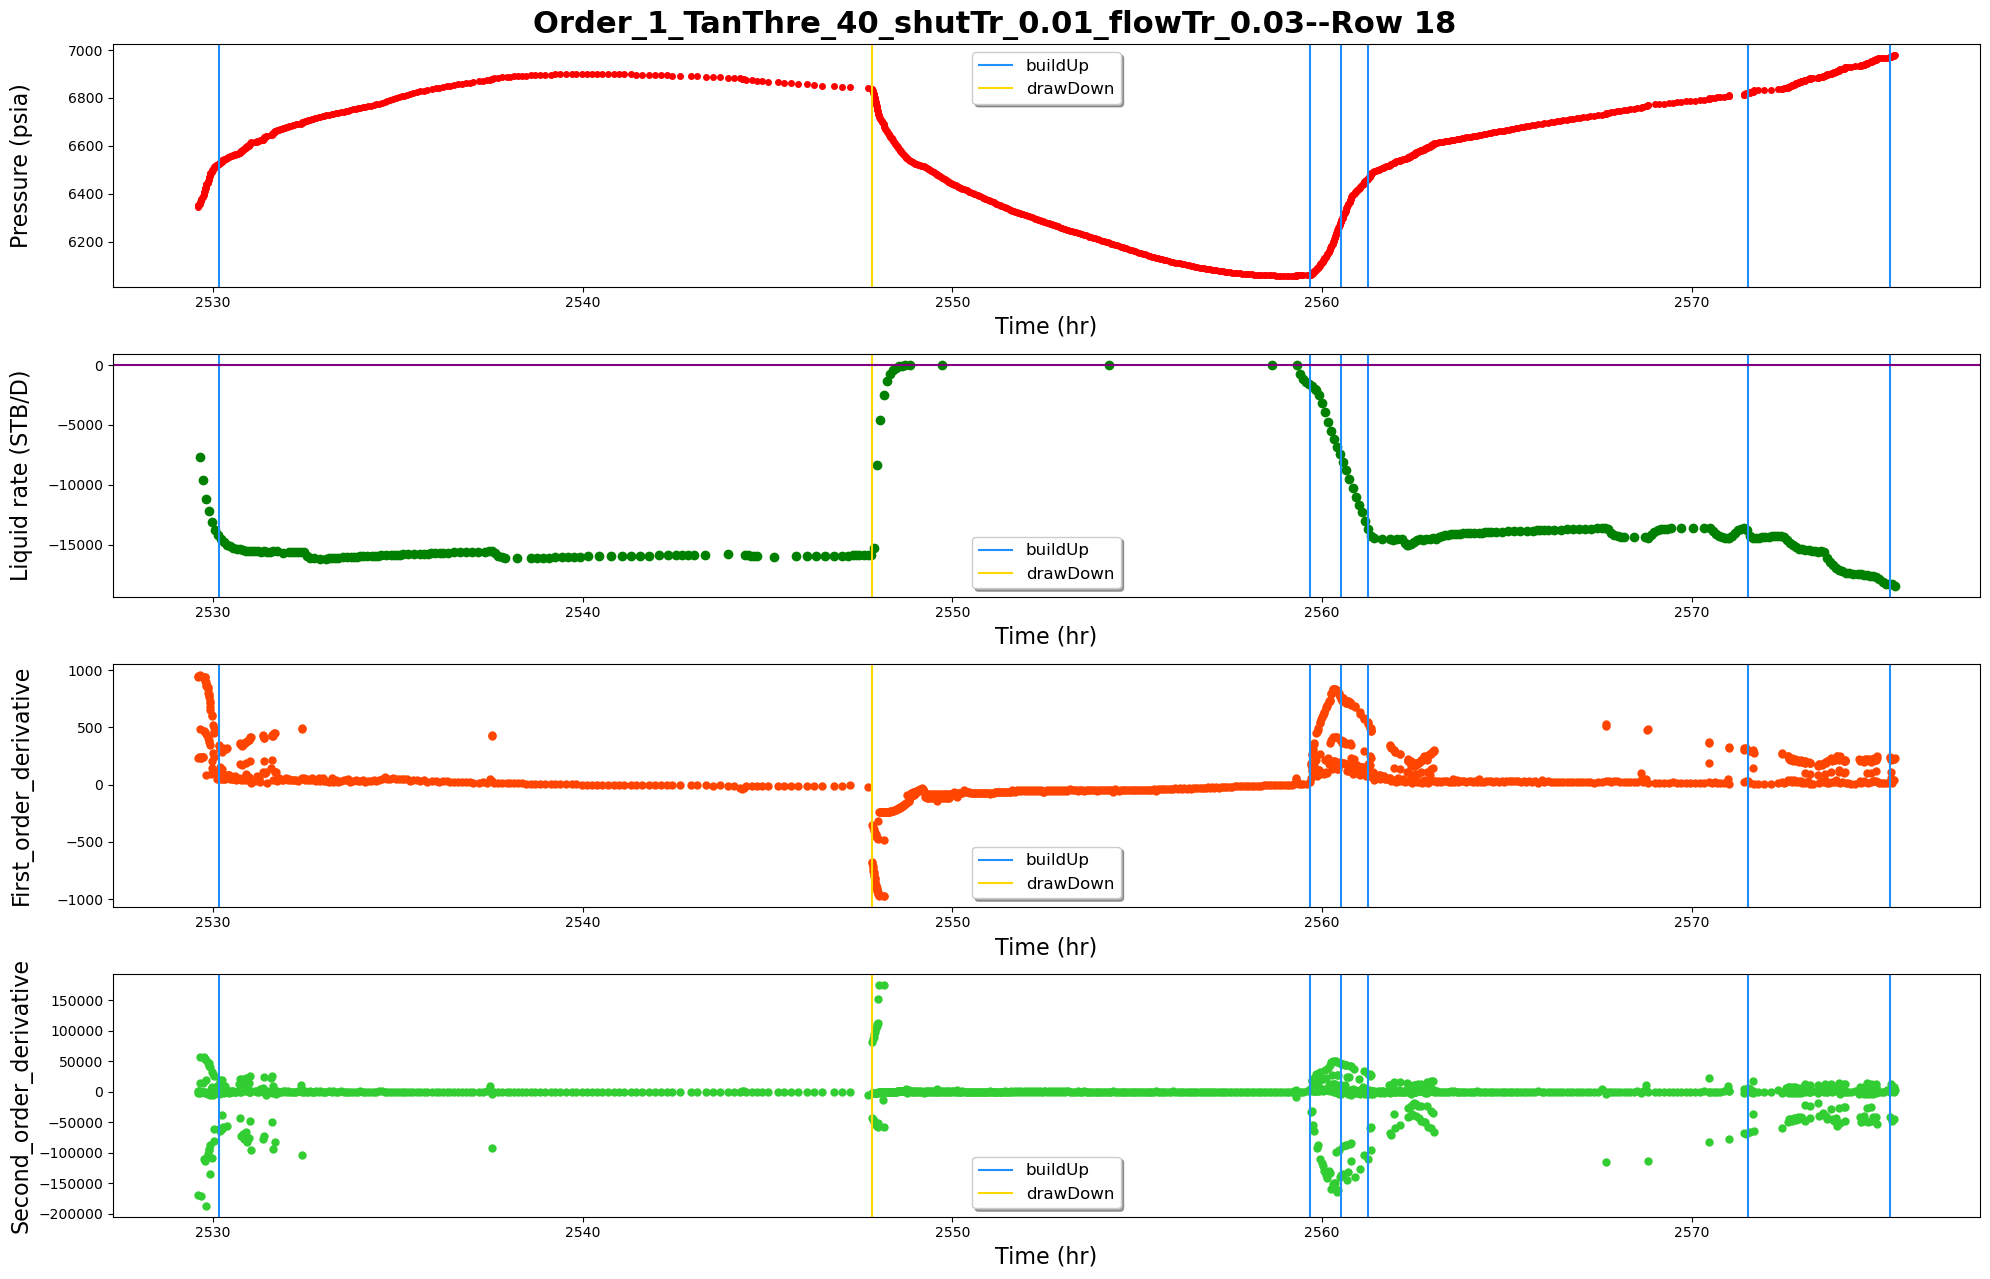

------row 19-----detected points:[21974, 22189, 22273, 22358, 22489, 22620, 22709]


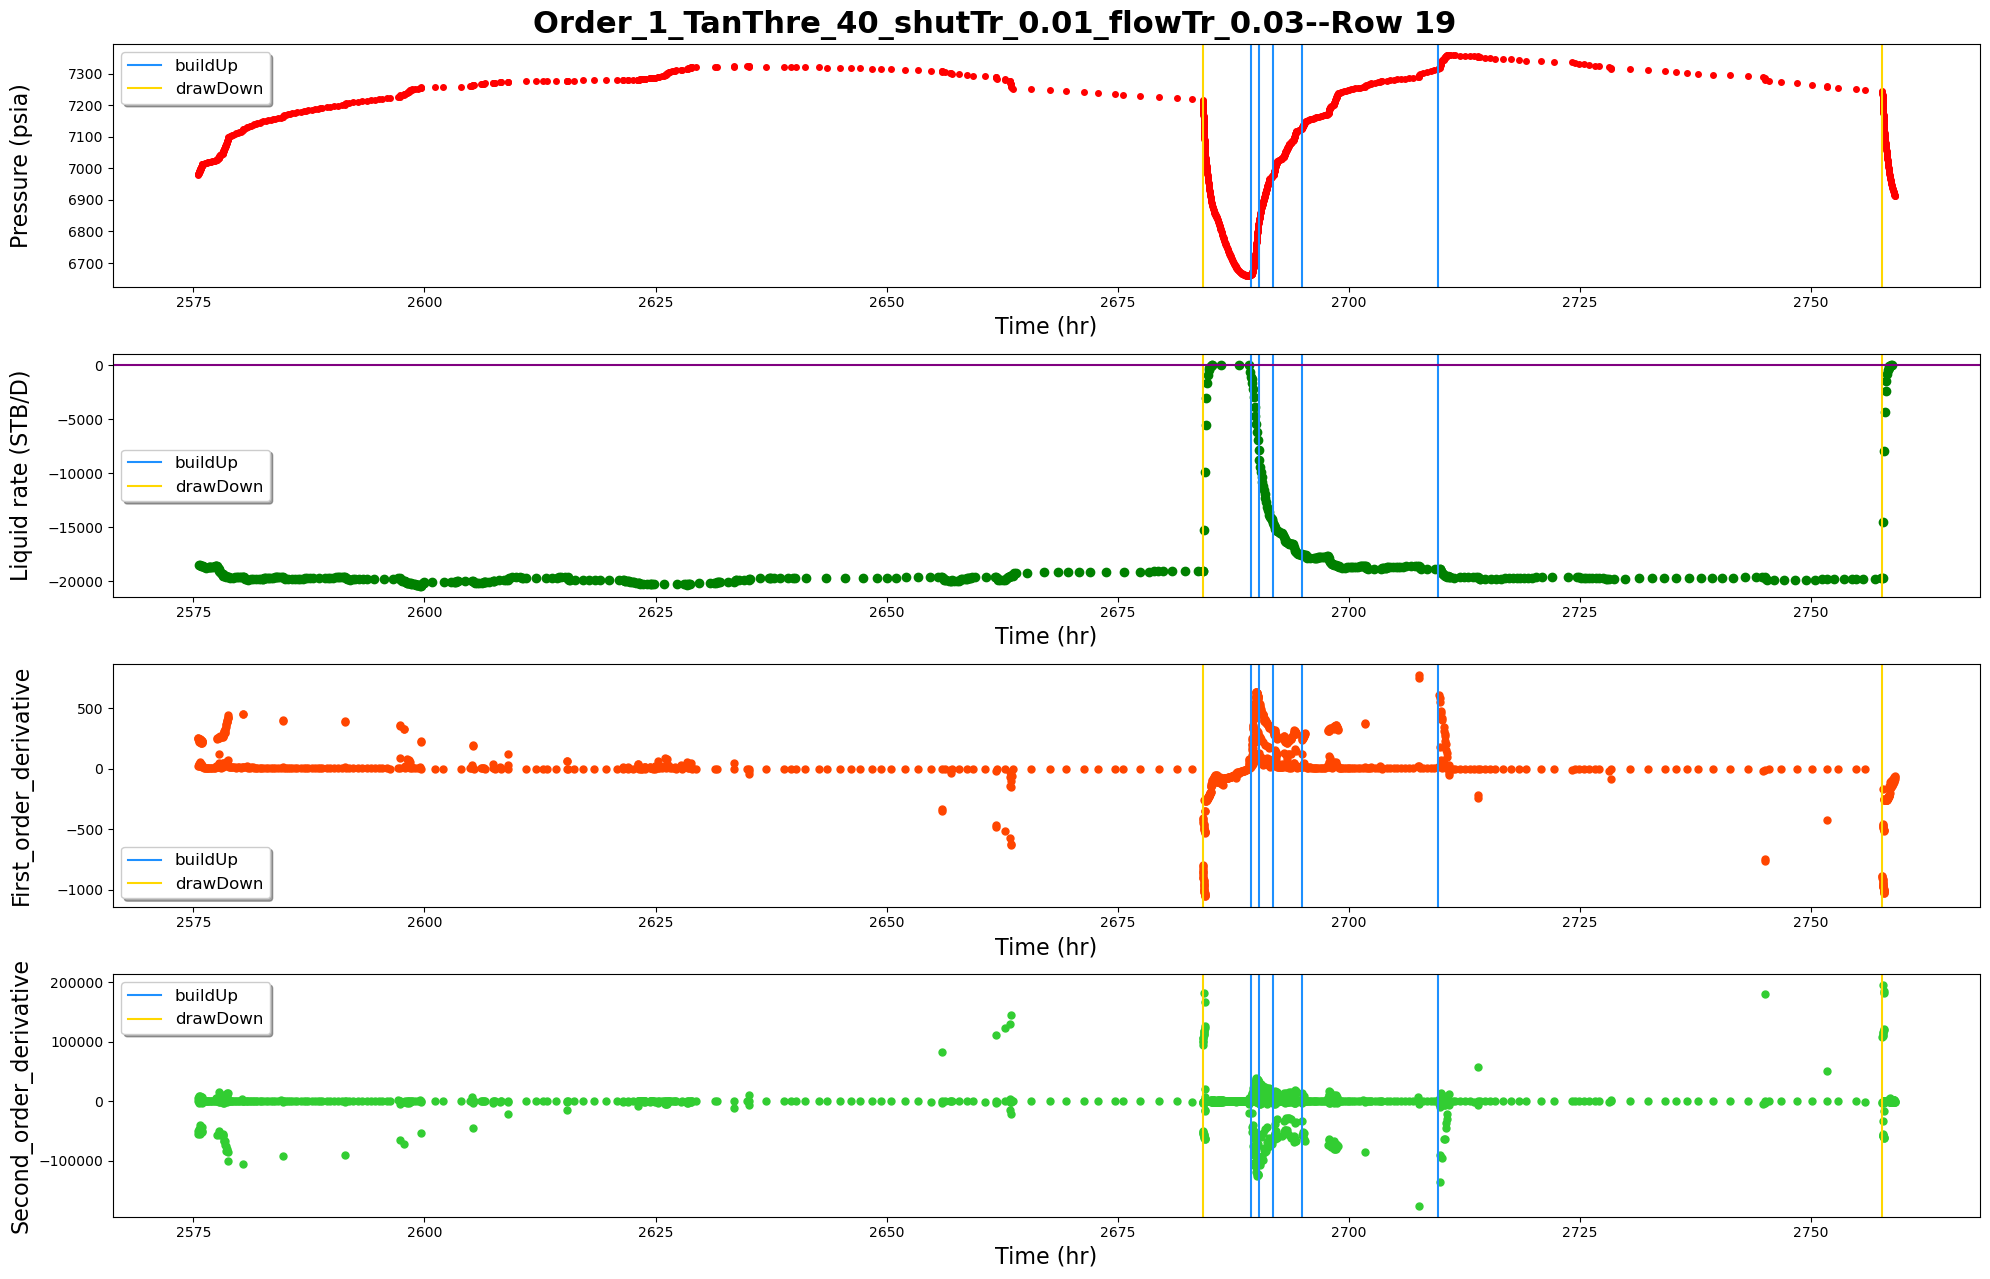

------row 20-----detected points:[23231, 23335, 23393, 23638, 23845, 23979]


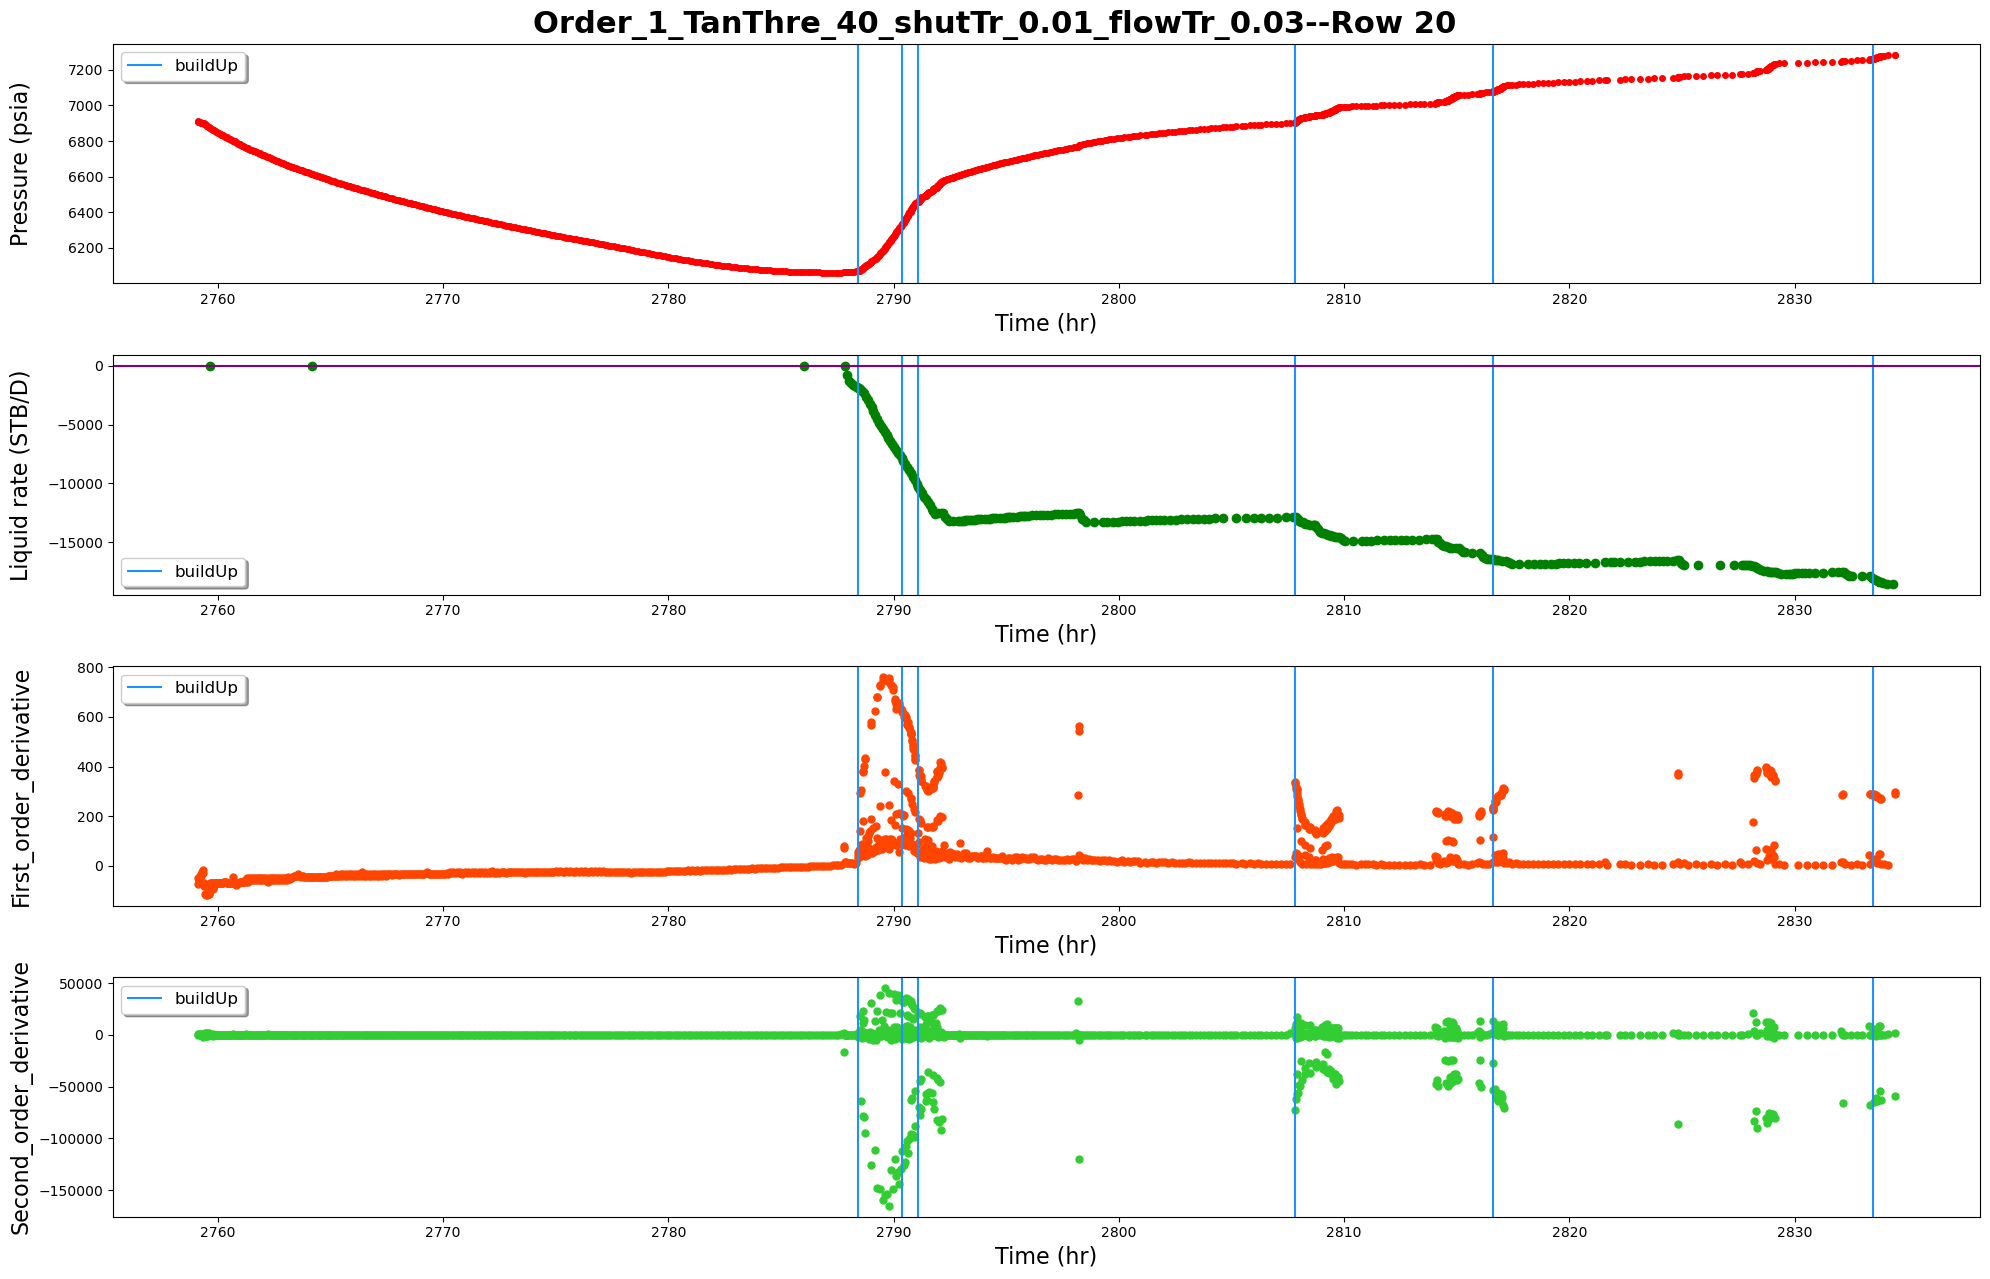

------row 21-----detected points:[24123, 24215, 24679, 24755, 24833, 24872, 25196]


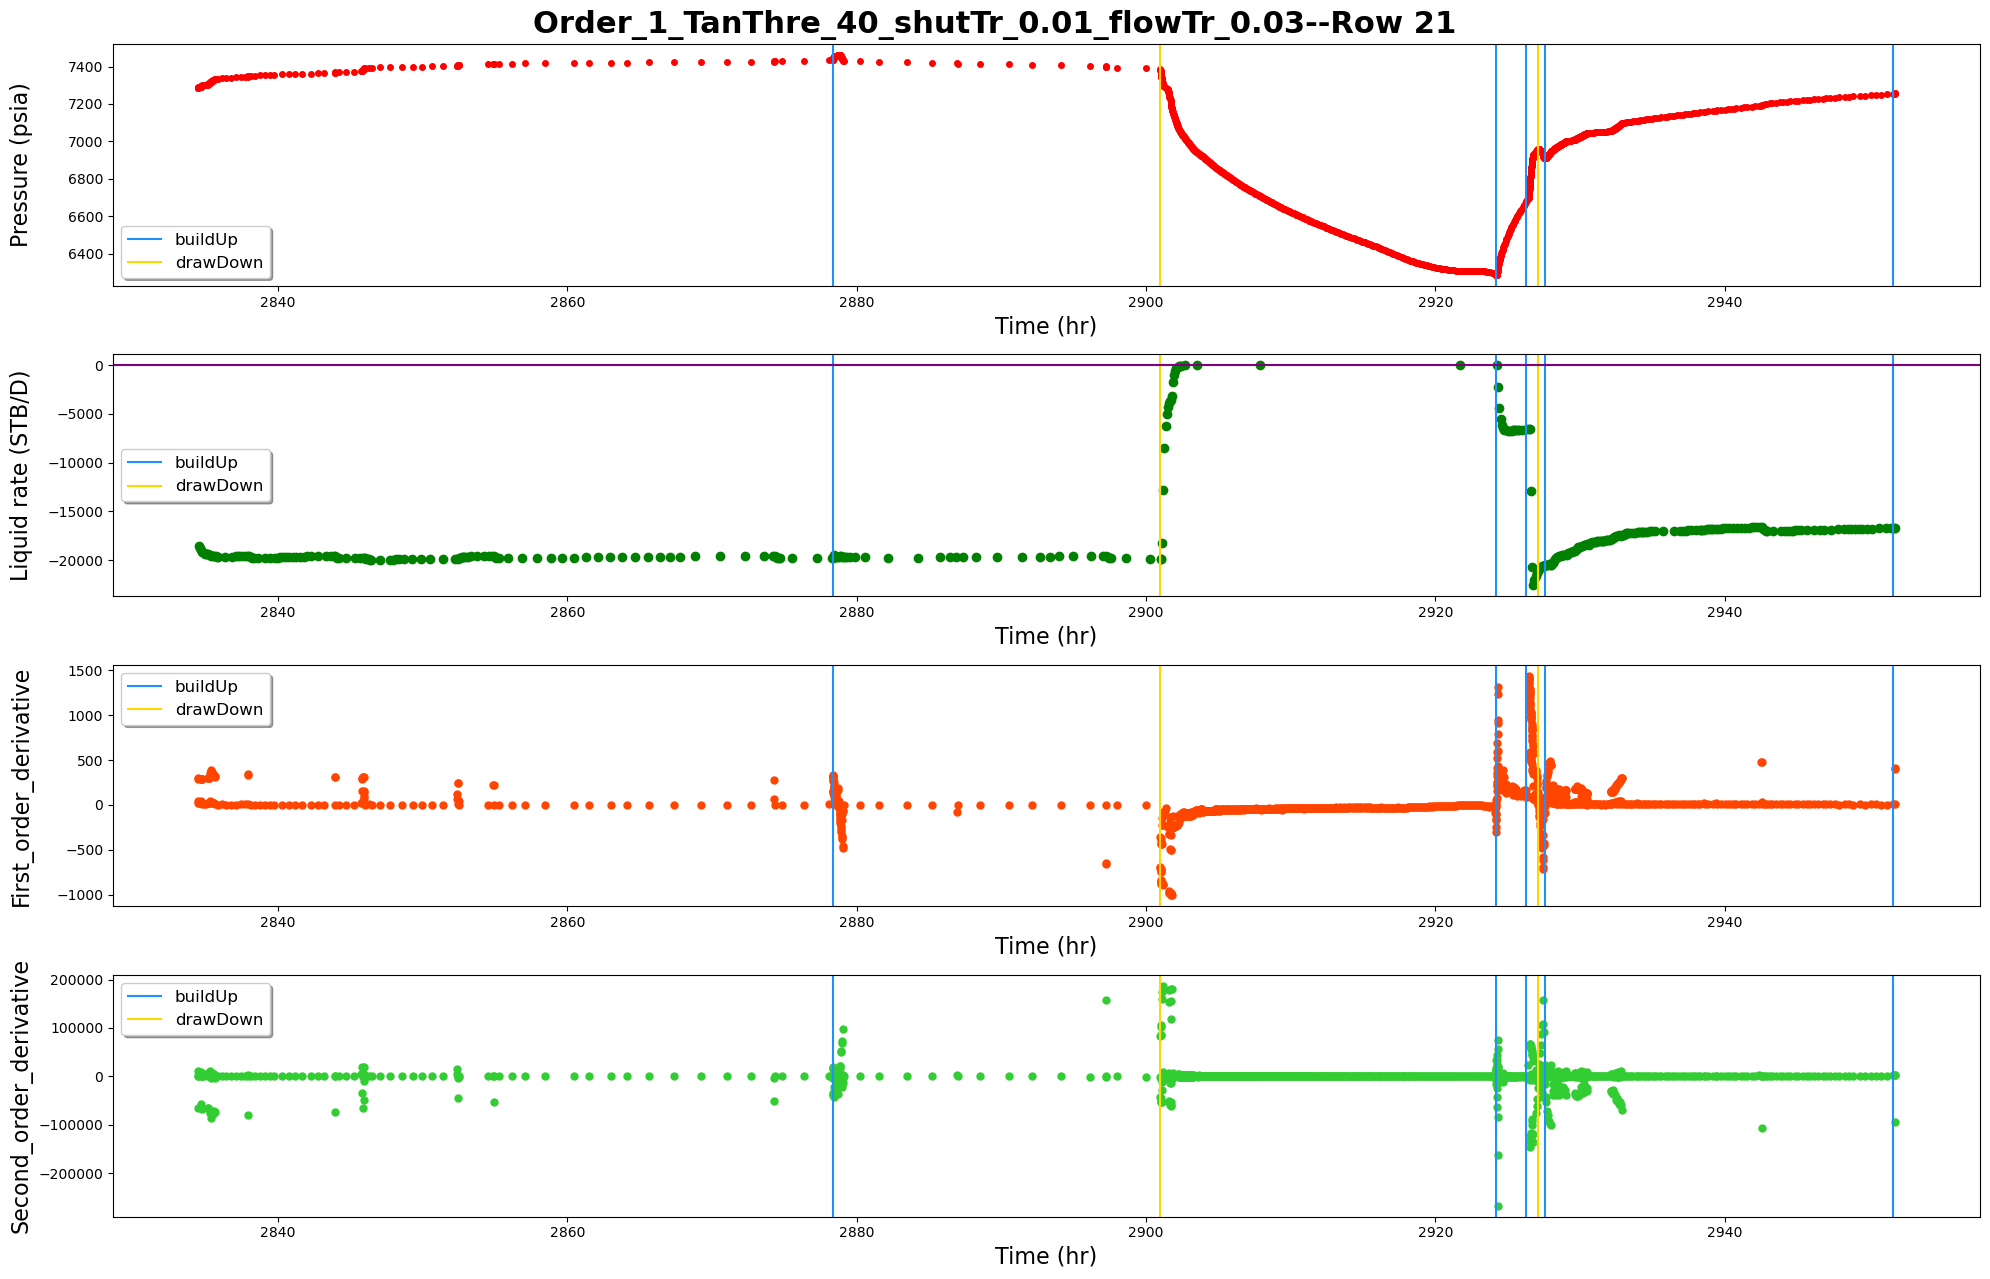

------row 22-----detected points:[25293, 25894, 26003, 26051, 26122]


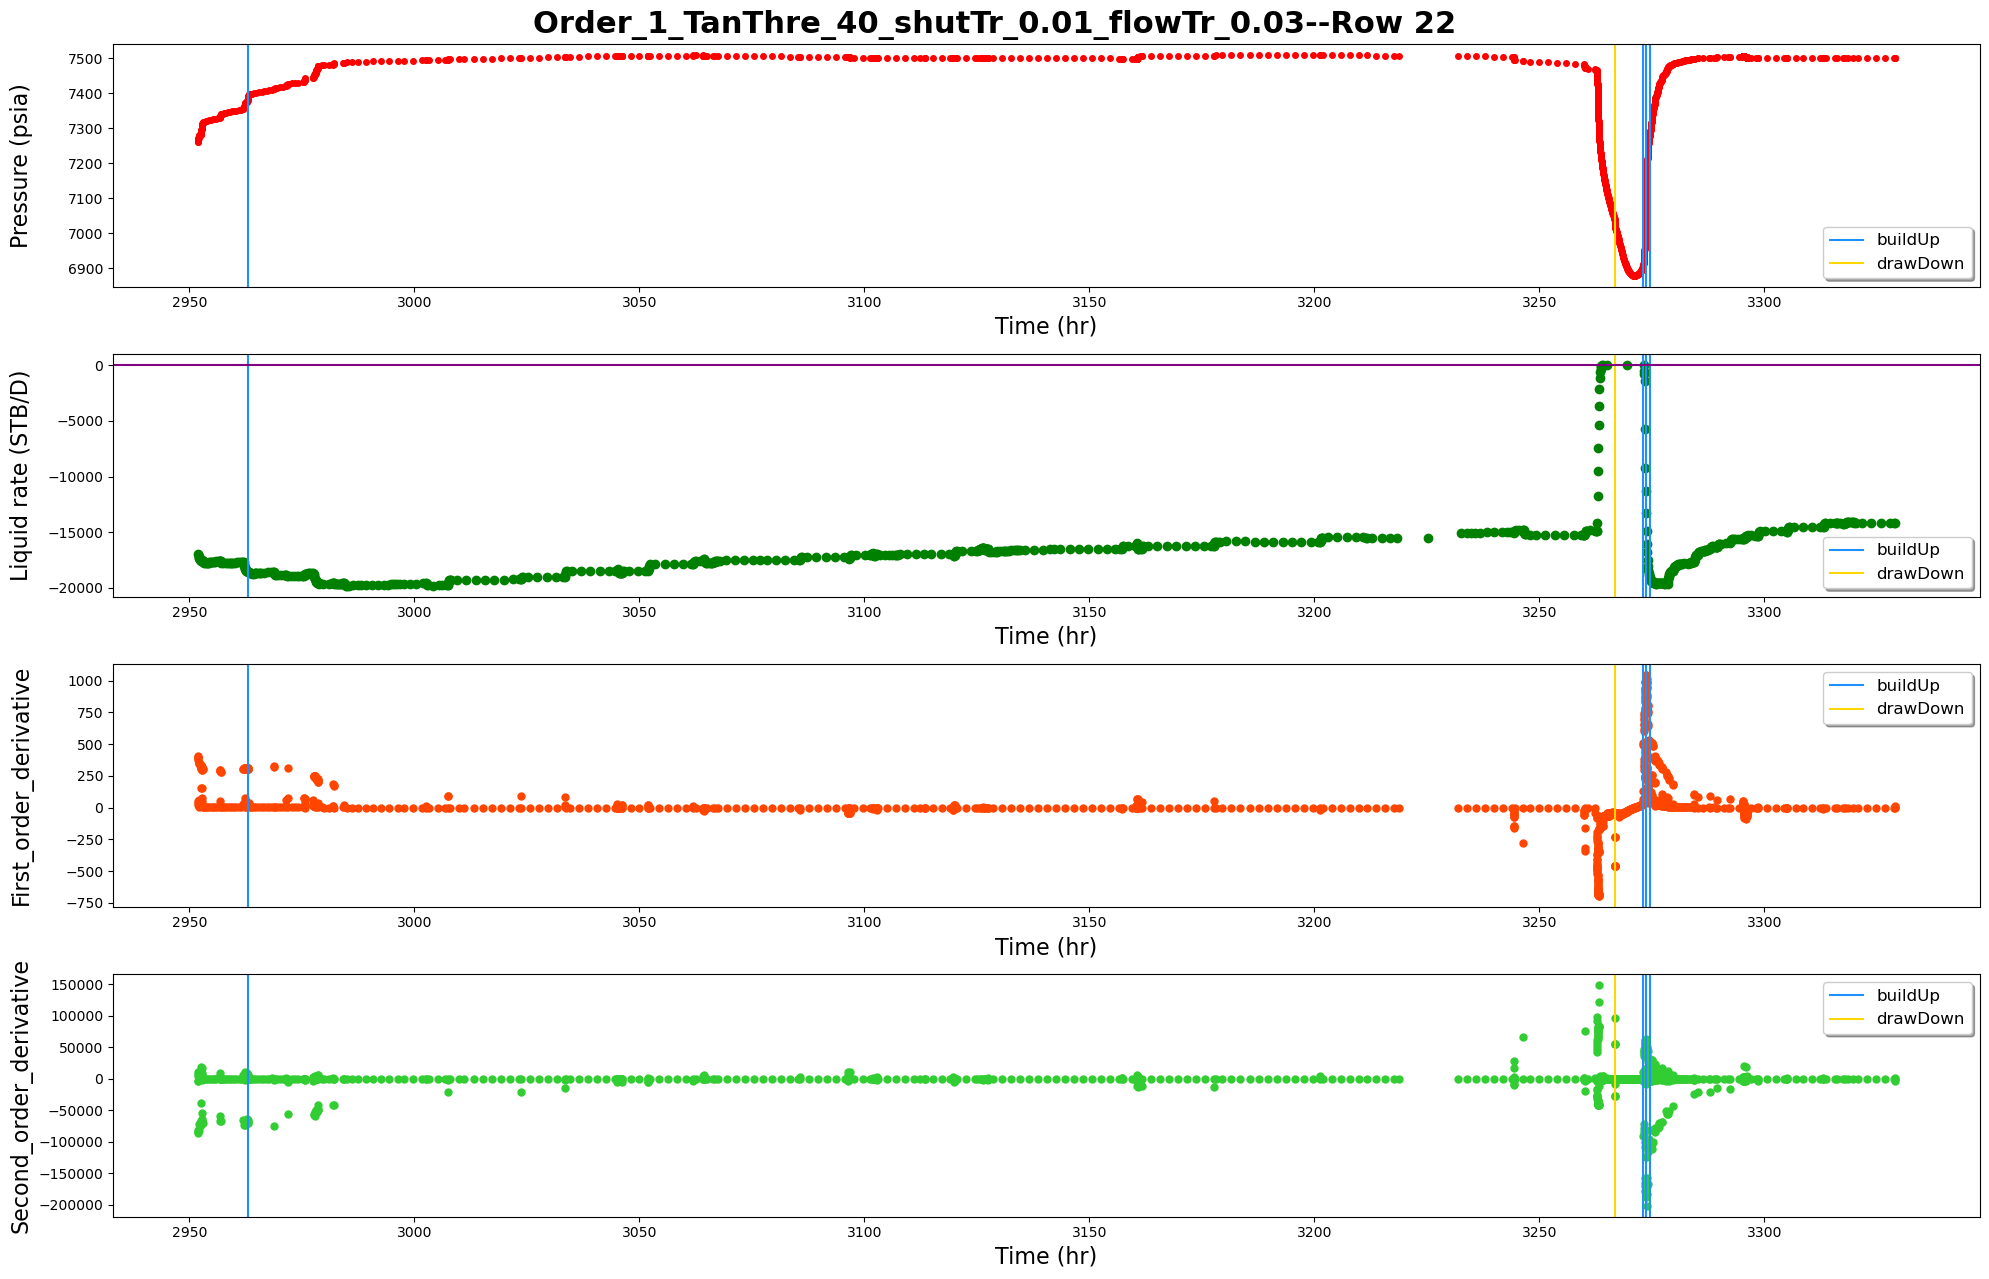

------row 23-----detected points:[26476, 26711, 26779, 26835, 27025, 27324, 27415, 27466, 27547]


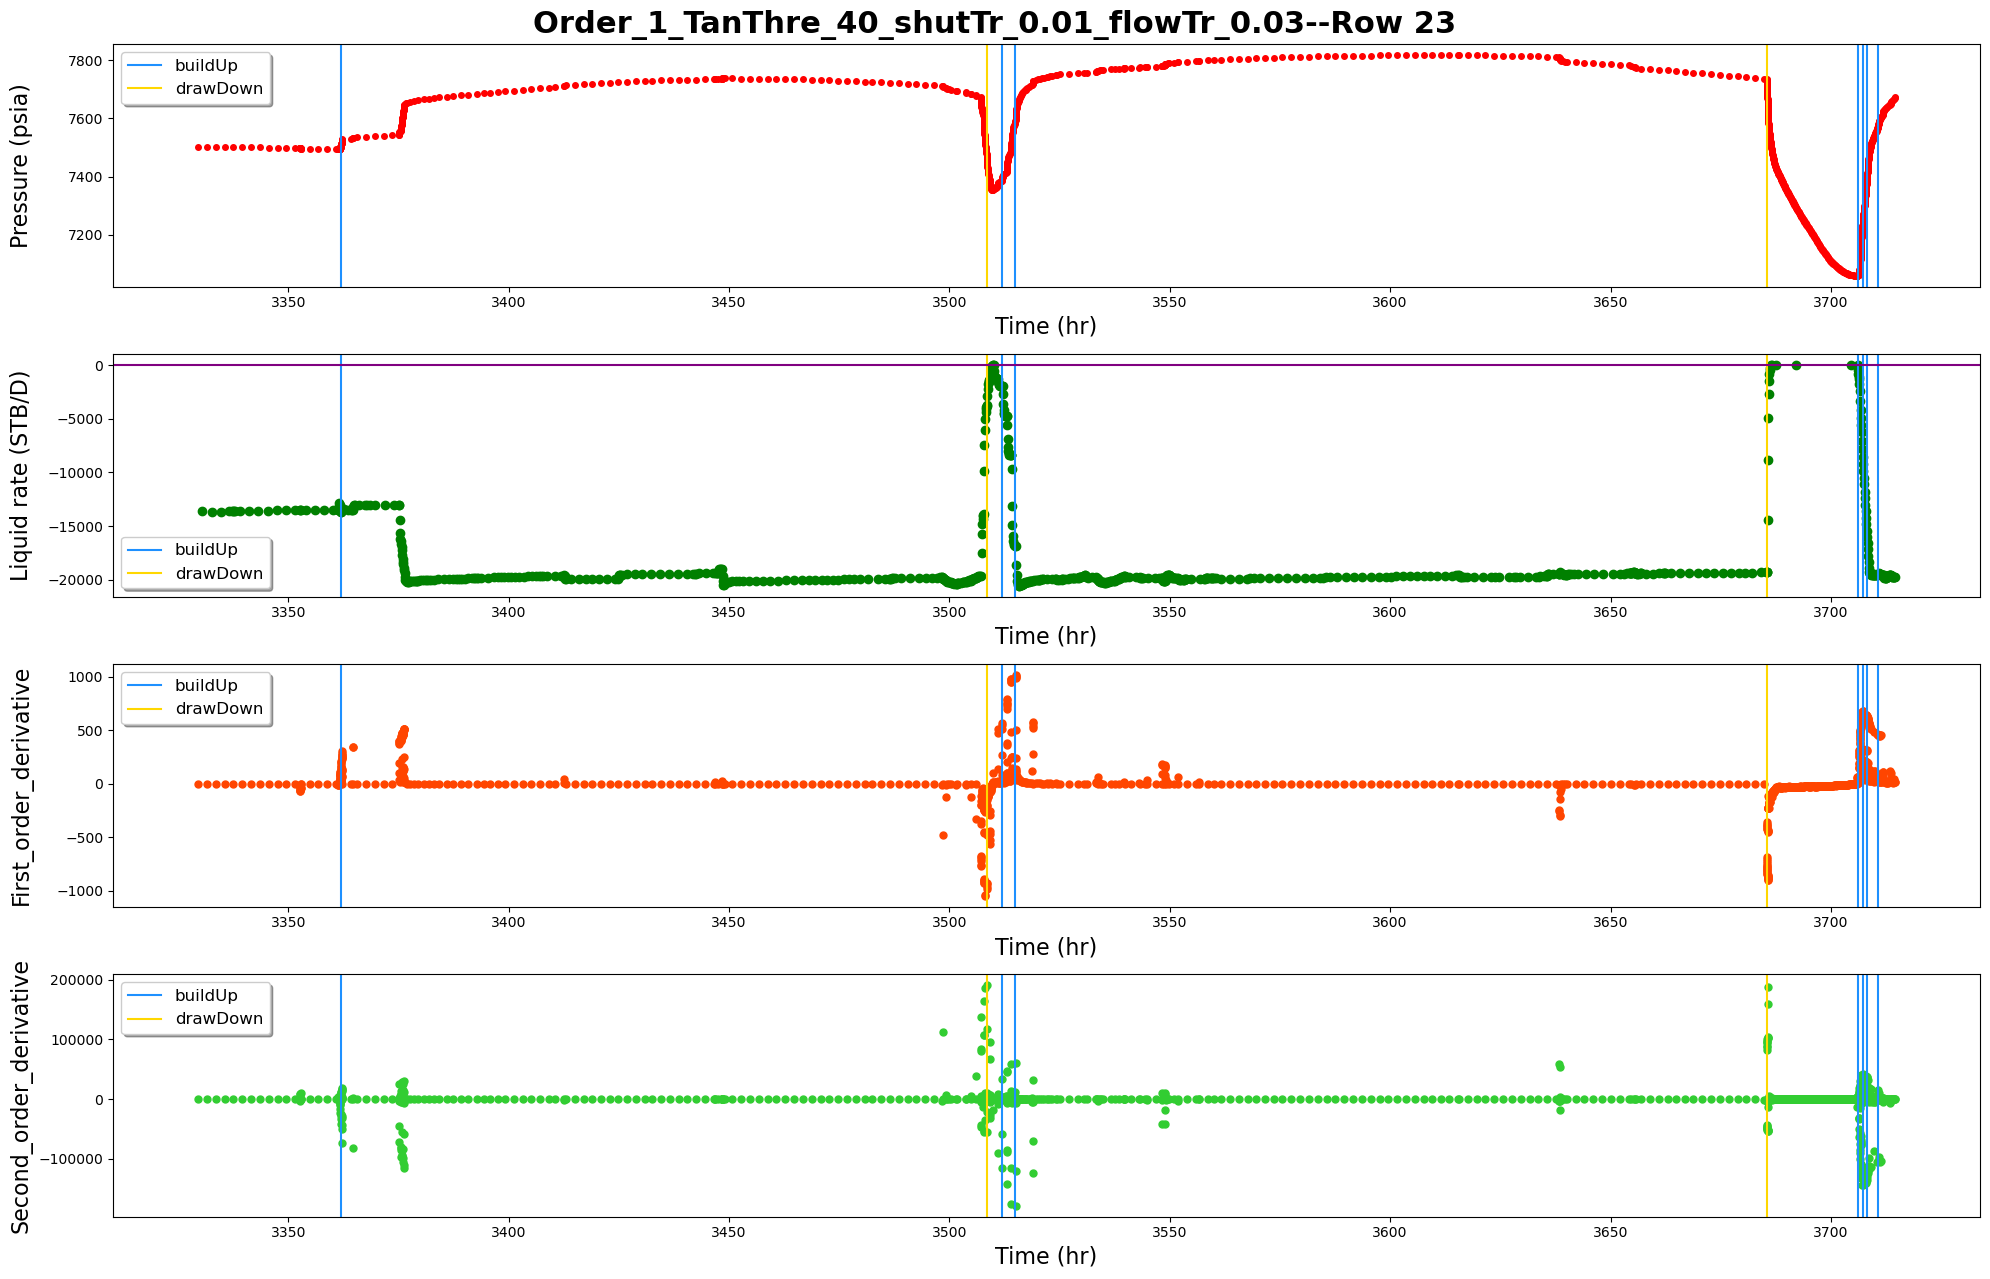

------row 24-----detected points:[27824, 27969, 28082, 28227, 28290, 28493, 28597]


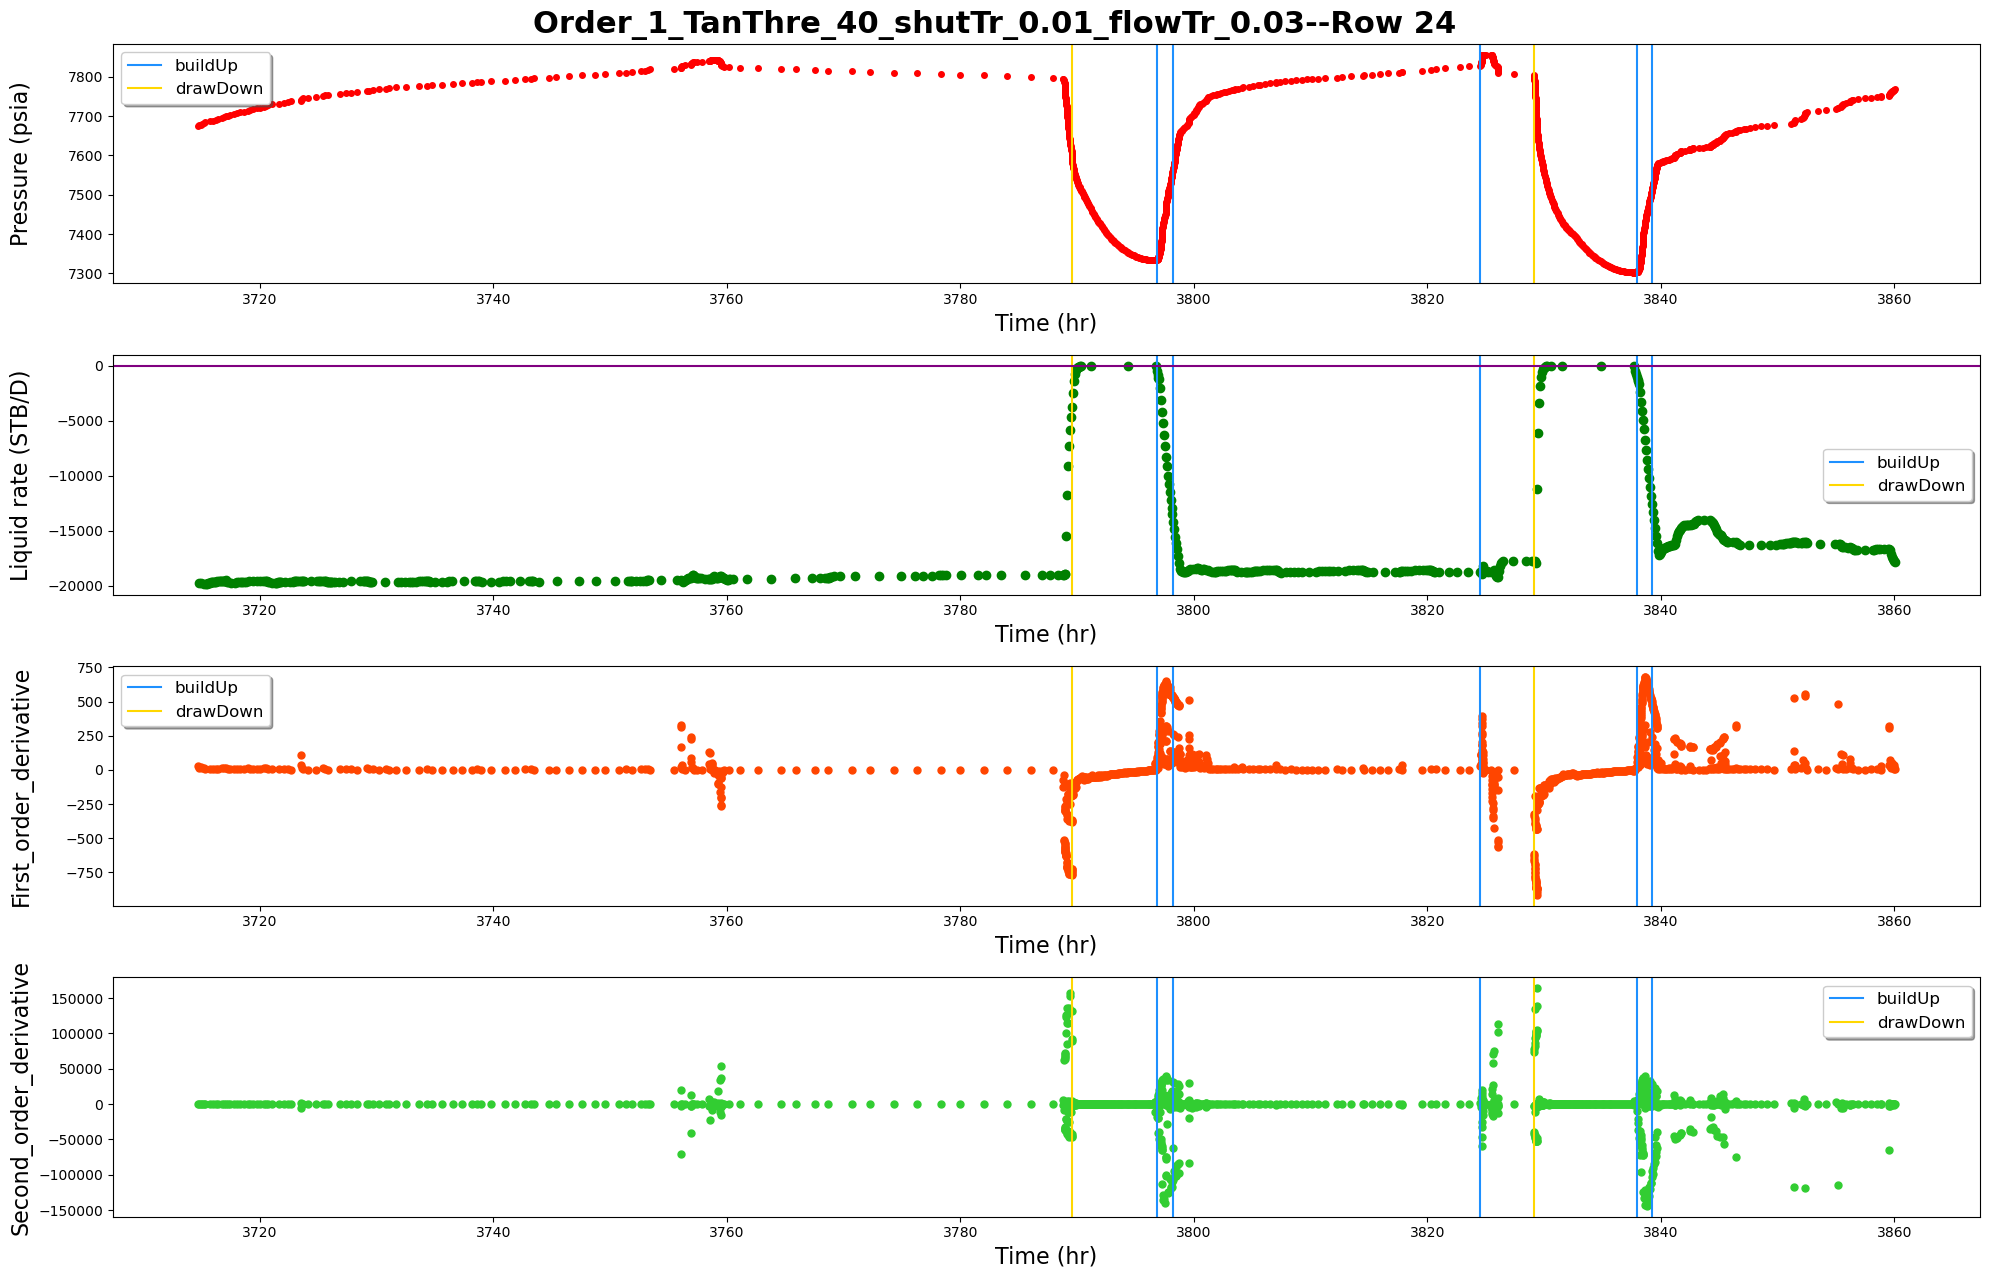

------row 25-----detected points:[28840, 29113, 29181, 29307, 29481]


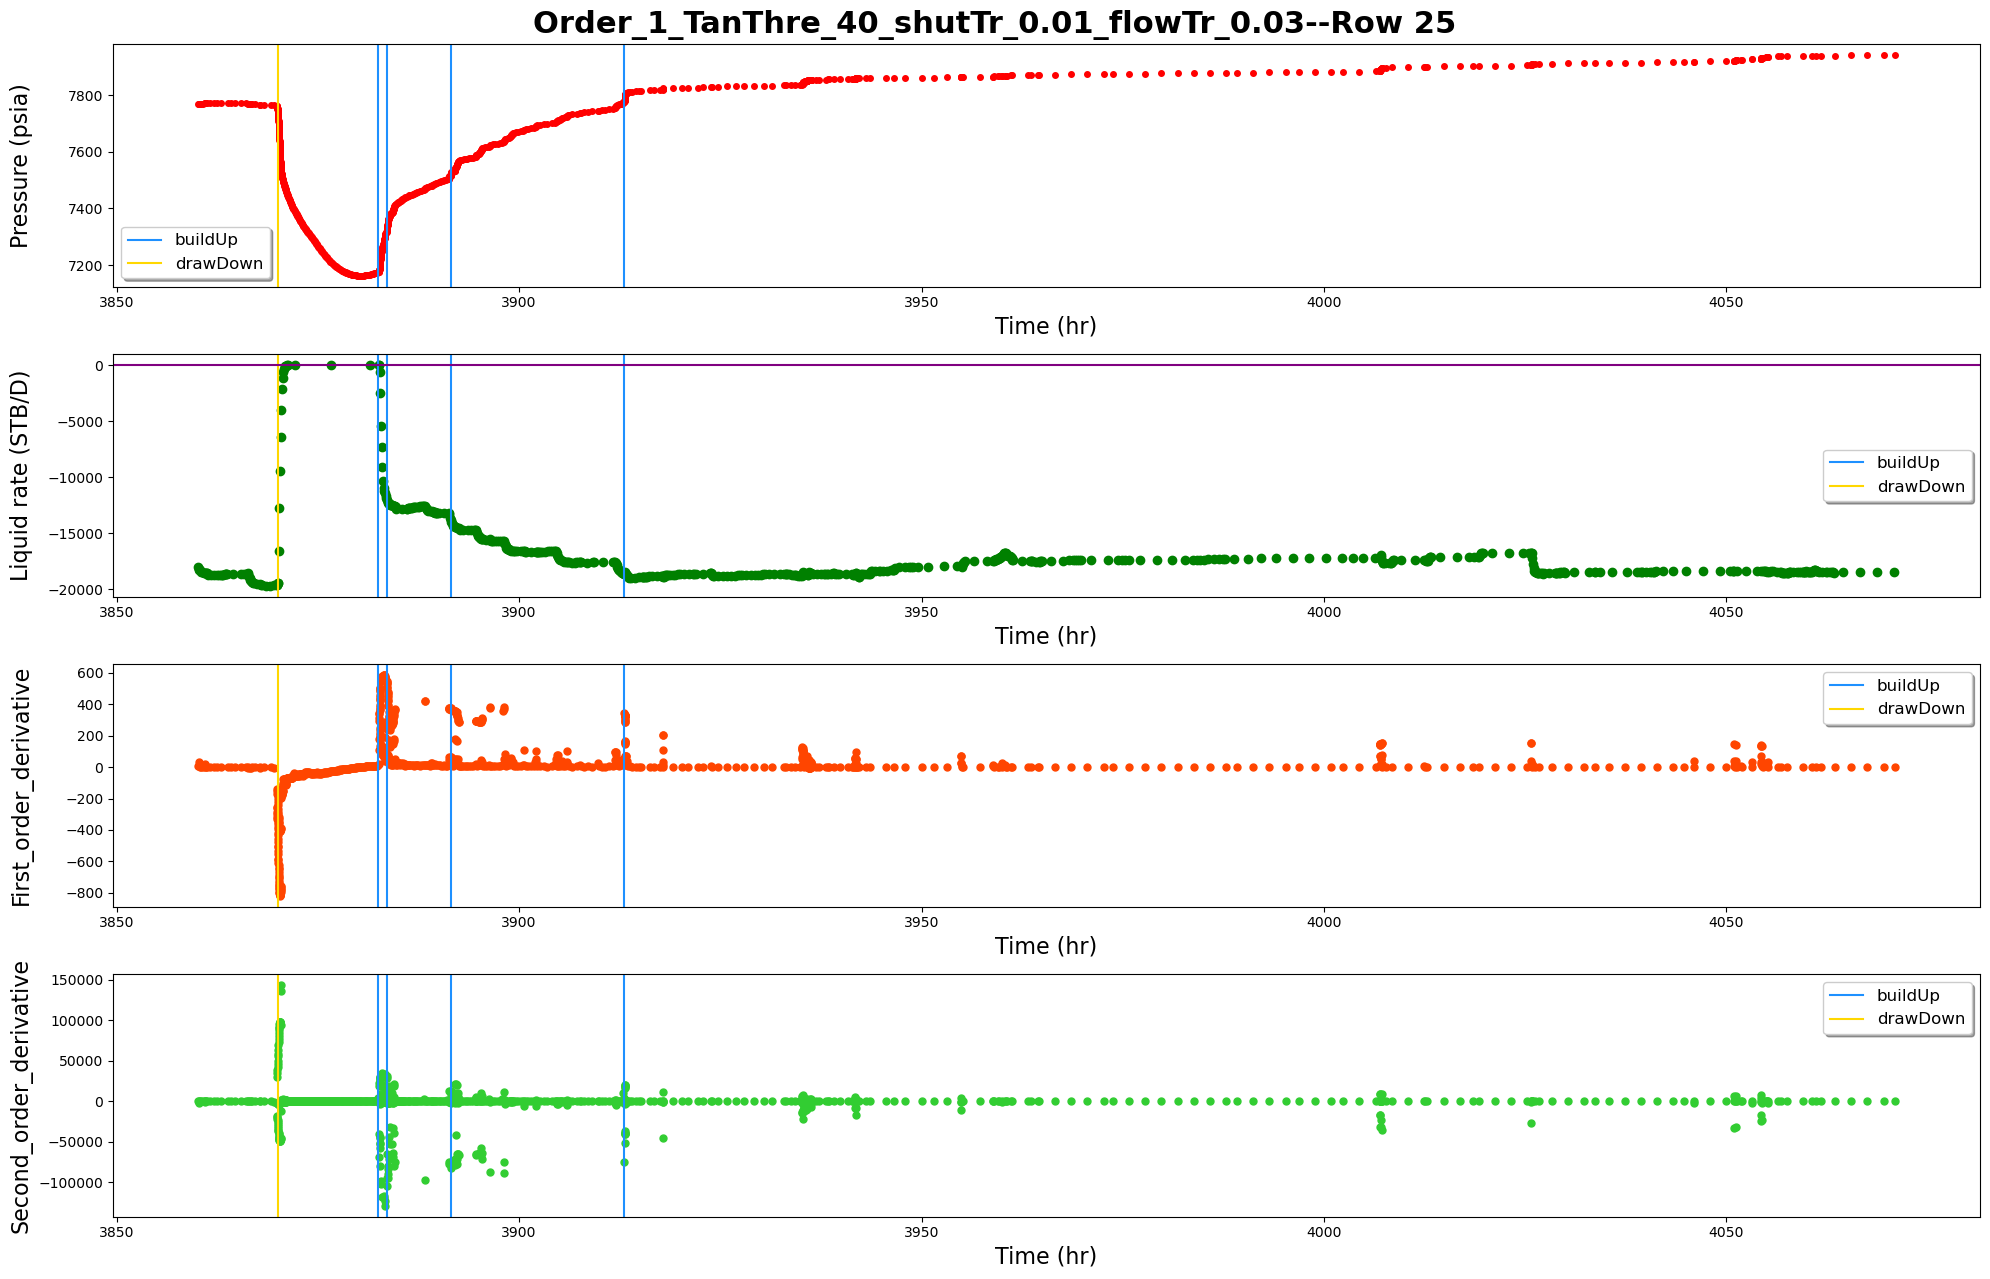

In [8]:
points_type="allPoints"
# points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=False
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
%run plot_N_save.ipynb